In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math

warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 한글 설정
from matplotlib import rc

rc('font', family='Arial Unicode Ms')

pd.set_option('display.max_columns', None)

In [2]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환 # 직접 채우지 않은 파일
car_td = pd.read_csv('./used_car.csv')

In [3]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [4]:
def inverse_log(log):
    return(math.pow(10,log))

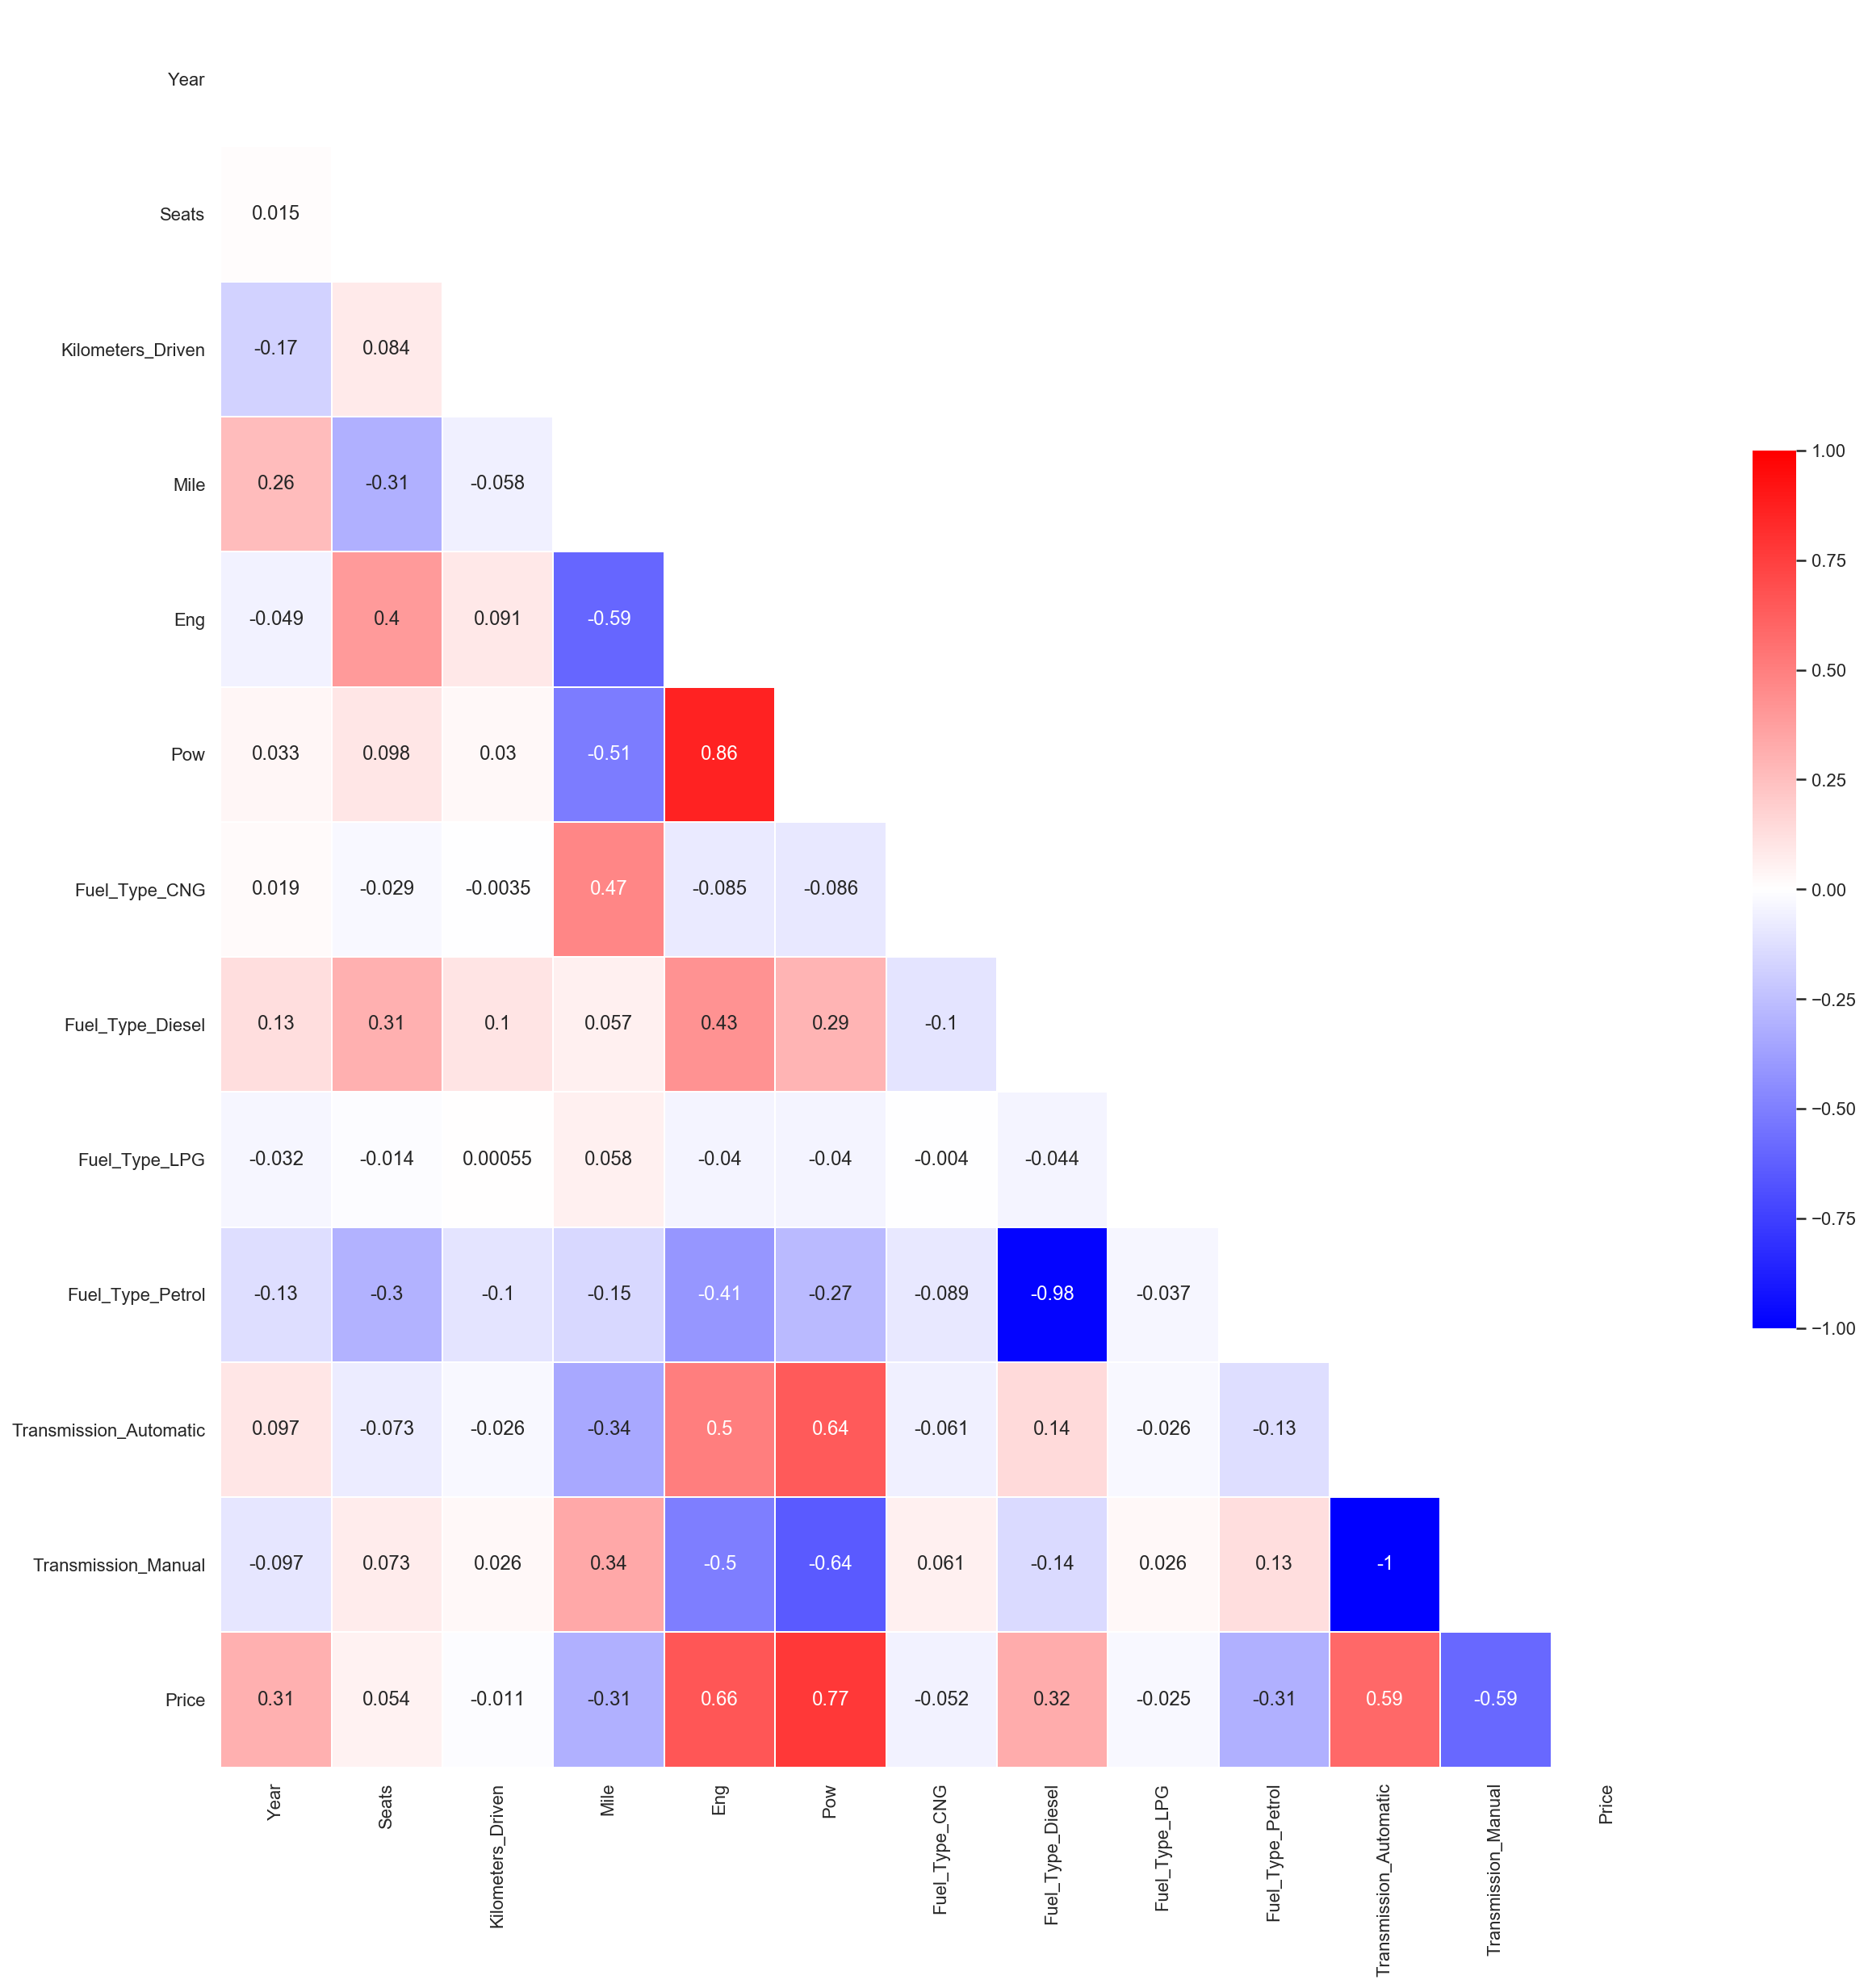

In [5]:
# 주요 변수들로 히트맵
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_LPG','Fuel_Type_Petrol','Transmission_Automatic','Transmission_Manual','Price']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

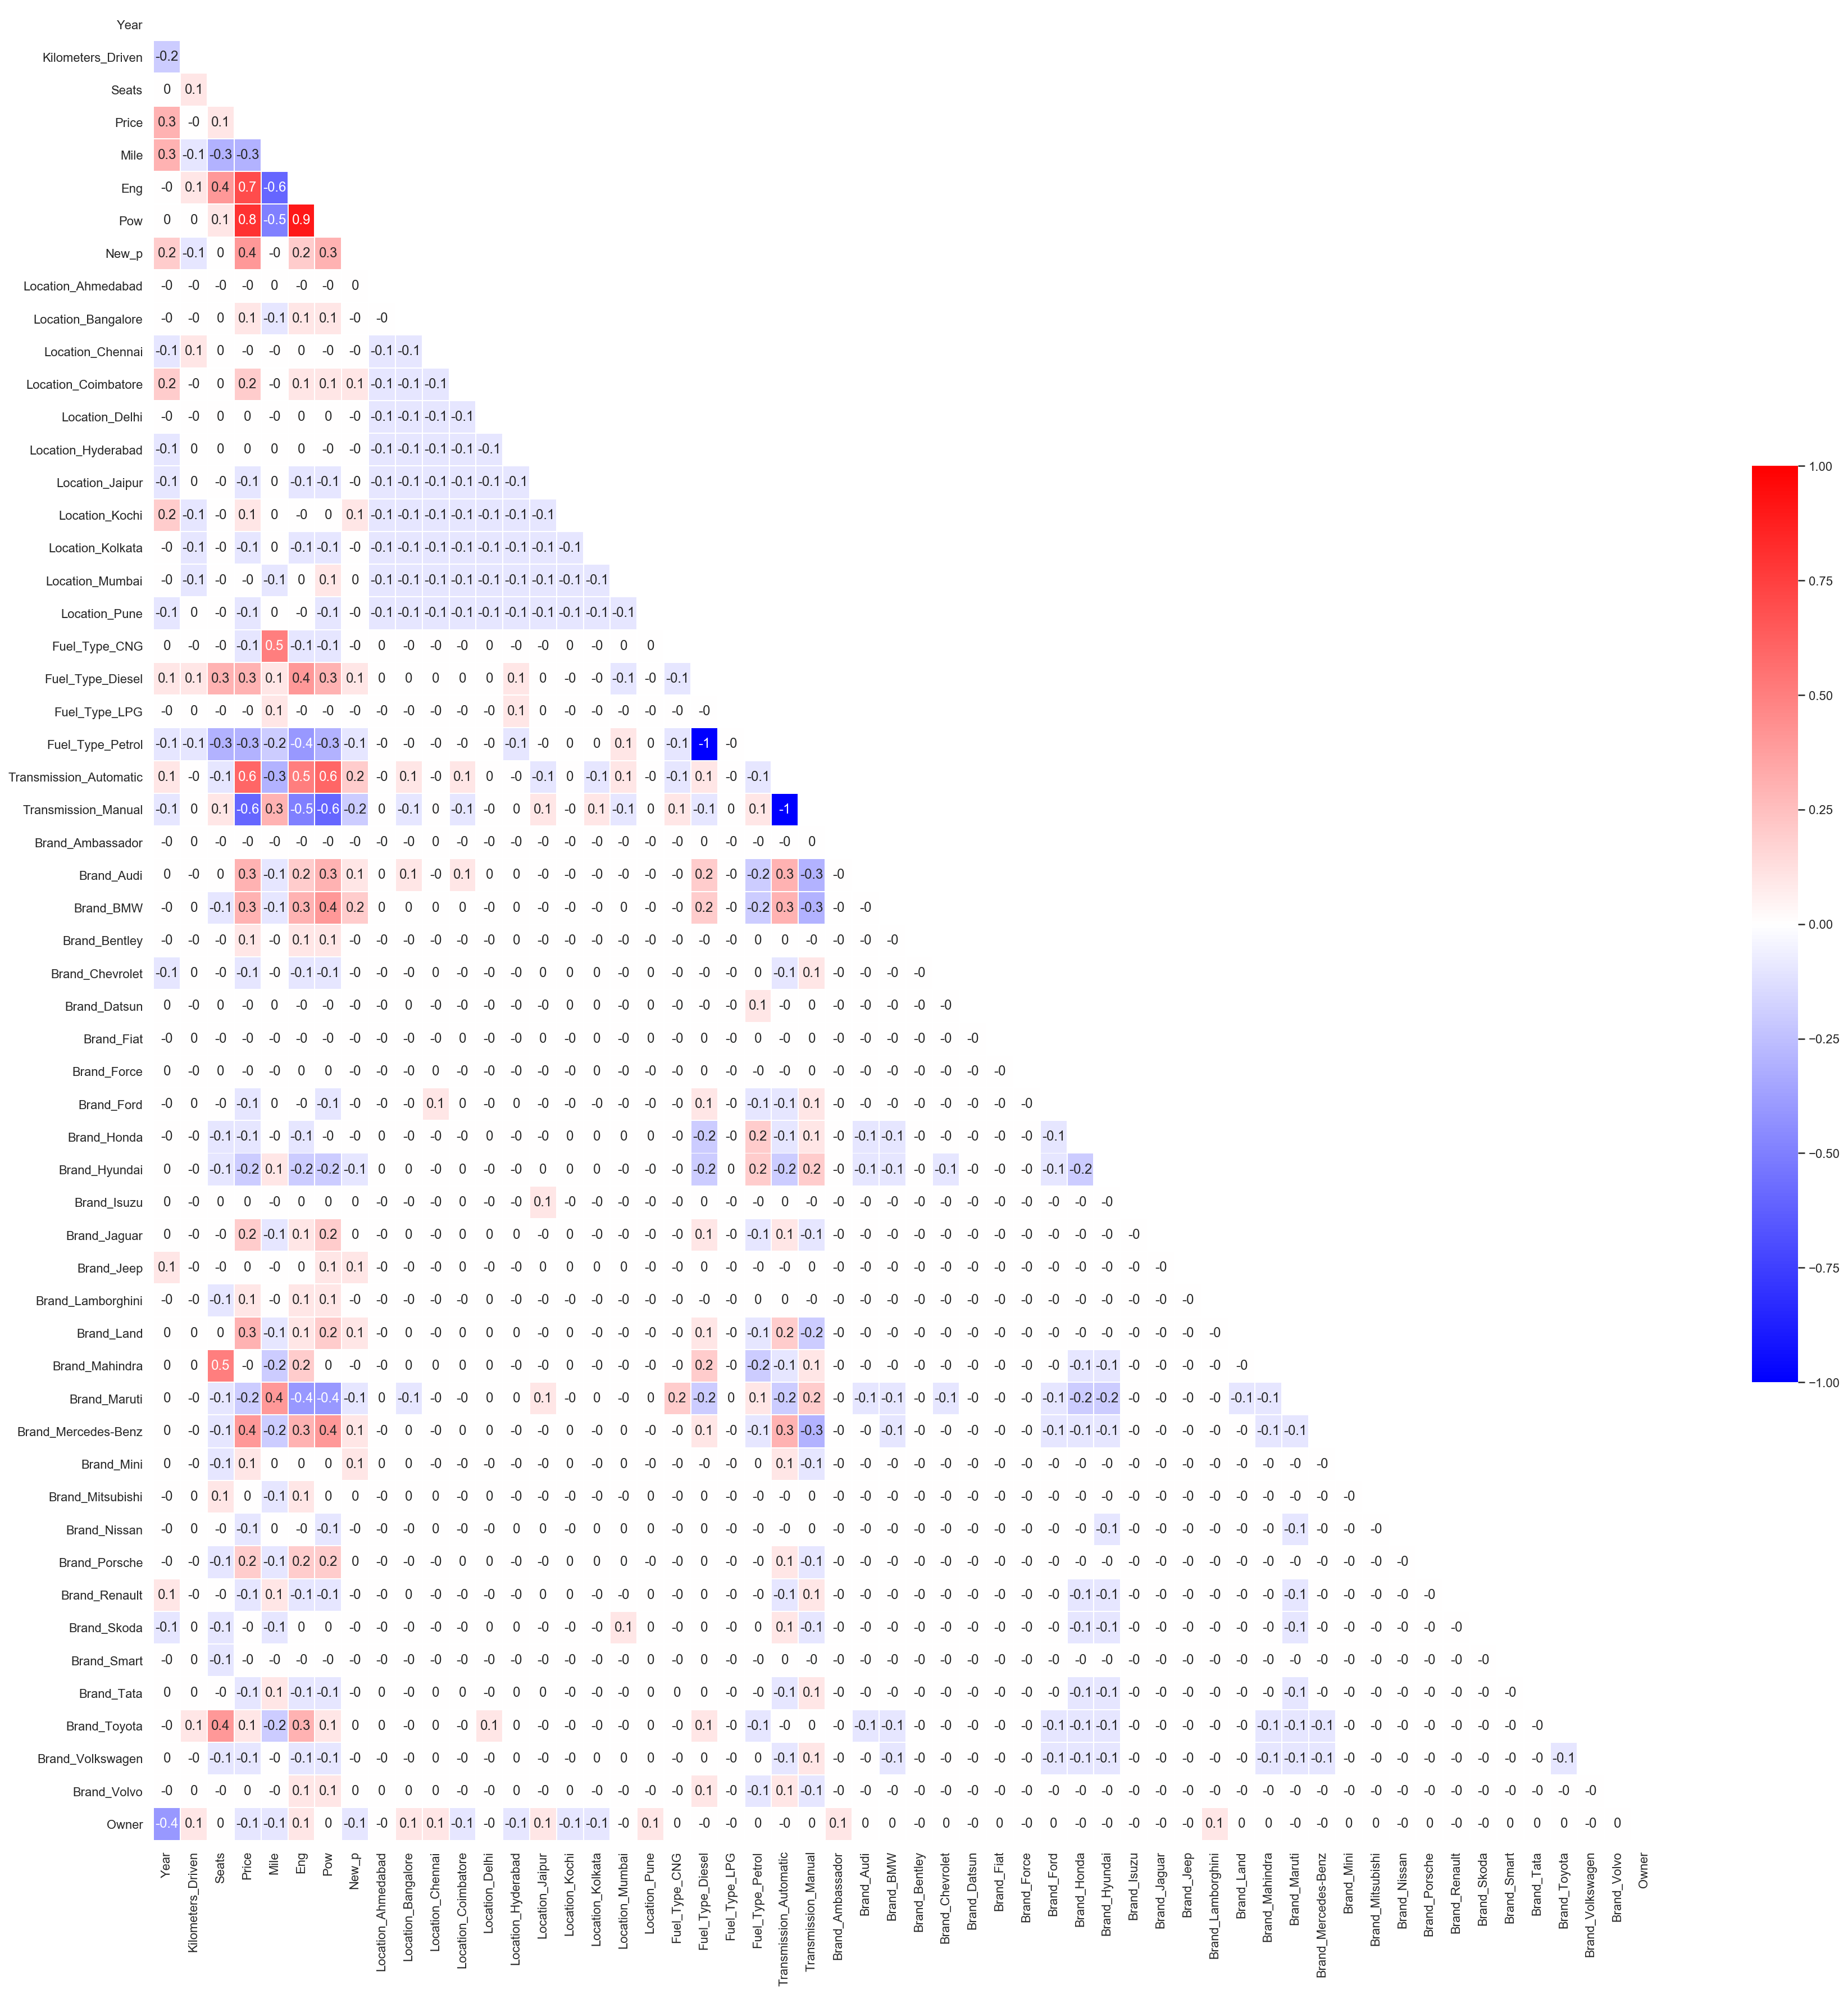

In [6]:
# 모든 컬럼을 변수로 히트맵
df = car_td.corr().round(1)

fig, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

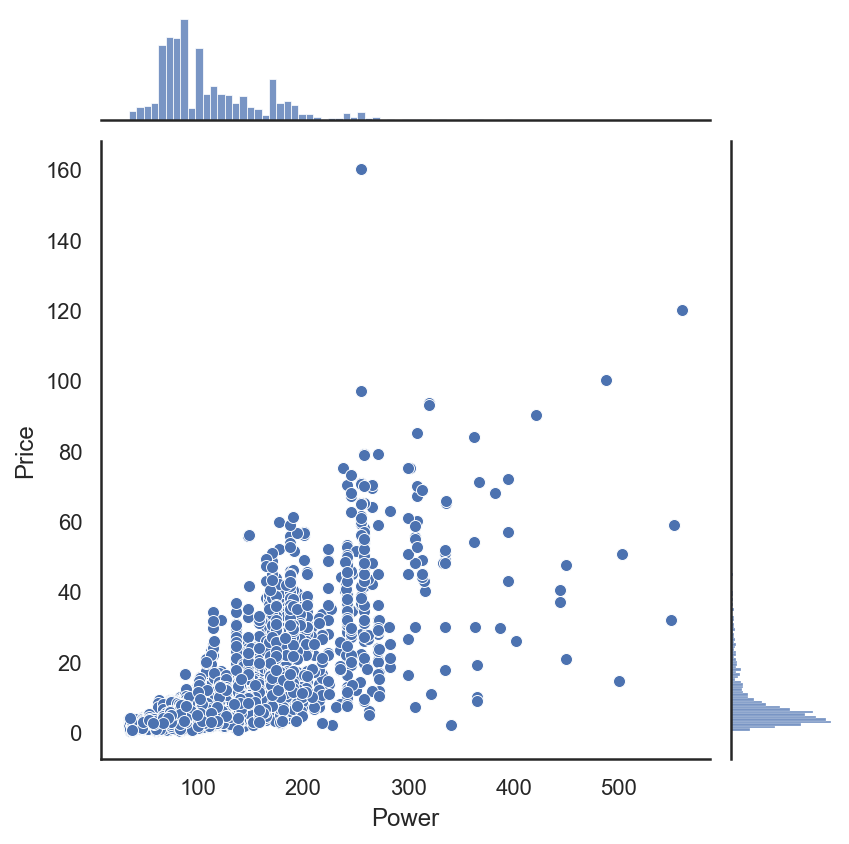

In [7]:
joint = sns.jointplot(x='Pow',y='Price',data=car_td)
joint.set_axis_labels(xlabel='Power',ylabel='Price')

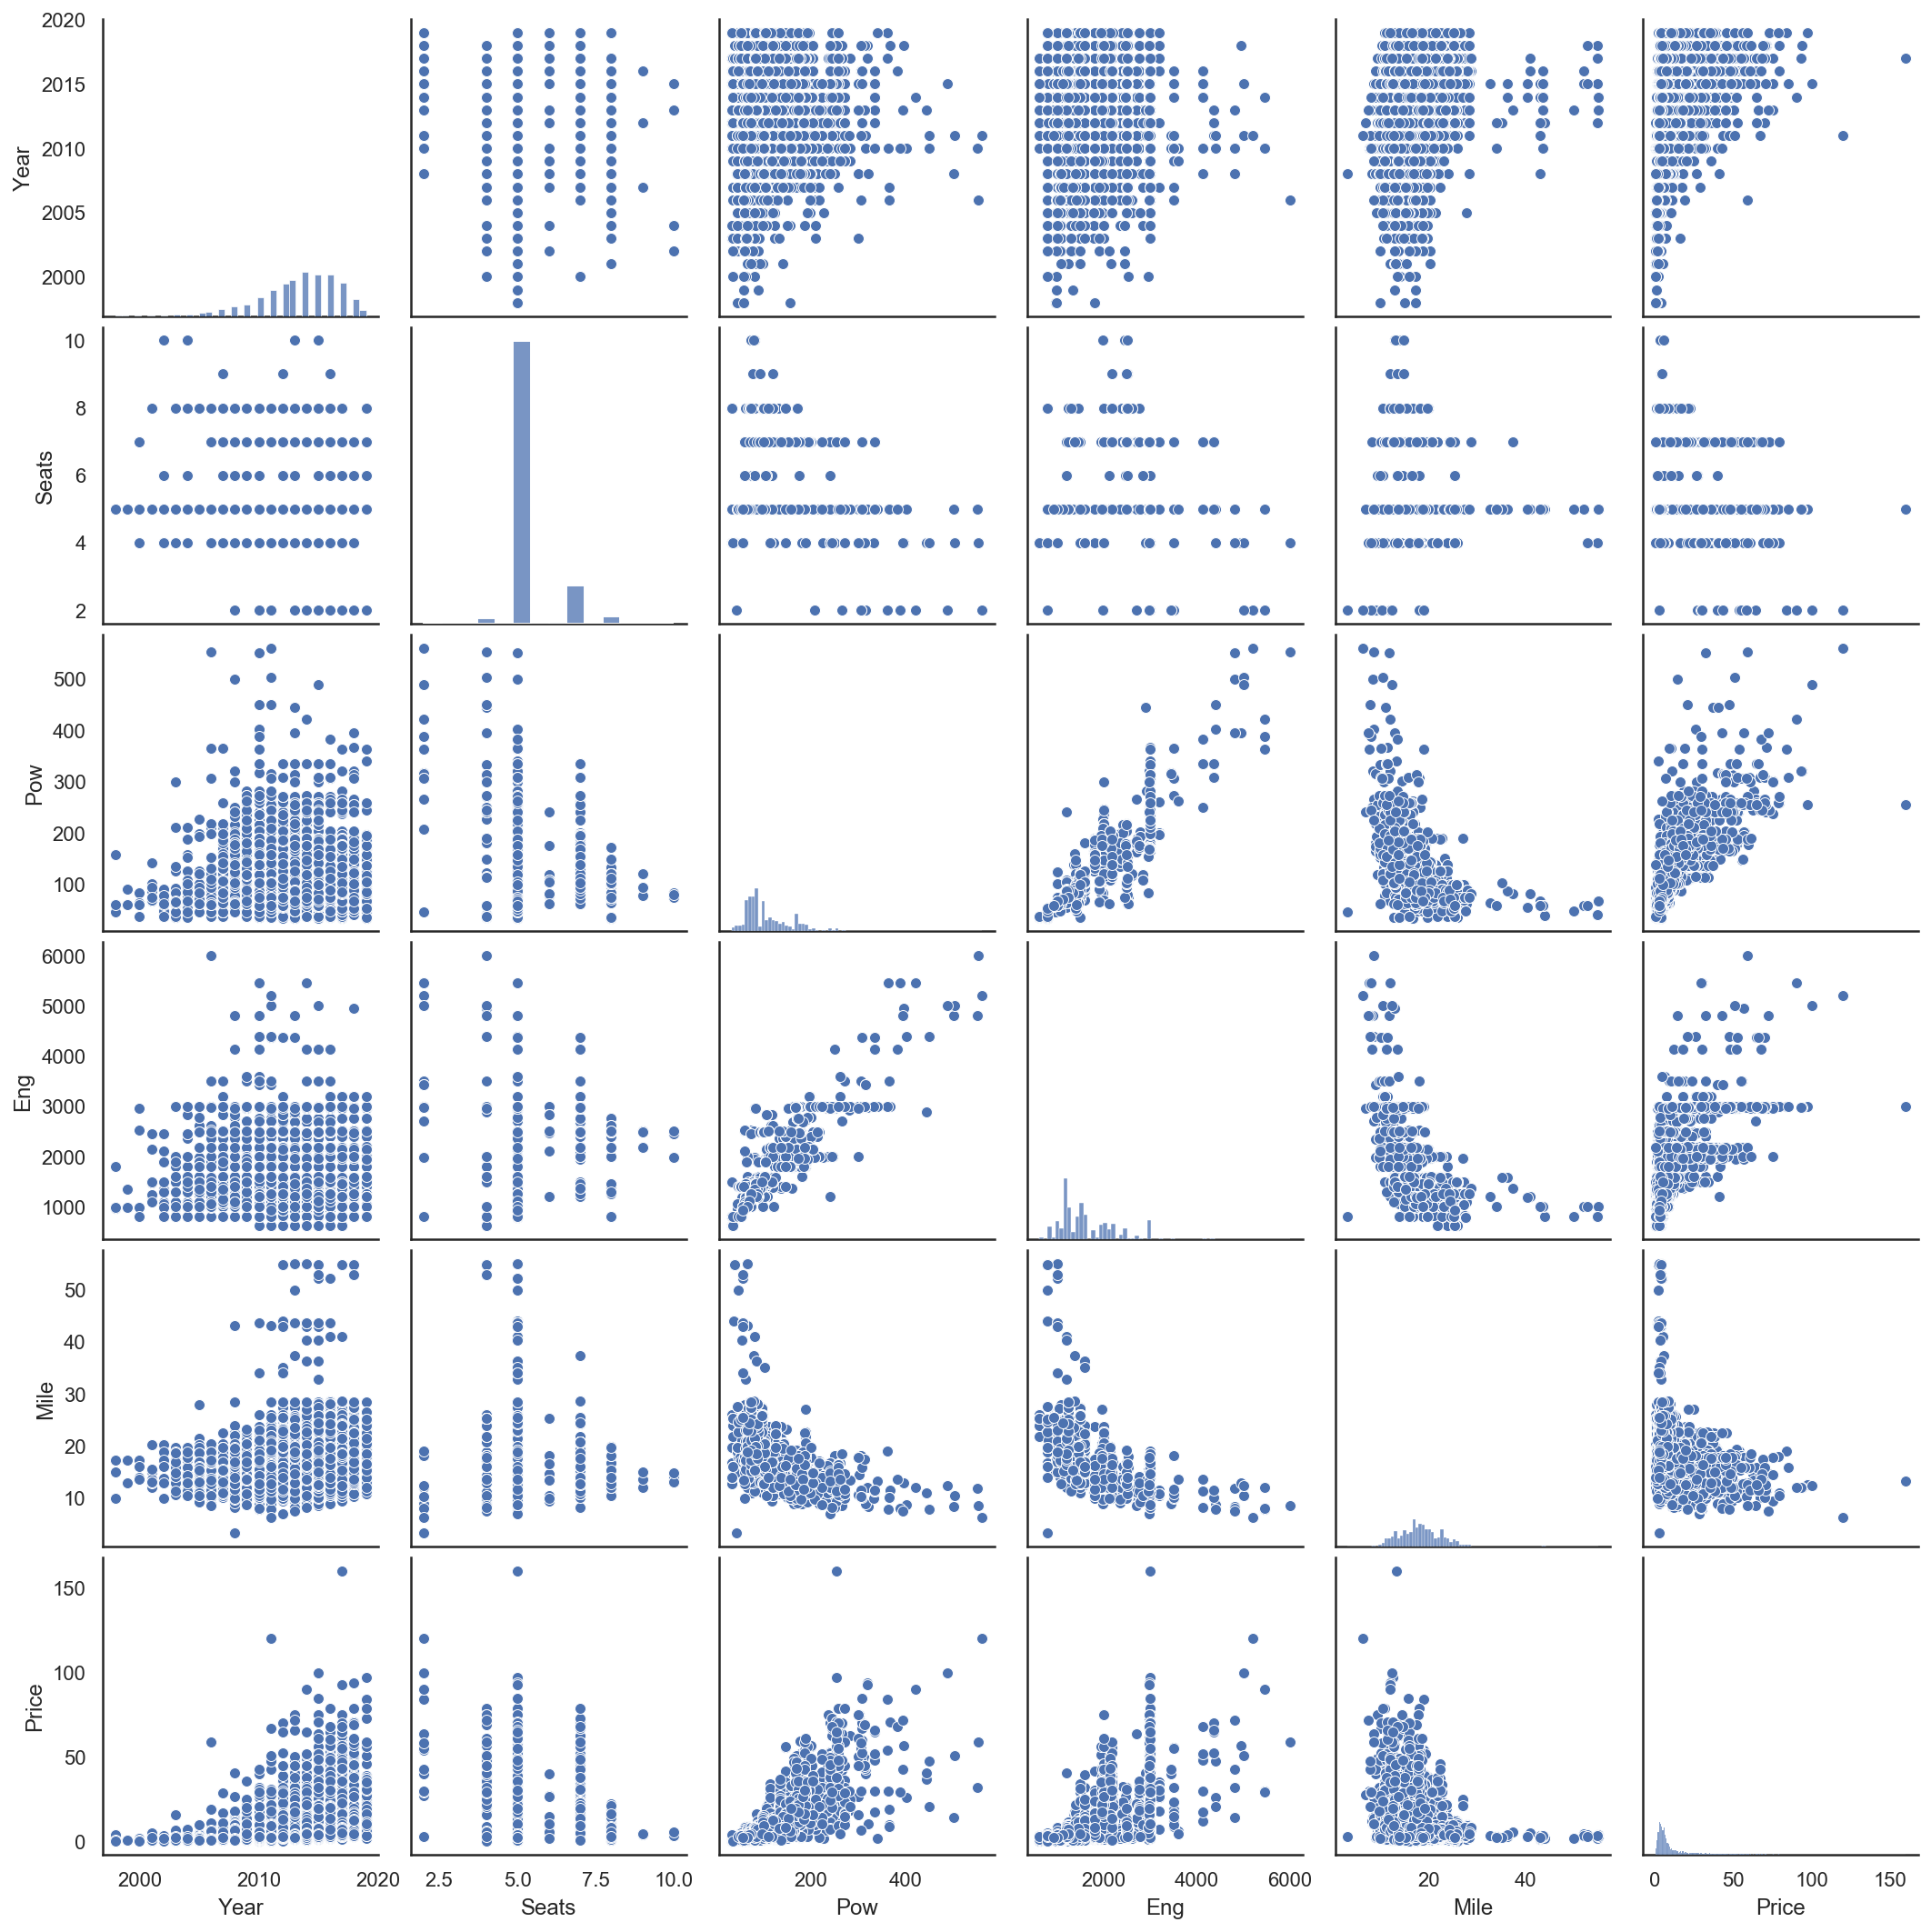

In [8]:
sns.pairplot(data=car_td[['Year','Seats','Pow', 'Eng', 'Mile', 'Price']])

# LinearRegression 모델

In [9]:
# linear 모델 결과 확인
def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [10]:
def get_results_rf(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_test = rf.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [11]:
def get_results2(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    
    return(mean_squared_error(pred_test, y_test))

## 1. new Price가 있는 데이터

In [12]:
car_td

Year  Kilometers_Driven  Seats  Price                    Car_name  \
0     2010              72000      5   1.75             Wagon R LXI CNG   
1     2015              41000      5  12.50    Creta 1.6 CRDi SX Option   
2     2011              46000      5   4.50                      Jazz V   
3     2012              87000      7   6.00                  Ertiga VDI   
4     2013              40670      5  17.74  A4 New 2.0 TDI Multitronic   
...    ...                ...    ...    ...                         ...   
6012  2014              27365      5   4.75                   Swift VDI   
6013  2015             100000      5   4.00            Xcent 1.1 CRDi S   
6014  2012              55000      8   2.90                Xylo D4 BSIV   
6015  2013              46000      5   2.65                 Wagon R VXI   
6016  2011              47000      5   2.50                 Beat Diesel   

        Mile     Eng     Pow  New_p  Location_Ahmedabad  Location_Bangalore  \
0     43.624   998.0   58.16   0.00                   0                   0   
1     19.670  1582.0  126.20   0.00                   0                   0   
2     18.200  1199.0   88.70   8.61                   0                   0   
3     20.770  1248.0   88.76   0.00                   0                   0   
4     15.200  1968.0  140.80   0.00                   0                   0   
...      ...     ...     ...    ...                 ...                 ...   
6012  28.400  1248.0   74.00   7.88                   0                   0   
6013  24.400  1120.0   71.00   0.00                   0                   0   
6014  14.000  2498.0  112.00   0.00                   0                   0   
6015  18.900   998.0   67.10   0.00                   0                   0   
6016  25.440   936.0   57.60   0.00                   0                   0   

      Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                    0                    0               0   
1                    0                    0               0   
2                    1                    0               0   
3                    1                    0               0   
4                    0                    1               0   
...                ...                  ...             ...   
6012                 0                    0               1   
6013                 0                    0               0   
6014                 0                    0               0   
6015                 0                    0               0   
6016                 0                    0               0   

      Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                      0                0               0                 0   
1                      0                0               0                 0   
2                      0                0               0                 0   
3                      0                0               0                 0   
4                      0                0               0                 0   
...                  ...              ...             ...               ...   
6012                   0                0               0                 0   
6013                   0                1               0                 0   
6014                   0                1               0                 0   
6015                   0                0               0                 1   
6016                   1                0               0                 0   

      Location_Mumbai  Location_Pune  Fuel_Type_CNG  Fuel_Type_Diesel  \
0                   1              0              1                 0   
1                   0              1              0                 1   
2                   0              0              0                 0   
3                   0              0              0                 1   
4                   0              0              0                 1   
...         

In [13]:
car_td_new = car_td[car_td['New_p'] != 0]
car_td_new.reset_index(drop=True, inplace=True)
X = car_td_new.drop(['Car_name','Price'],axis=1)
y = car_td_new['Price']

get_results(X,y)

explained_variance_score: 0.8100648003892198
mean_squared_errors: 33.79124402887566
r2_score: 0.8099211339731105


## 2. new Price가 없는 데이터

In [14]:
# ls_1000 = []

# for _ in range(0,10000):
#     car_8s = car_td[car_td['New_p'] == 0].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Car_name','Price'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

# ls_1000_pd = pd.DataFrame(ls_1000)

# len(ls_1000_pd[ls_1000_pd[0]>=46])/10000*100

### 결과

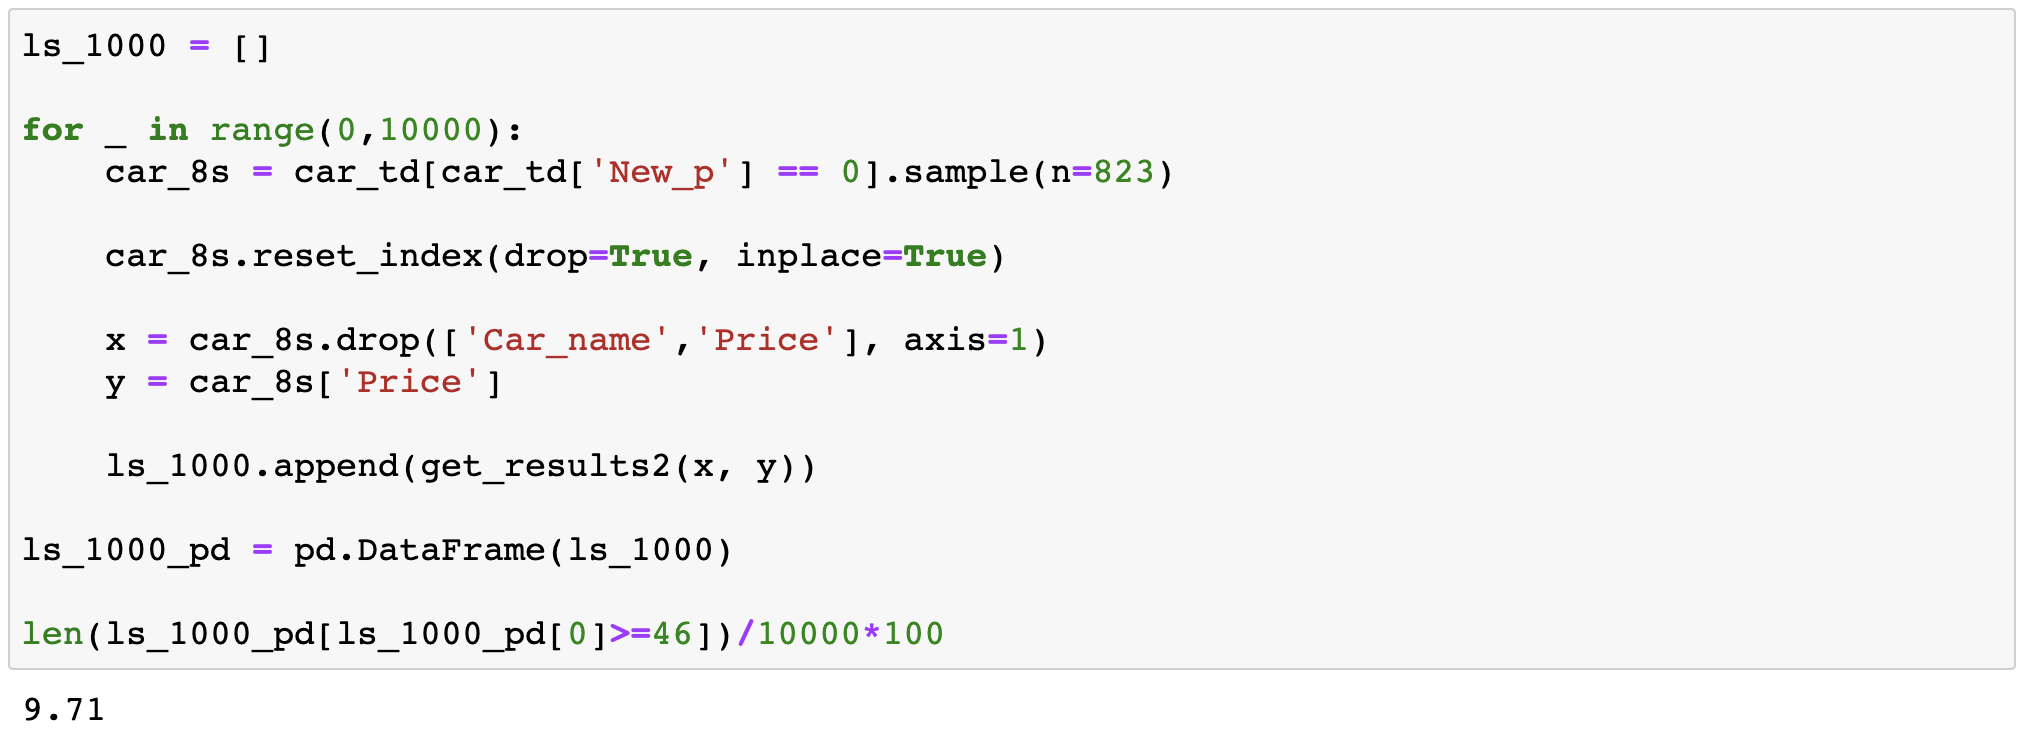

In [15]:
# new price columns 삭제

In [16]:
car_td.drop(['New_p'], axis=1, inplace=True)

In [17]:
X = car_td.drop(['Car_name', 'Price', 'Seats'], axis=1)
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7847859919013775
mean_squared_errors: 27.19680096943133
r2_score: 0.7837810185439982


## 3. 다중공선성

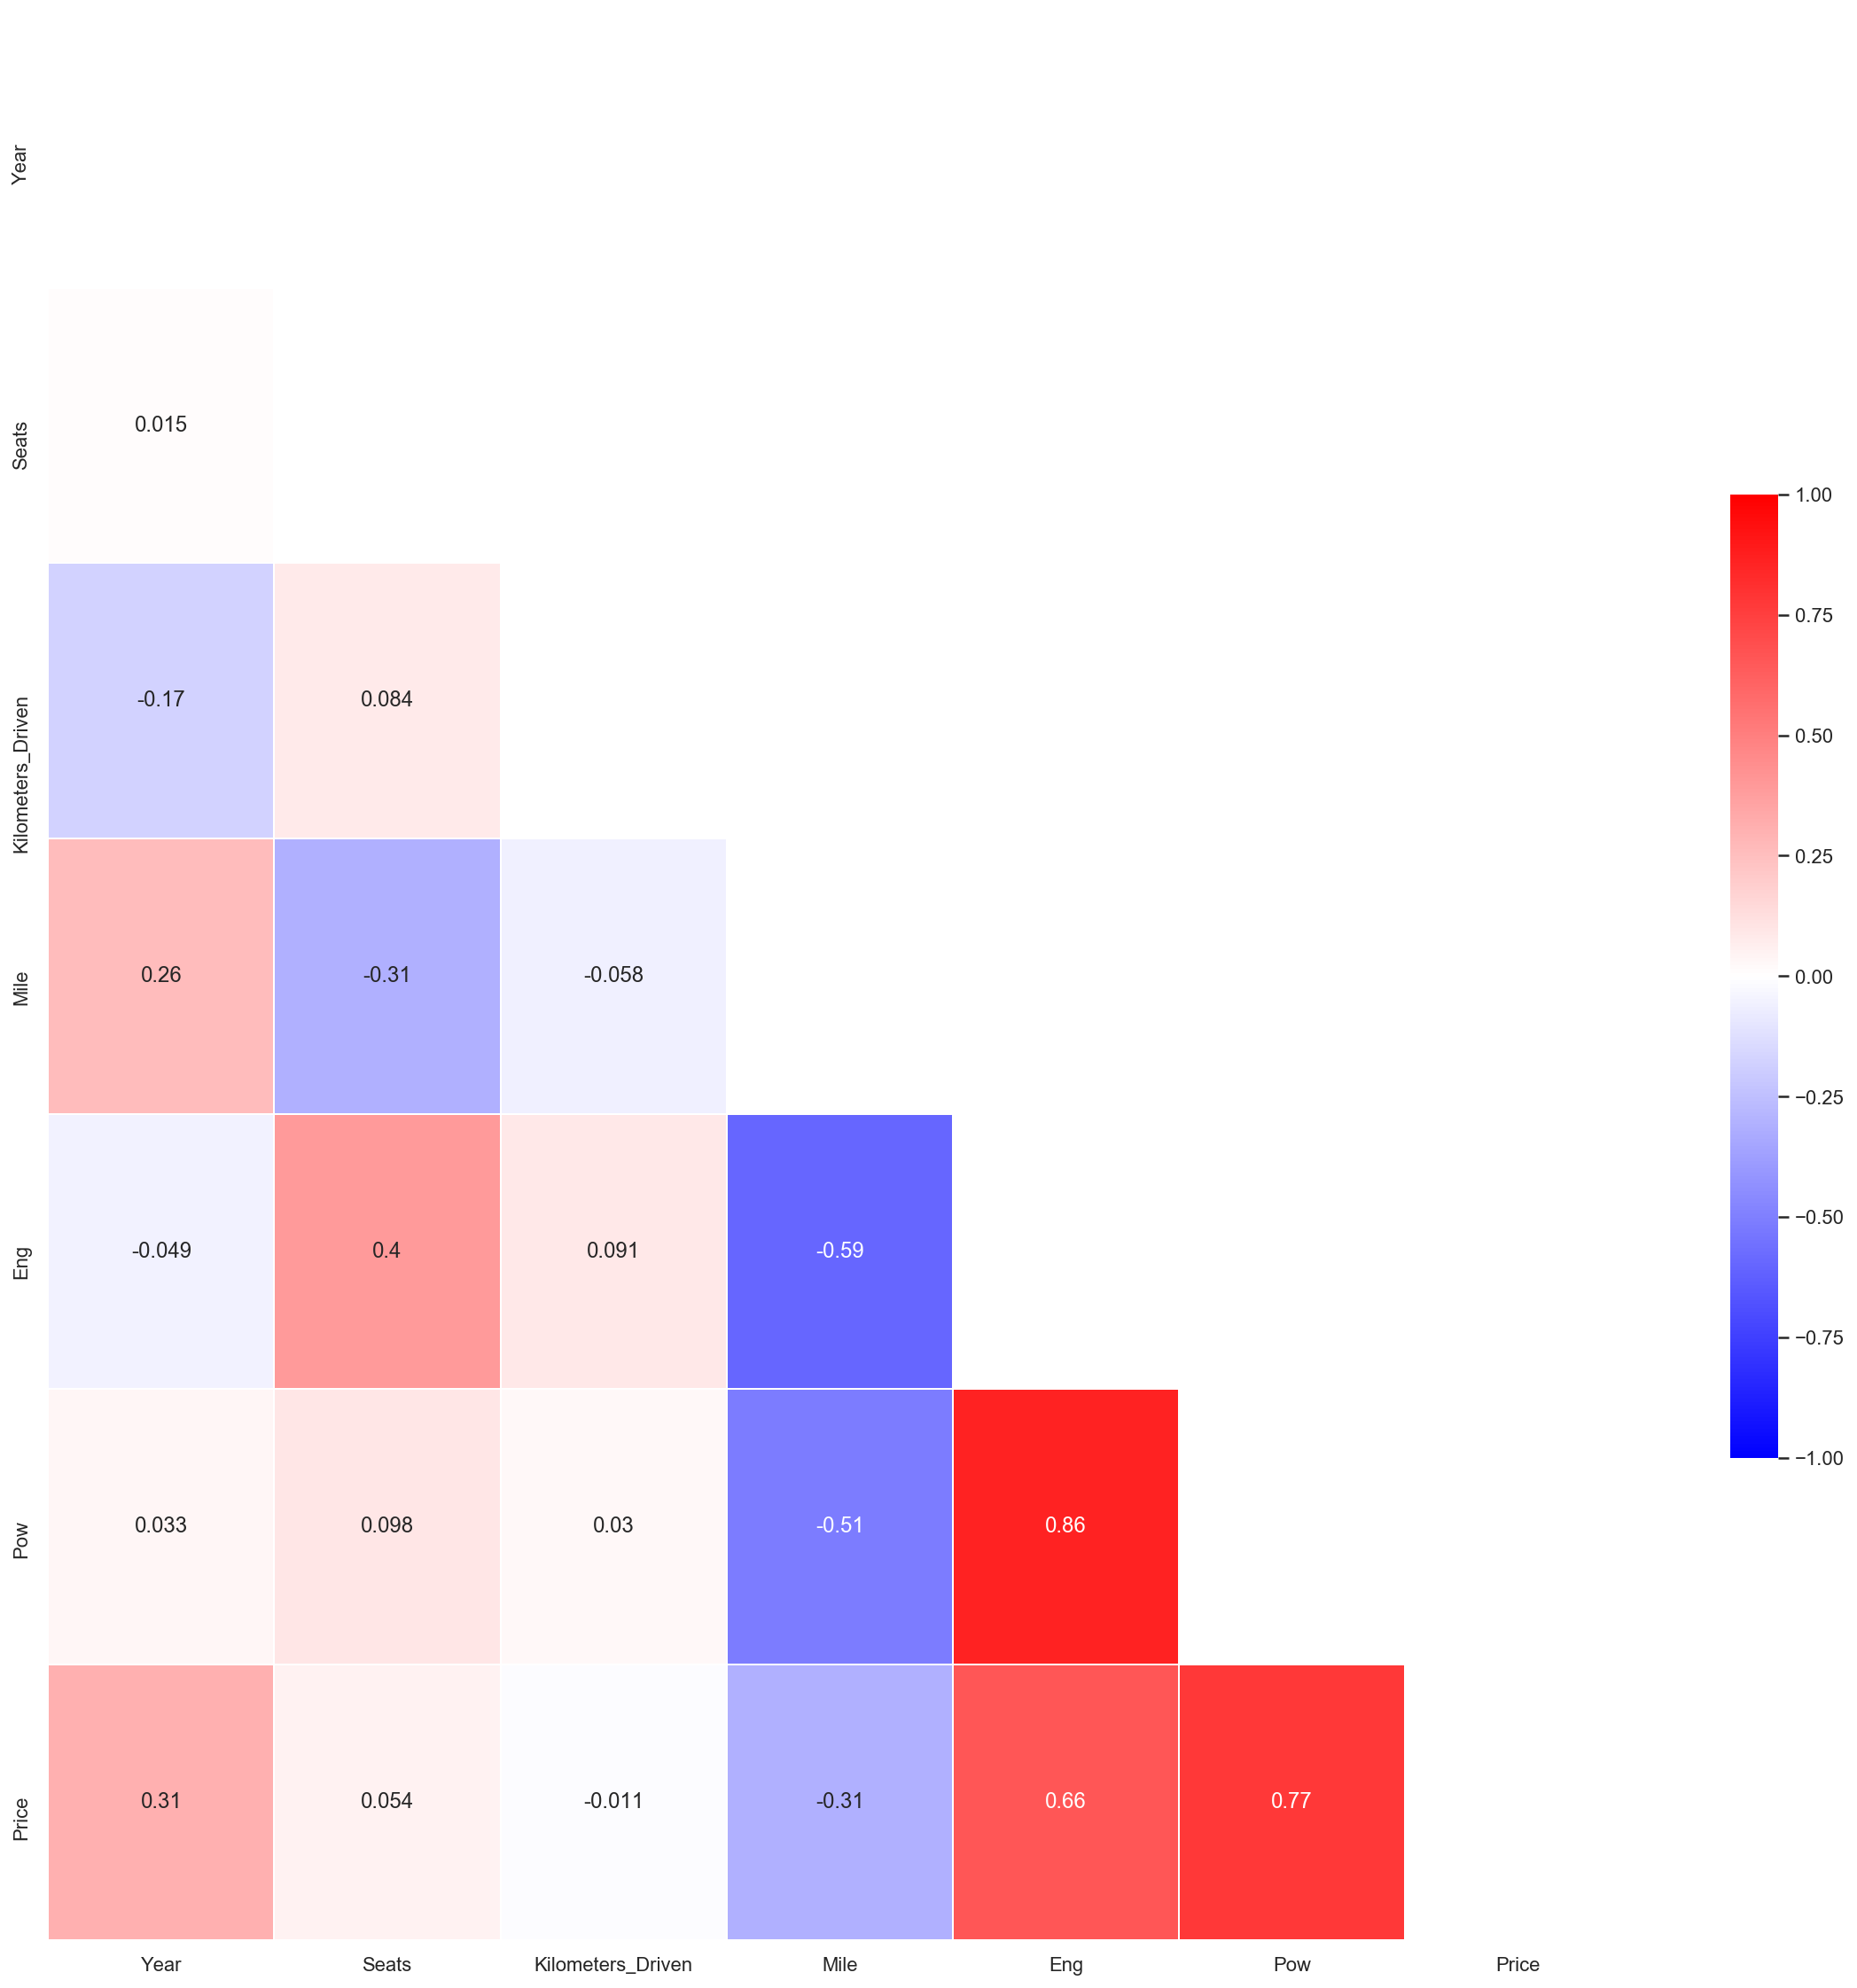

In [18]:
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [19]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7856502115238917
mean_squared_errors: 27.071557295095484
r2_score: 0.7847767260806728


In [20]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9253579008375127
mean_squared_errors: 0.011345288997120903
r2_score: 0.9253537769035407


In [21]:
inverse_log(0.011452974939501334)

1.0267222529814608

In [22]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7652386797118845
mean_squared_errors: 29.664063146970065
r2_score: 0.7641658838223833


In [23]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9138702328216004
mean_squared_errors: 0.013090669170490442
r2_score: 0.9138700643385684


In [24]:
inverse_log(0.013210194794038236)

1.0308849391641963

In [25]:
# 엔진을 제거하는게 모델 성능이 더 좋아짐

## 4. Scaler

### 4-1 MinMaxScaler

In [26]:
mm = MinMaxScaler()
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7856502115238768
mean_squared_errors: 27.071557295097463
r2_score: 0.7847767260806571


In [27]:
# 컬럼제거
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7555665463978924
mean_squared_errors: 30.86986036497314
r2_score: 0.7545796002513064


### 4-2 StandardScaler

In [28]:
# r2 score 음수

In [29]:
ss = StandardScaler()
X = ss.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: -1.1379649005186337e+26
mean_squared_errors: 1.4321661754295643e+28
r2_score: -1.1385953519870647e+26


### 4-3 RobustScaler

In [30]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7856502115238773
mean_squared_errors: 27.07155729509748
r2_score: 0.7847767260806569


In [31]:
# 컬럼 제거
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7555665463978926
mean_squared_errors: 30.86986036497321
r2_score: 0.7545796002513059


## 5. 정확도

In [32]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.767062465429553
Accuracy on Testing set:  0.7847767260806728


In [33]:
# LinearRegression - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.9245470600142279
Accuracy on Testing set:  0.9253537769035407


In [34]:
# RandomForestRegresser - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy on Training set: ",rf.score(X_train,y_train))
print("Accuracy on Testing set: ",rf.score(X_test,y_test))

Accuracy on Training set:  0.9908953223464236
Accuracy on Testing set:  0.9454419918963636


## 6. cross validation

In [35]:
skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

In [36]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

In [37]:
reg = LinearRegression()

In [38]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.00984693, 0.01232791, 0.01595497, 0.01498294, 0.01413608]),
 'score_time': array([0.00325584, 0.00320697, 0.003196  , 0.00314283, 0.00380588]),
 'test_score': array([0.77967324, 0.60855586, 0.77749784, 0.70899889, 0.78676468])}

In [39]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.7322981041304178

In [40]:
# LinearRegressor - log

In [41]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

In [42]:
reg = LinearRegression()

In [43]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.014184  , 0.01237607, 0.01559496, 0.01716185, 0.01358604]),
 'score_time': array([0.0031631 , 0.00295496, 0.00361919, 0.00393128, 0.00336409]),
 'test_score': array([0.93095938, 0.8974113 , 0.91130978, 0.92217455, 0.92670007])}

In [44]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.9177110175574745

In [45]:
# RandomForestRegressor - log

In [46]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

rf = RandomForestRegressor()

cross_validate(rf, X, y, cv=kf)

{'fit_time': array([1.80657578, 1.82428908, 1.79242492, 1.79169583, 1.77632523]),
 'score_time': array([0.03435516, 0.03181386, 0.0313499 , 0.03311419, 0.03392792]),
 'test_score': array([0.94709766, 0.91249721, 0.93381125, 0.94457919, 0.94212728])}

In [47]:
score = cross_val_score(rf, X, y, cv=kf)
score.mean()

0.9353148432065772

---

## MSE

In [48]:
# LinearRegressor
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7856502115238917
mean_squared_errors: 27.071557295095484
r2_score: 0.7847767260806728


In [49]:
# LinearRegressor - log
X = car_td.drop(['Car_name', 'Price', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9269193832132419
mean_squared_errors: 0.01110768436614214
r2_score: 0.9269170943560352


In [50]:
# LinearRegressor - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9253579008375127
mean_squared_errors: 0.011345288997120903
r2_score: 0.9253537769035407


In [51]:
inverse_log(0.011452974939501334)

1.0267222529814608

In [52]:
# RandomForestRegressor
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results_rf(X, y)

explained_variance_score: 0.9200887383723677
mean_squared_errors: 10.055304735240556
r2_score: 0.920058695486755


In [53]:
# RandomForestRegressor - log(seats를 제거하는 것이 r2 score가 높음)
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results_rf(X, y)

explained_variance_score: 0.945342394858262
mean_squared_errors: 0.008311900571569933
r2_score: 0.945311927745653


In [54]:
# RandomForestRegressor - log
X = car_td.drop(['Car_name', 'Price', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results_rf(X, y)

explained_variance_score: 0.9454230429539368
mean_squared_errors: 0.008299702438067125
r2_score: 0.9453921852512169


In [55]:
inverse_log(0.008549150098297379)

1.0198801756822085

# 브랜드별 그래프
- 브랜드별 데이터프레임 구축
- 브랜드별 모델 구축

In [56]:
car_t = pd.read_csv('./train_data_r.csv')

In [57]:
car_t = car_t.drop([4446, 4904])
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)
car_t.reset_index(drop=True, inplace=True)

In [58]:
get_split(car_t, 'Name', 'Brand')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')

Brand
Mile
Eng
Pow


In [59]:
# 브랜드별 모델 구축시, 정확도를 위해 Diesel과 Petrol만 사용
car_t = car_t[(car_t['Fuel_Type'] == 'Diesel') | (car_t['Fuel_Type'] == 'Petrol')]
car_t.reset_index(drop=True, inplace=True)

In [60]:
car_t.head()

Name    Location  Year  Kilometers_Driven  \
0  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
1                      Honda Jazz V     Chennai  2011              46000   
2                 Maruti Ertiga VDI     Chennai  2012              87000   
3   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
4            Nissan Micra Diesel XV      Jaipur  2013              86999   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp      5   
1    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp      5   
2    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp      7   
3    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp      5   
4    Diesel       Manual      First  23.08 kmpl  1461 CC   63.1 bhp      5   

   New_Price  Price    Brand   Mile   Eng    Pow  
0        NaN  12.50  Hyundai  19.67  1582  126.2  
1  8.61 Lakh   4.50    Honda   18.2  1199   88.7  
2        NaN   6.00   Maruti  20.77  1248  88.76  
3        NaN  17.74     Audi   15.2  1968  140.8  
4        NaN   3.50   Nissan  23.08  1461   63.1

In [61]:
def get_Brand_df(Brand):
    car = car_t[car_t['Brand'] == Brand]

    car.reset_index(drop=True, inplace=True)

    car['Owner'] = range(0,len(car))

    for i in range(0,len(car)):
        if car['Owner_Type'][i] == 'First':
            car['Owner'][i] = 1

        elif car['Owner_Type'][i] == 'Second':
            car['Owner'][i] = 2

        elif car['Owner_Type'][i] == 'Third':
            car['Owner'][i] = 3

        elif car['Owner_Type'][i] == 'Fourth & Above':
            car['Owner'][i] = 4

    car = pd.get_dummies(car, columns=['Location','Fuel_Type', 'Transmission'])

    car = car.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price'], axis=1)

    return(car)

In [62]:
def get_graph(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    predicted = reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(15,10))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.axis([0, 10, 0, 10])  
    line = plt.plot([0,10], [0,10])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

In [63]:
def get_graph_rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    predicted = rf_reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(15,10))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.title(i, fontsize=20, y=1.05)
    plt.axis([0, 2, 0, 2])  
    line = plt.plot([0,2], [0,2])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

Hyundai
explained_variance_score: 0.9219476572683895
mean_squared_errors: 0.005290195110074844
r2_score: 0.9219376152514107
None


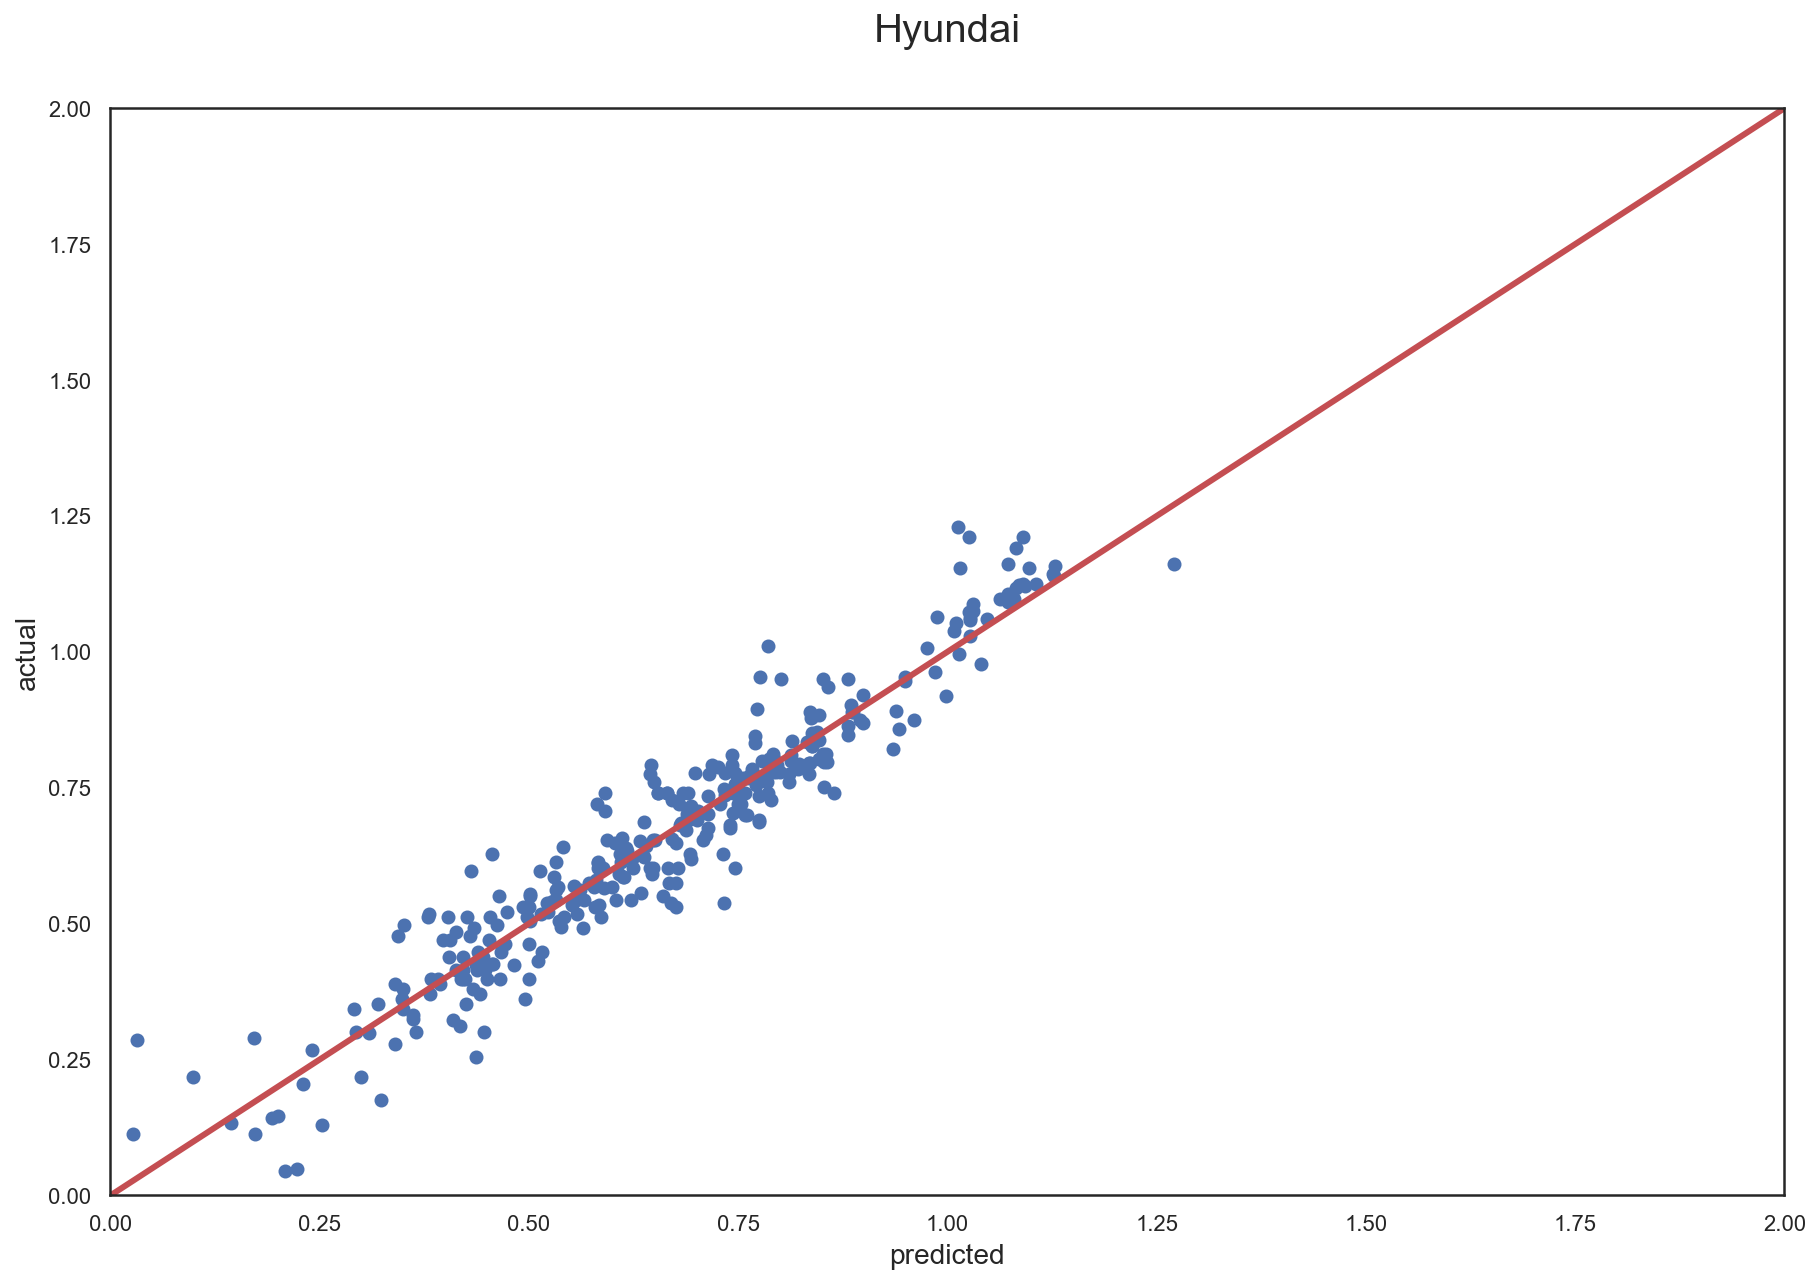

None
Honda
explained_variance_score: 0.8430629242732034
mean_squared_errors: 0.006723970991102458
r2_score: 0.842468809564308
None


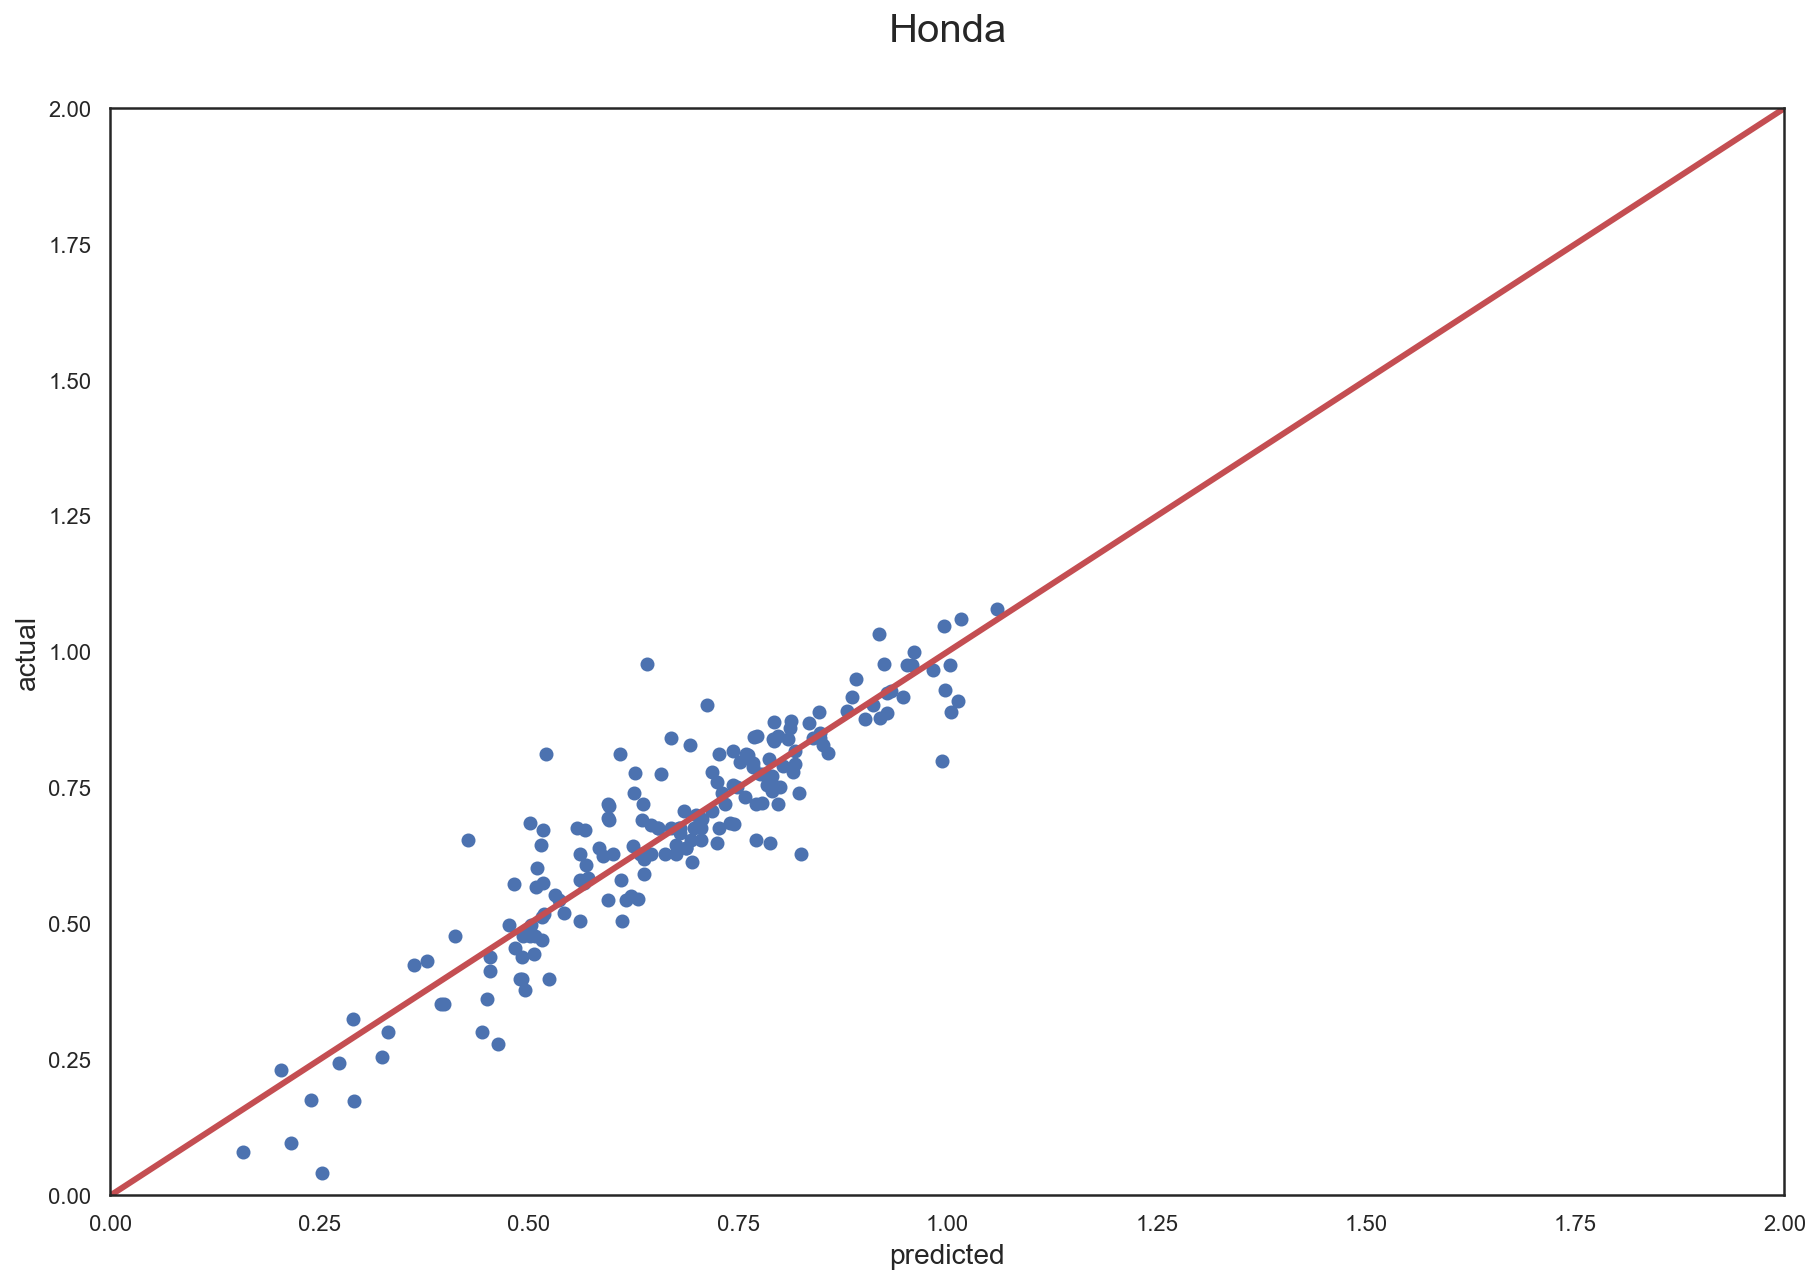

None
Maruti
explained_variance_score: 0.9287733007463039
mean_squared_errors: 0.0046279404502040005
r2_score: 0.9287653719783951
None


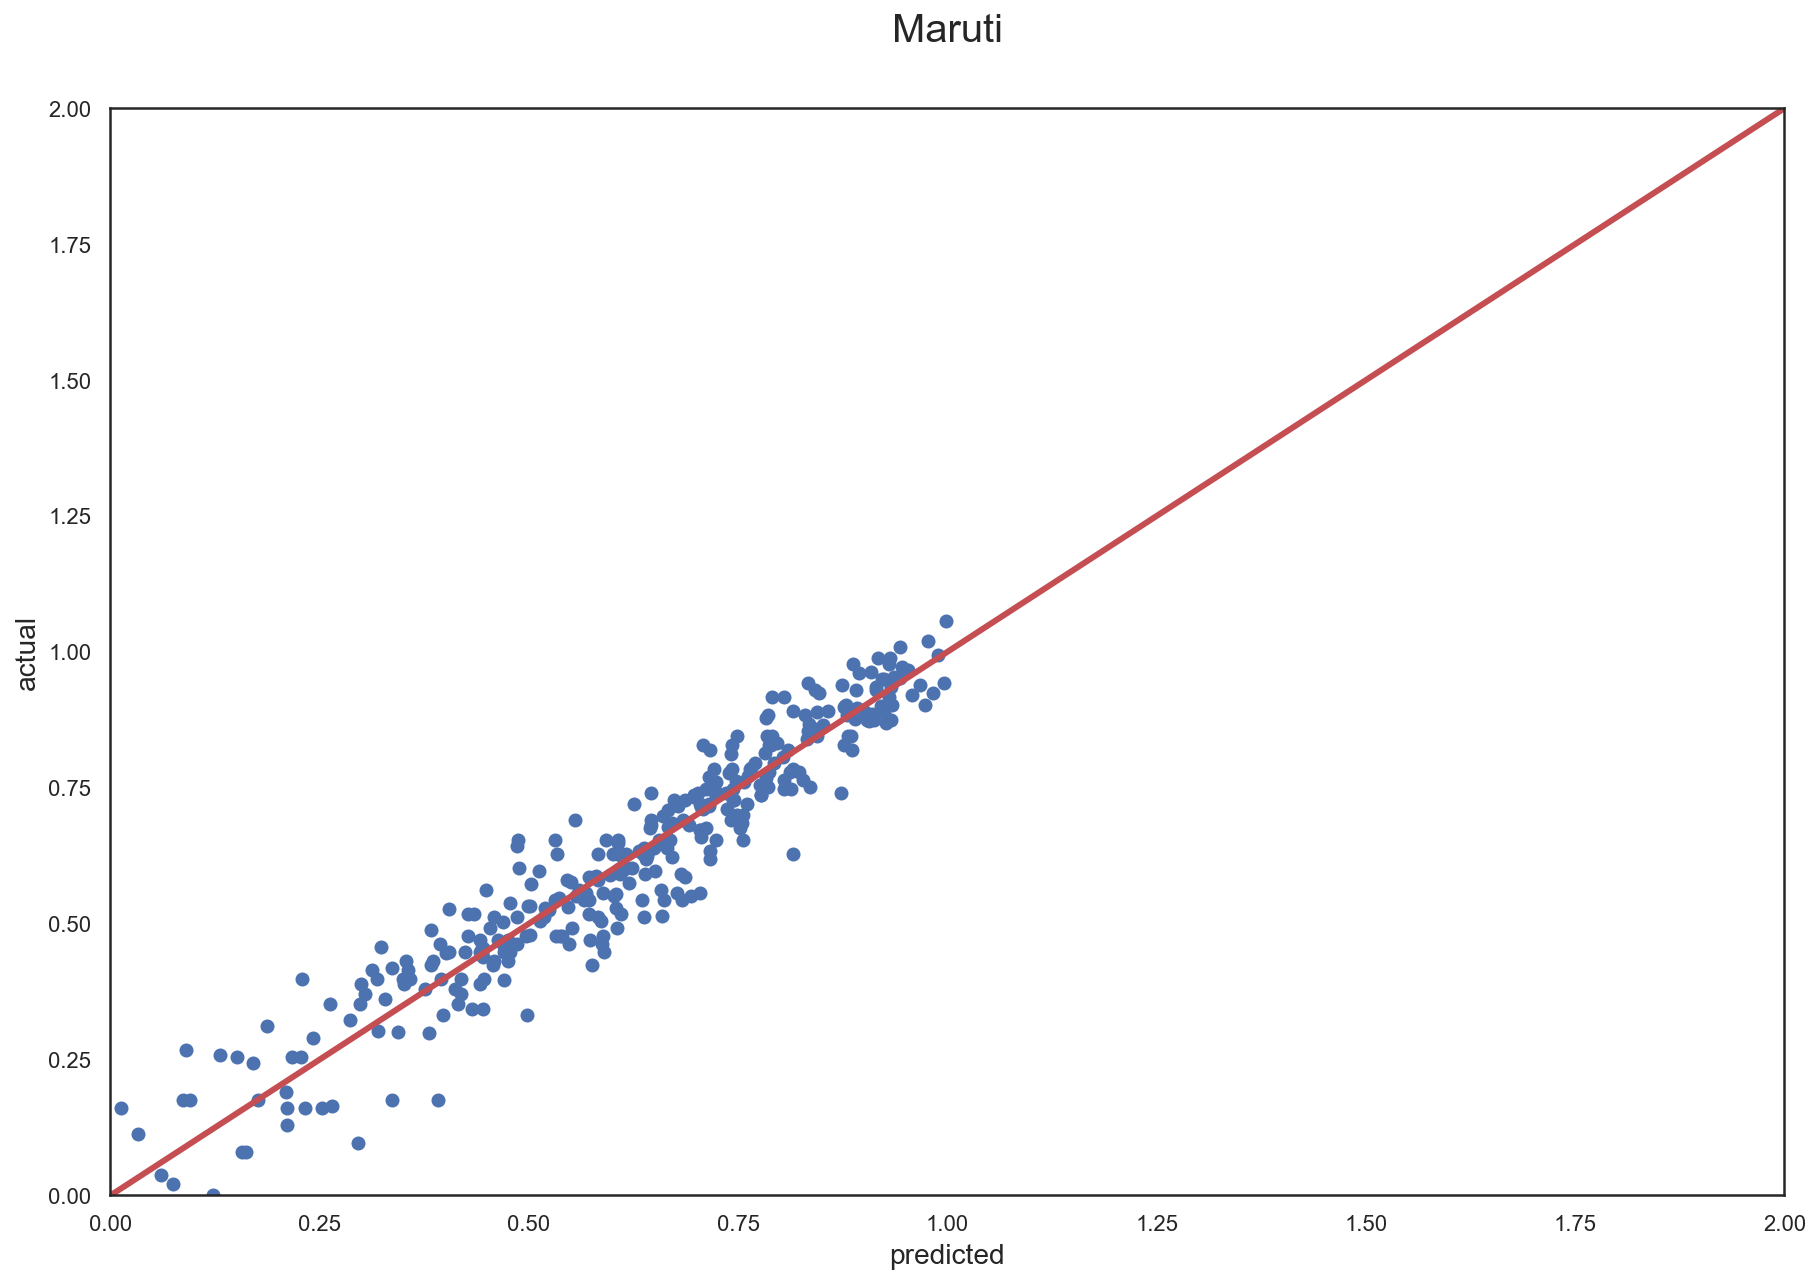

None
Audi
explained_variance_score: 0.8196870730800491
mean_squared_errors: 0.00788397542487143
r2_score: 0.8172794816262473
None


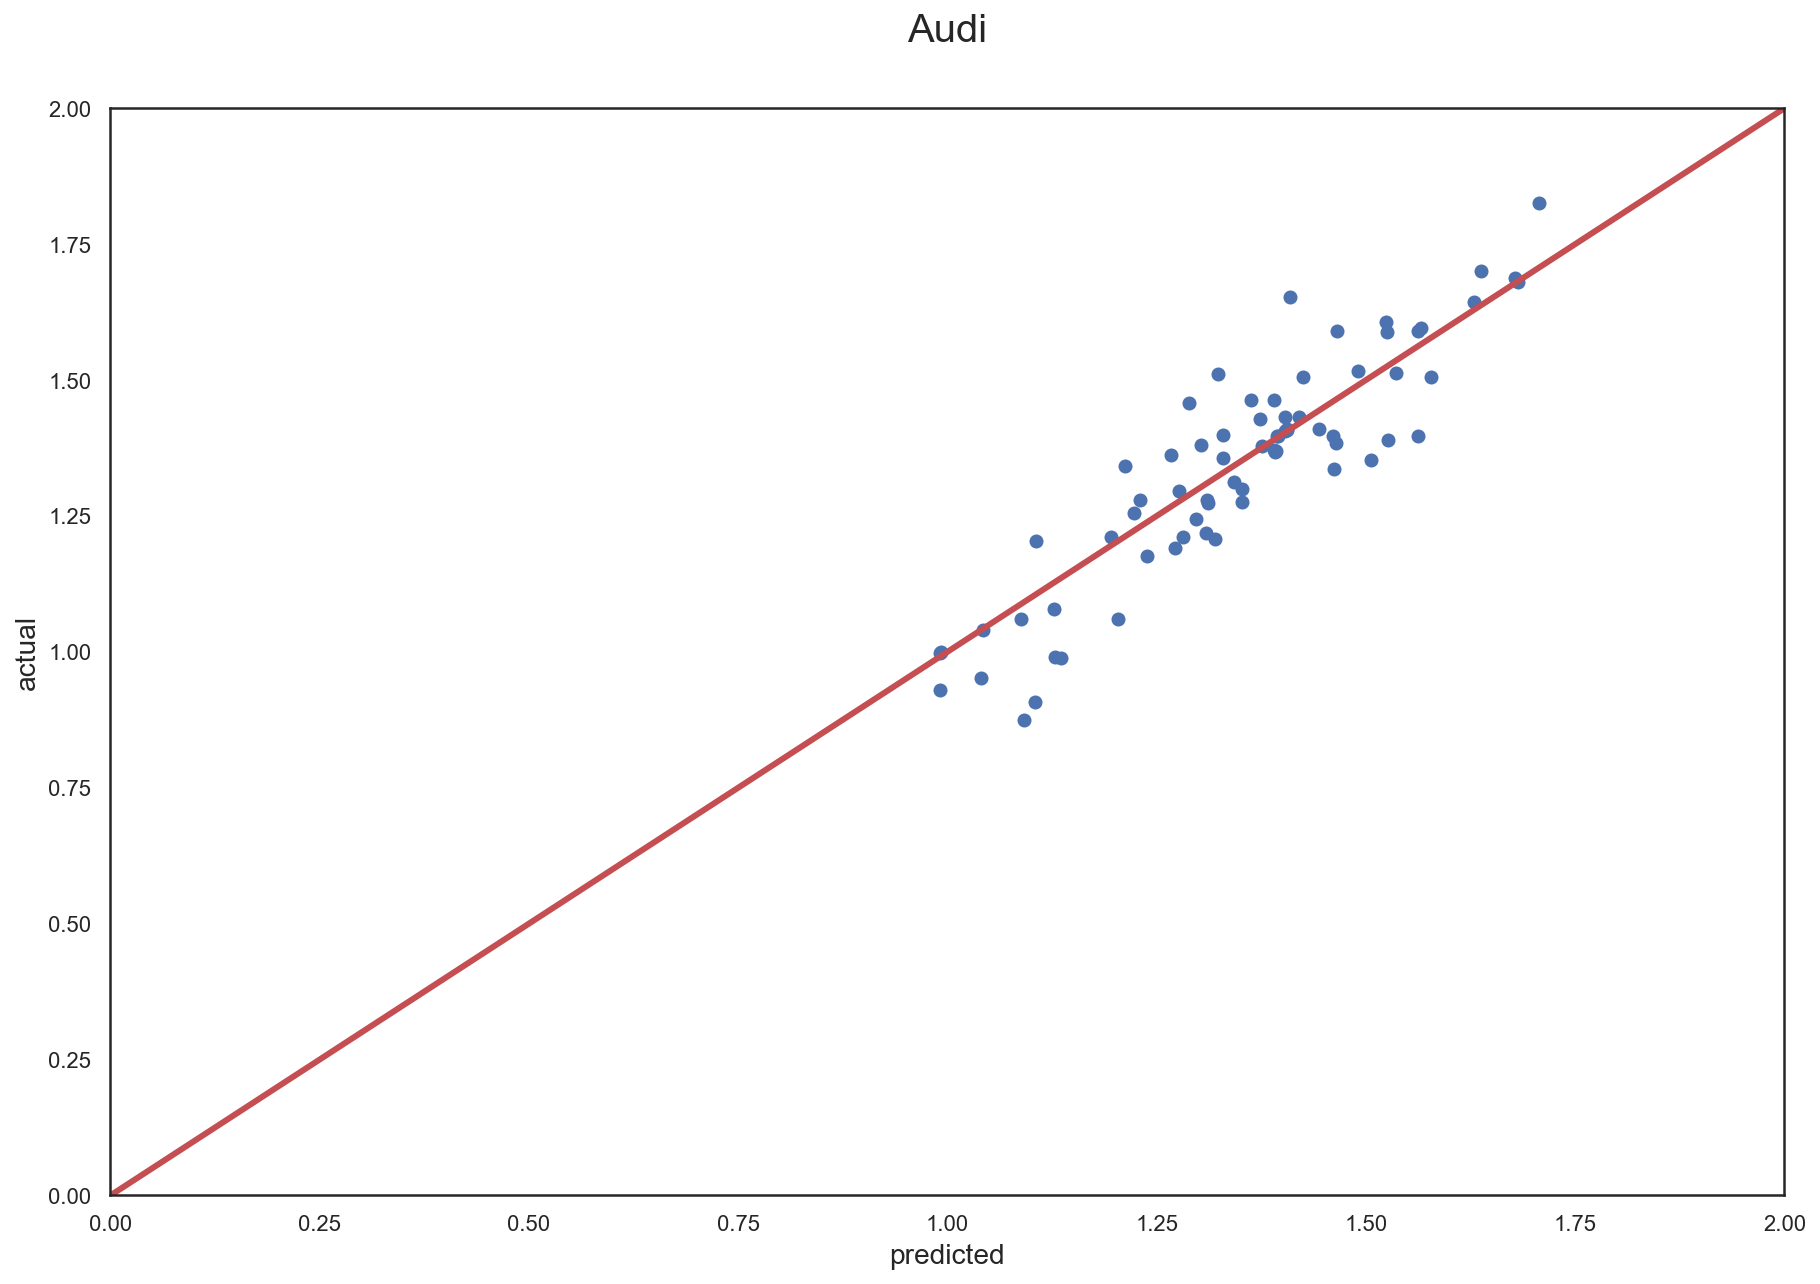

None
Nissan
explained_variance_score: 0.6344576101750156
mean_squared_errors: 0.009190861195215444
r2_score: 0.5953389269384701
None


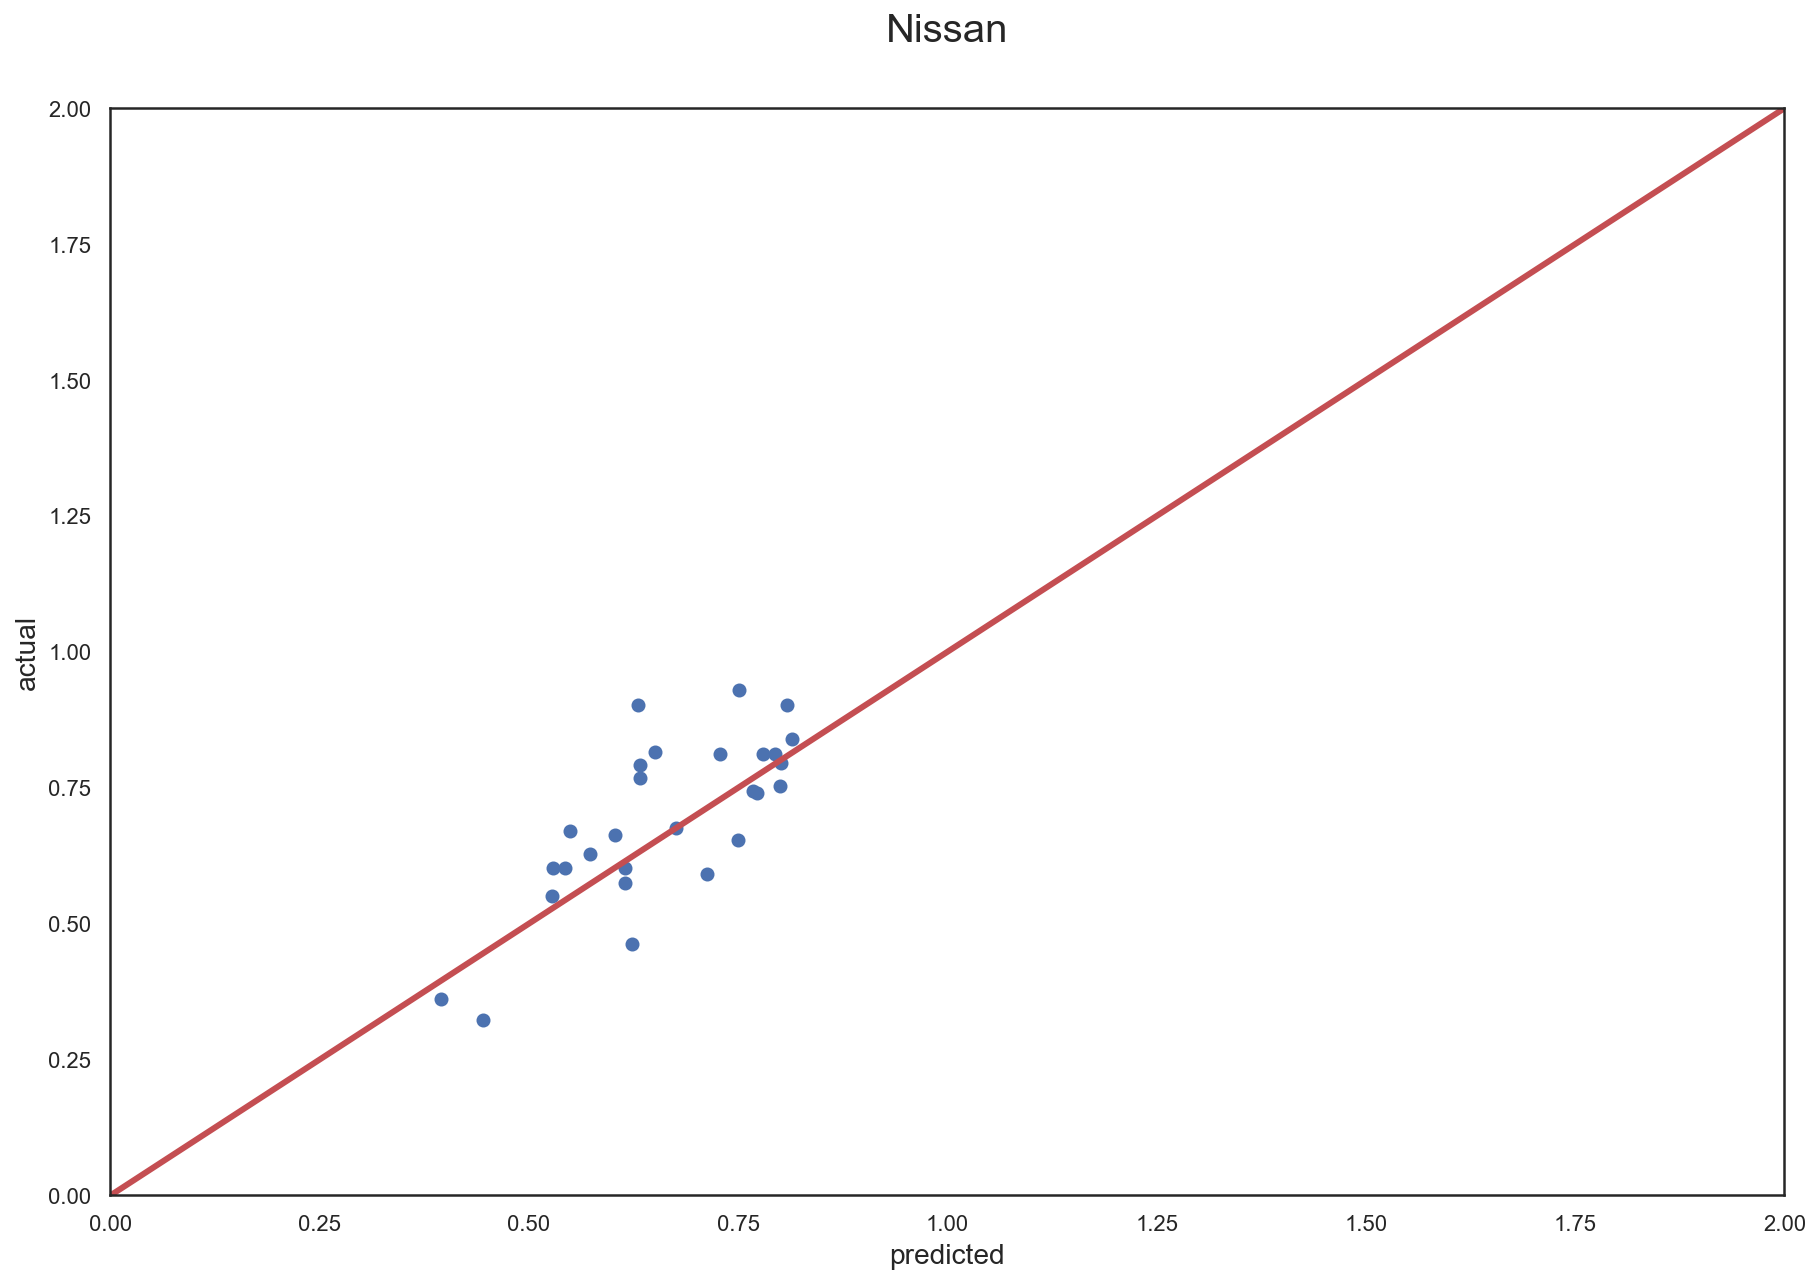

None
Toyota
explained_variance_score: 0.8912545734422945
mean_squared_errors: 0.009839753294917944
r2_score: 0.8909705333402916
None


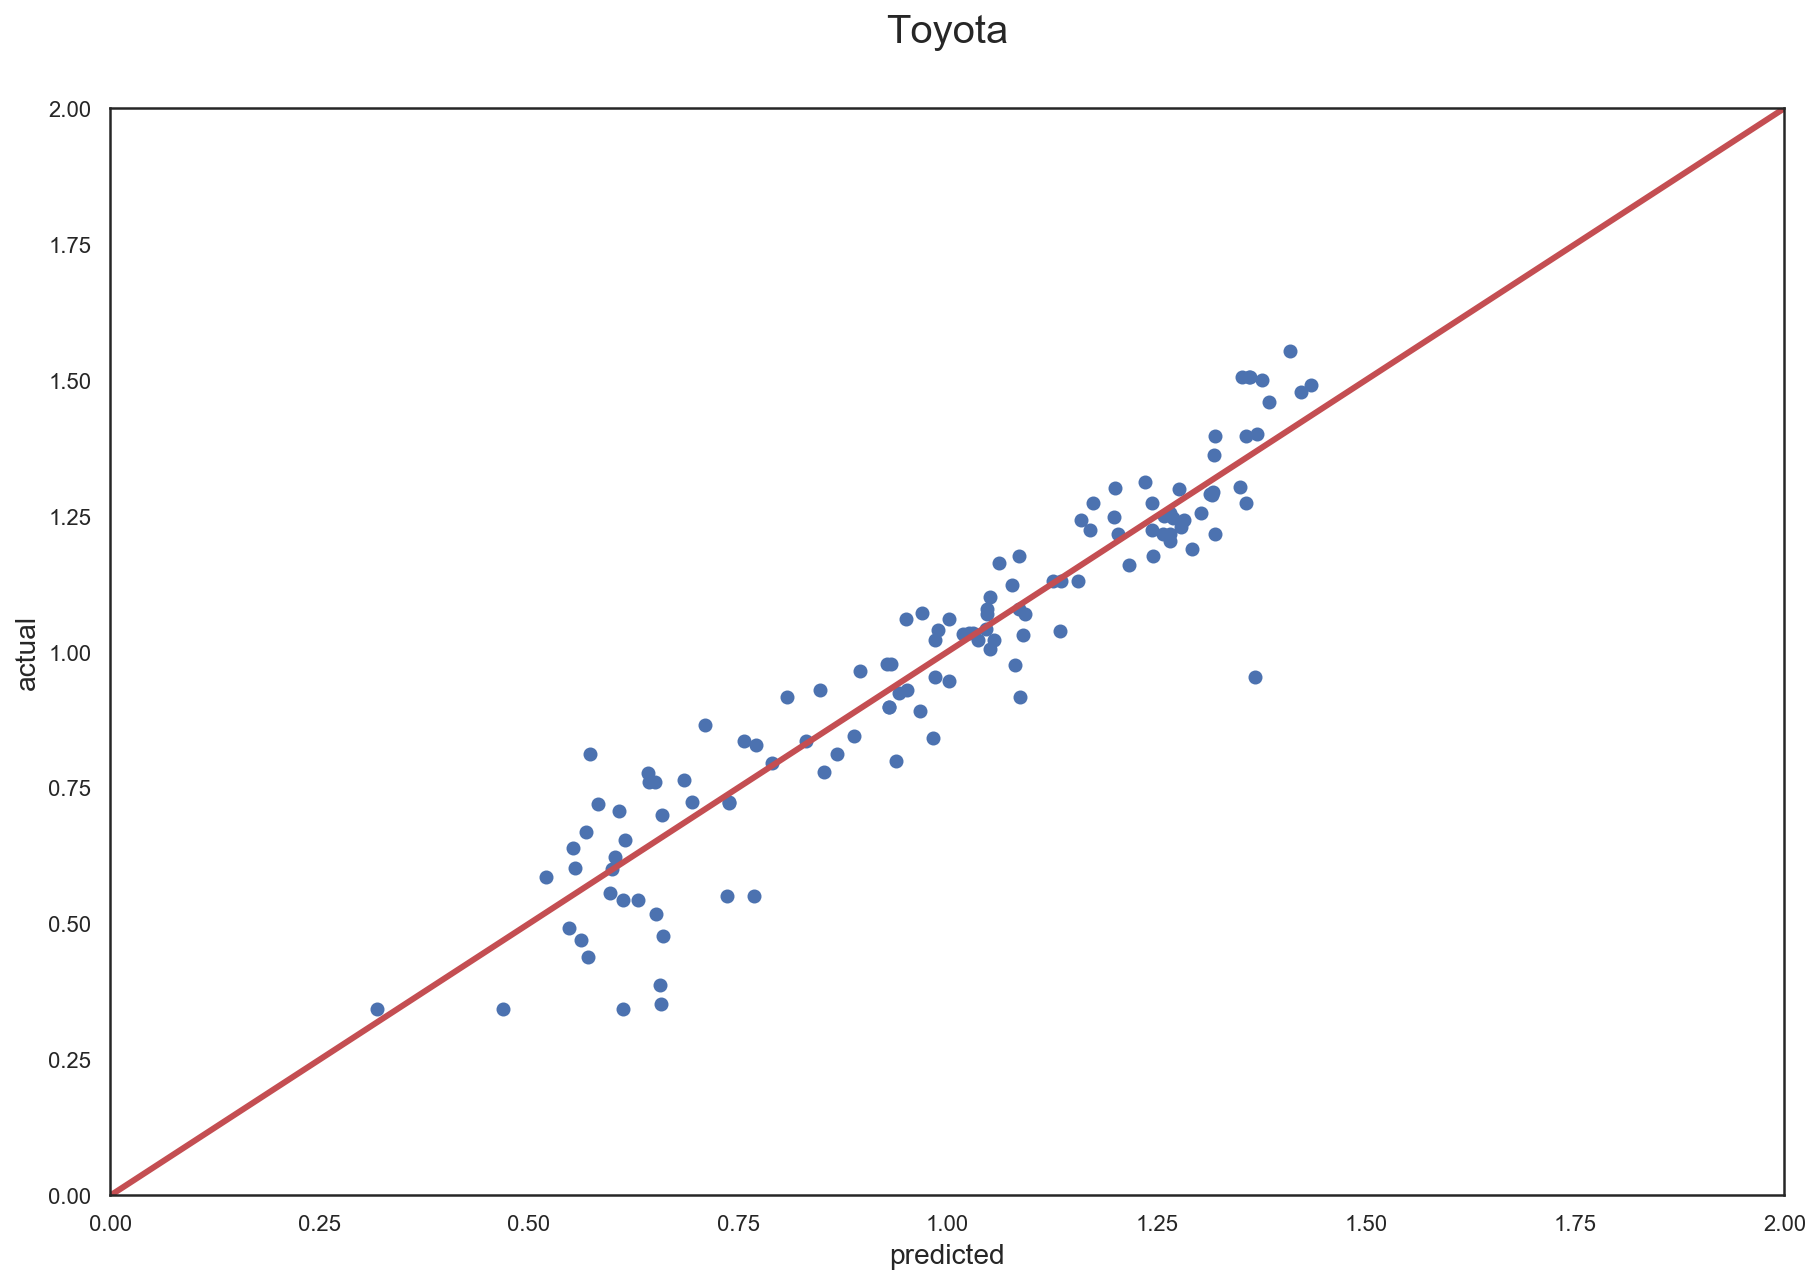

None
Volkswagen
explained_variance_score: 0.7759196691732771
mean_squared_errors: 0.005747050587293197
r2_score: 0.7716995618943053
None


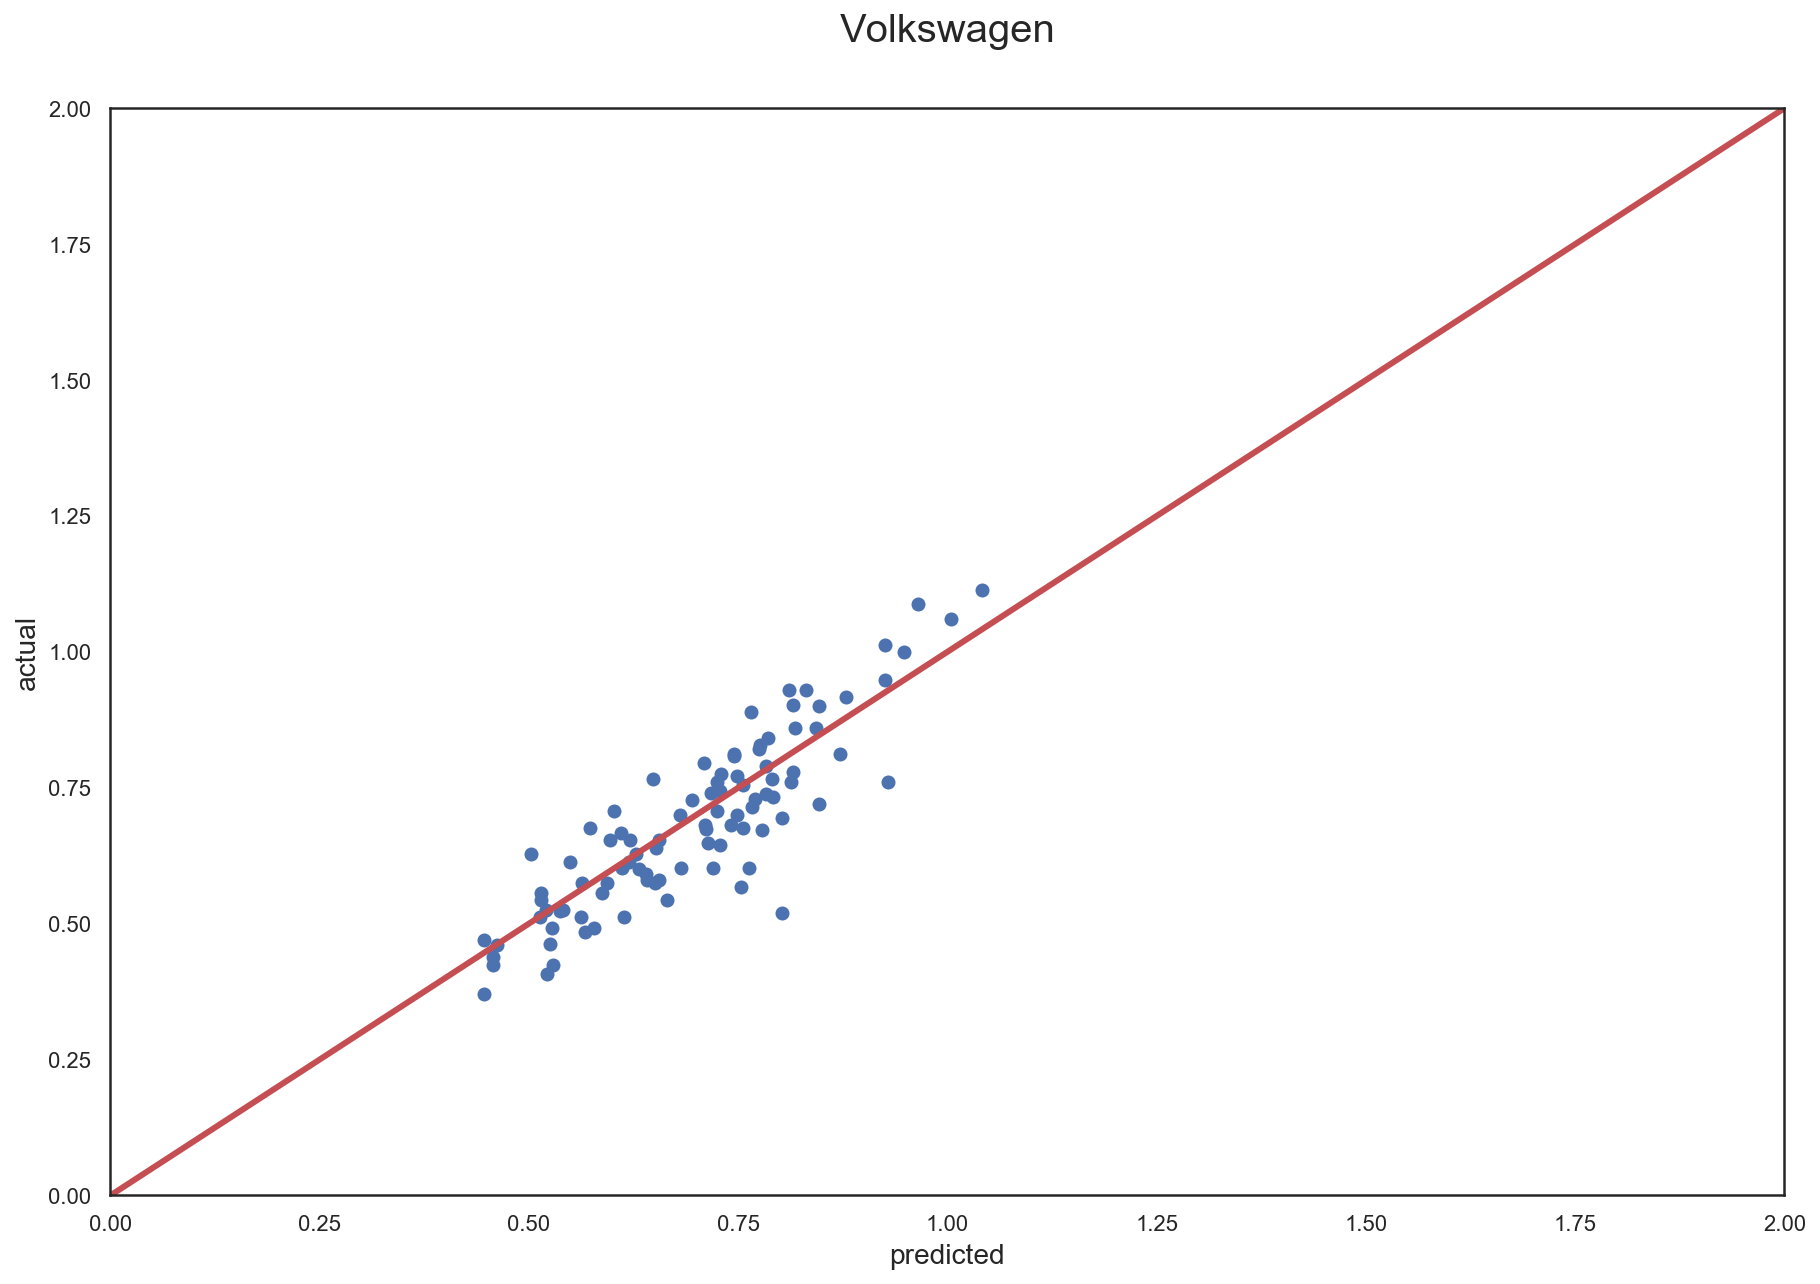

None
Tata
explained_variance_score: 0.7574921855749479
mean_squared_errors: 0.01882667733456542
r2_score: 0.7517609028101581
None


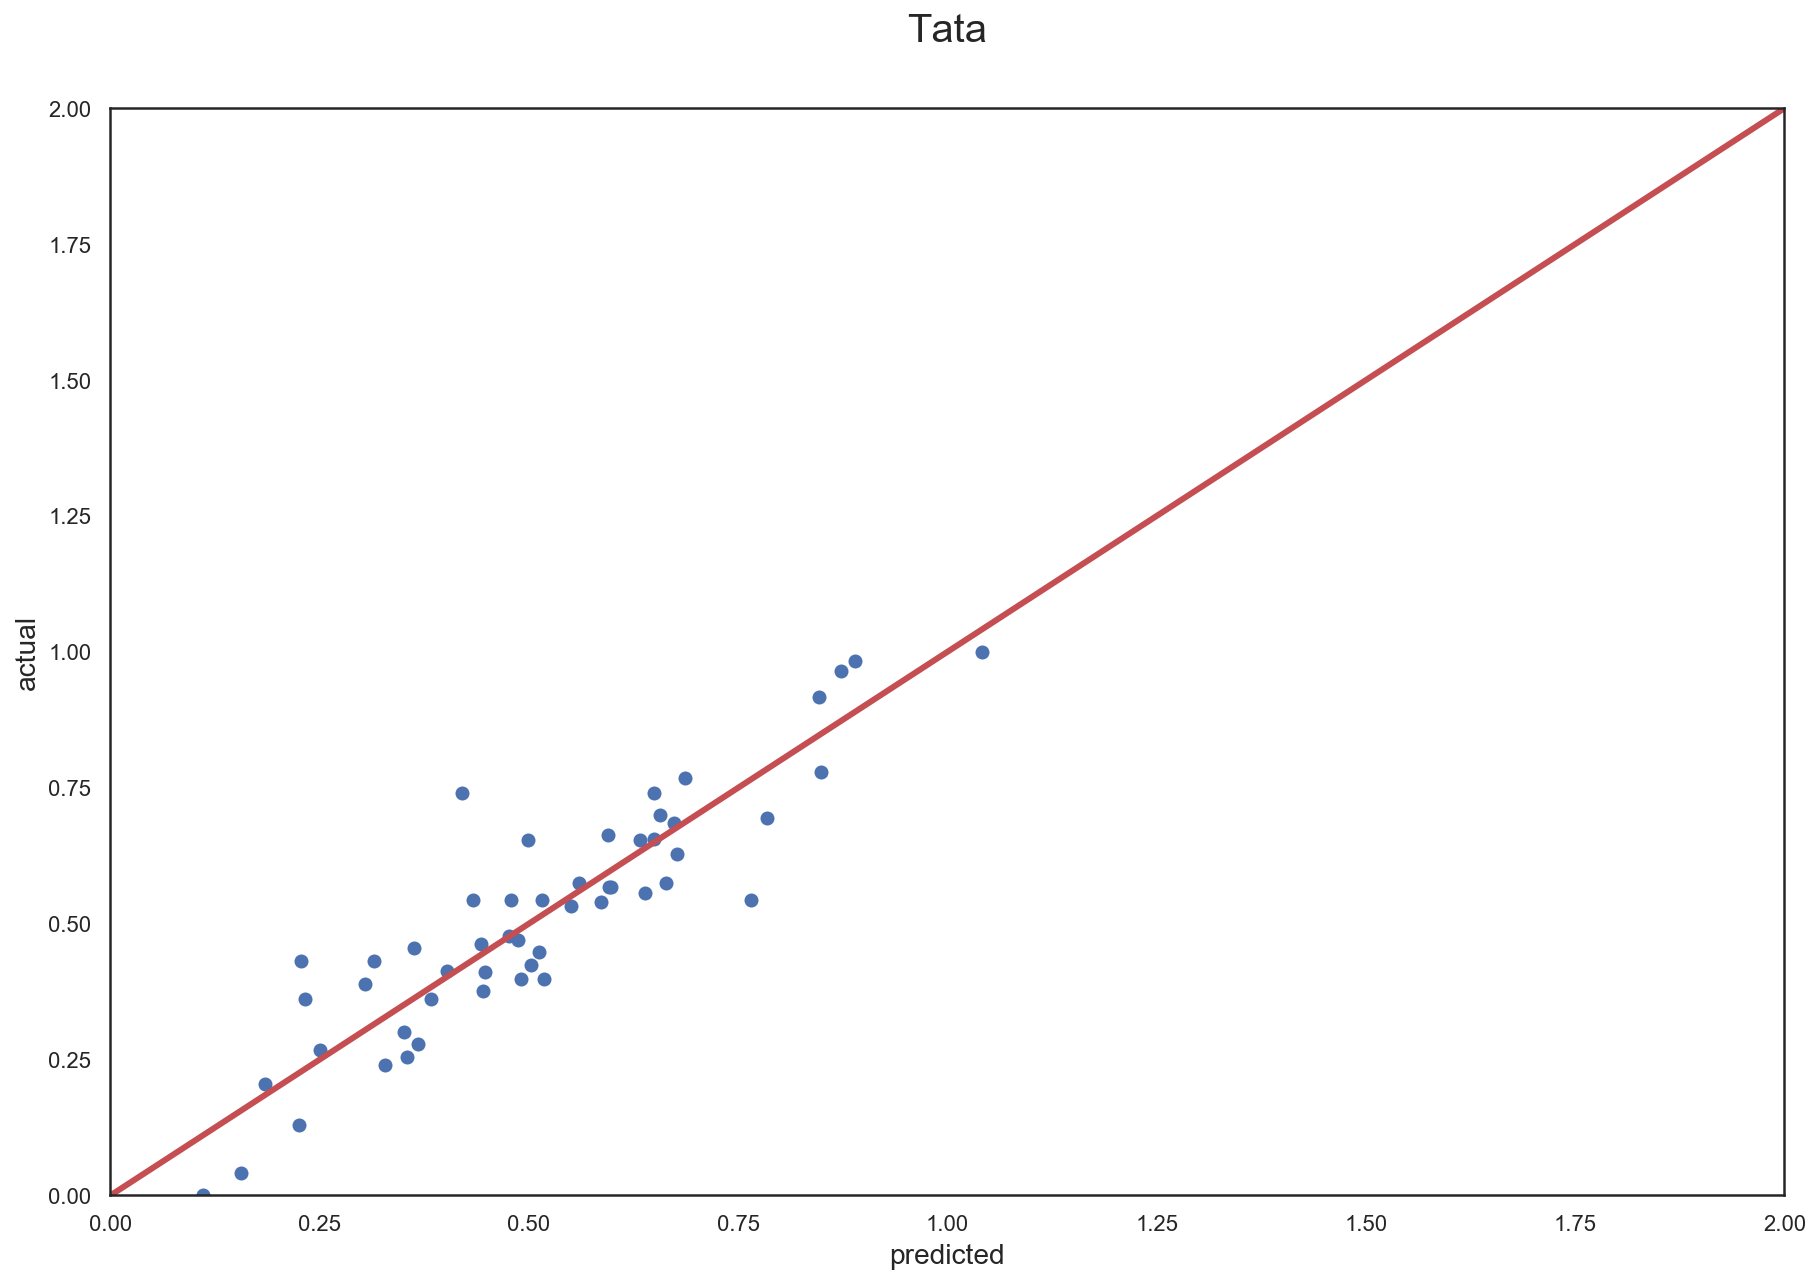

None
Land
explained_variance_score: 0.8214573619395624
mean_squared_errors: 0.010536413802134562
r2_score: 0.7713494461494759
None


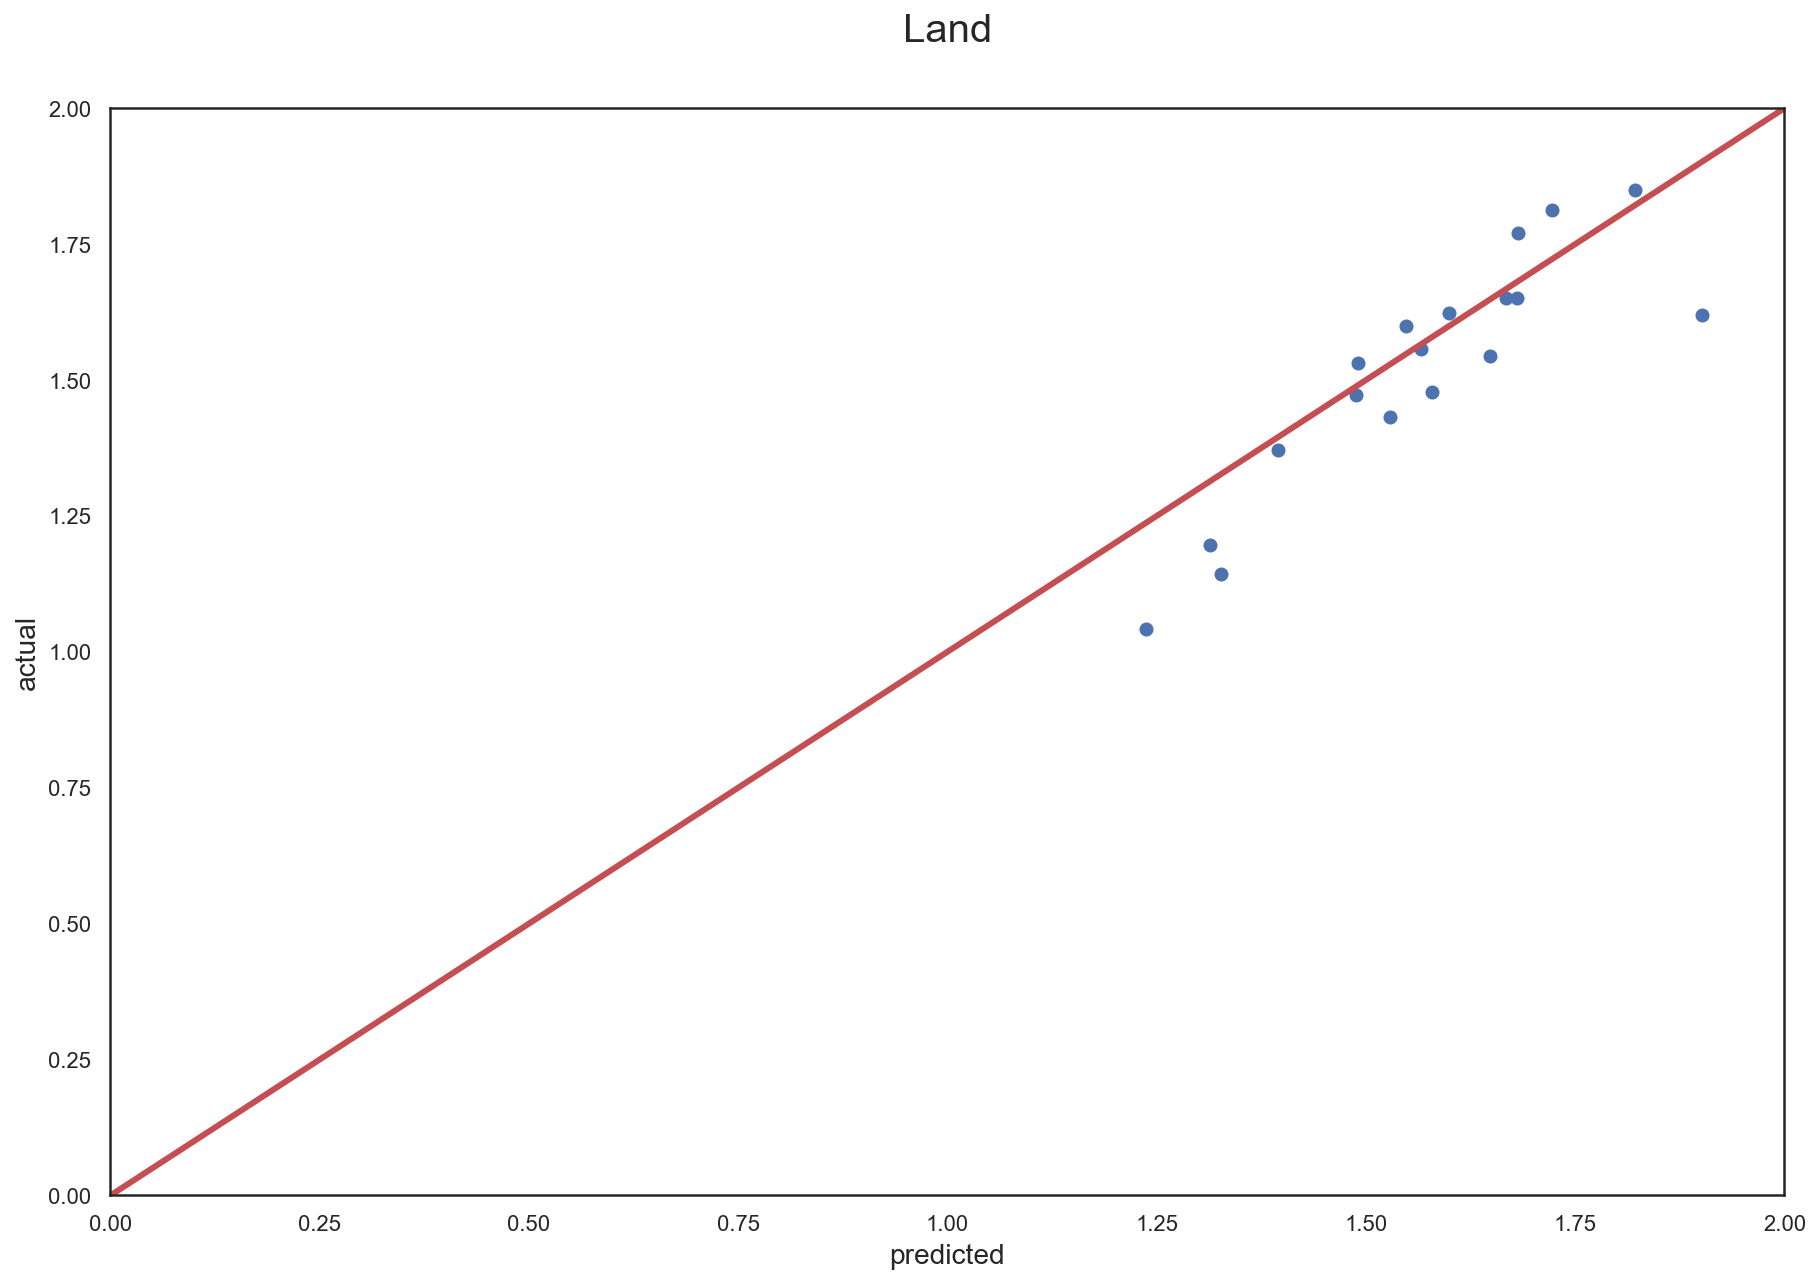

None
Mitsubishi
explained_variance_score: 0.7762425523029275
mean_squared_errors: 0.03418783412192633
r2_score: 0.7753024059761651
None


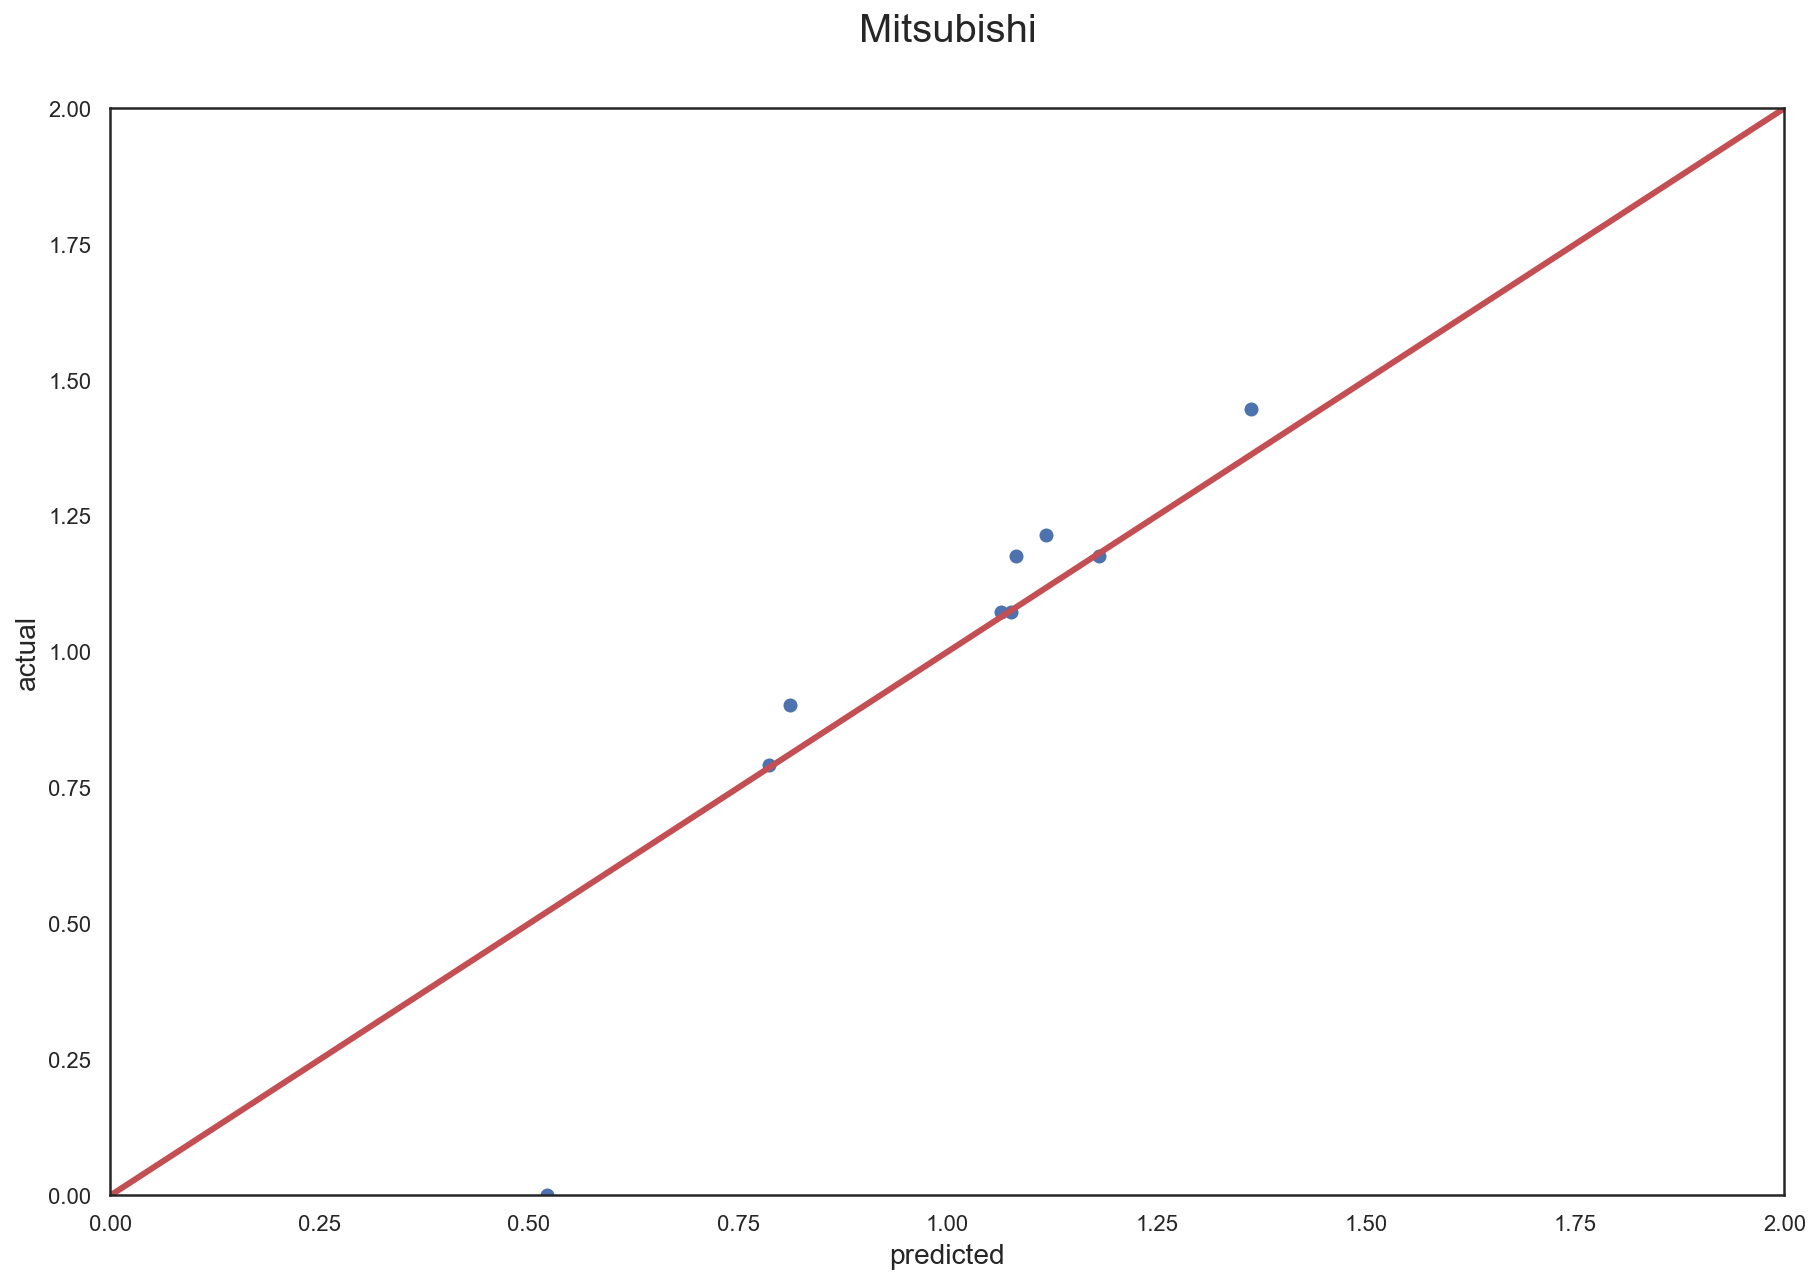

None
Renault
explained_variance_score: 0.8252059121259511
mean_squared_errors: 0.006220697665993732
r2_score: 0.812420444191129
None


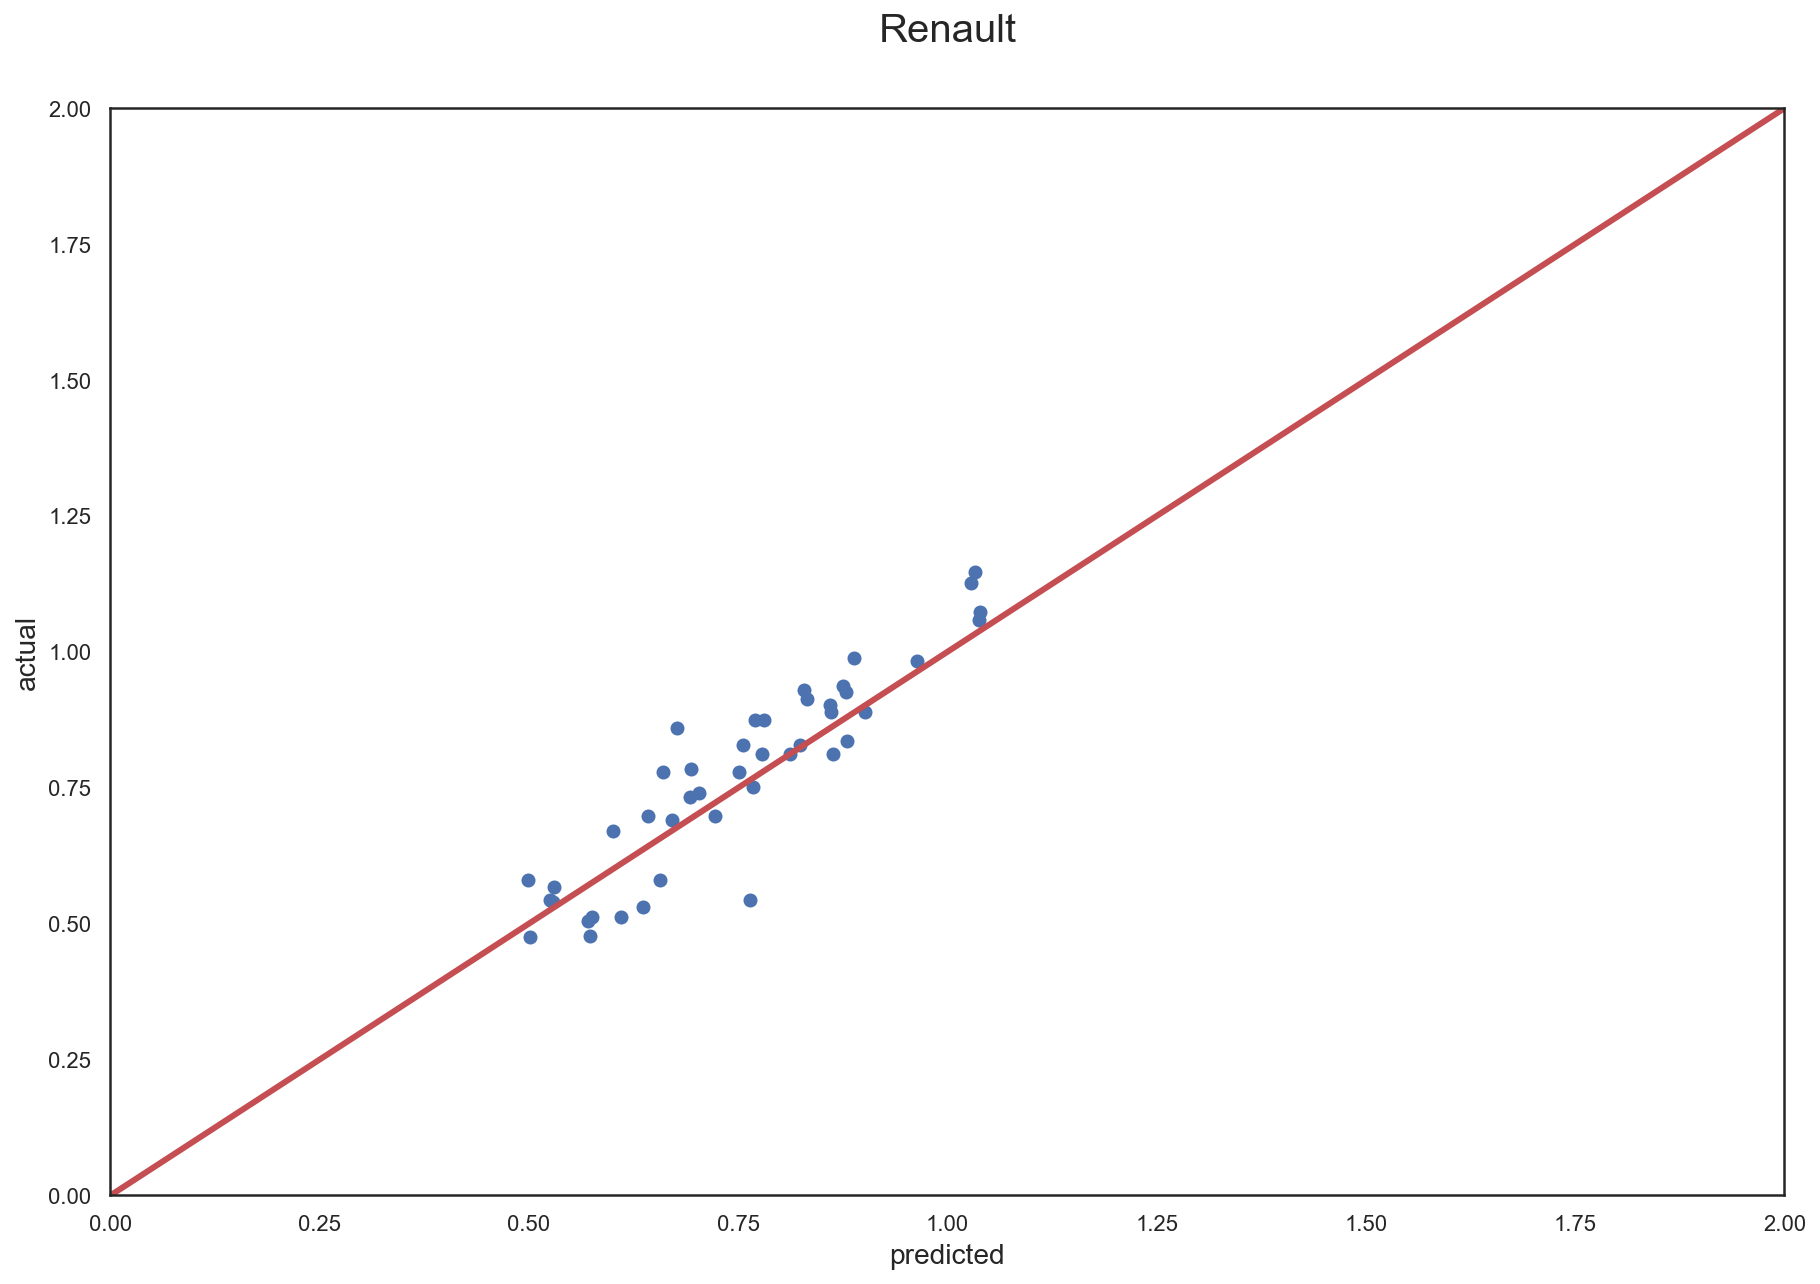

None
Mercedes-Benz
explained_variance_score: 0.8221614538045504
mean_squared_errors: 0.011914171311799766
r2_score: 0.8183532729396037
None


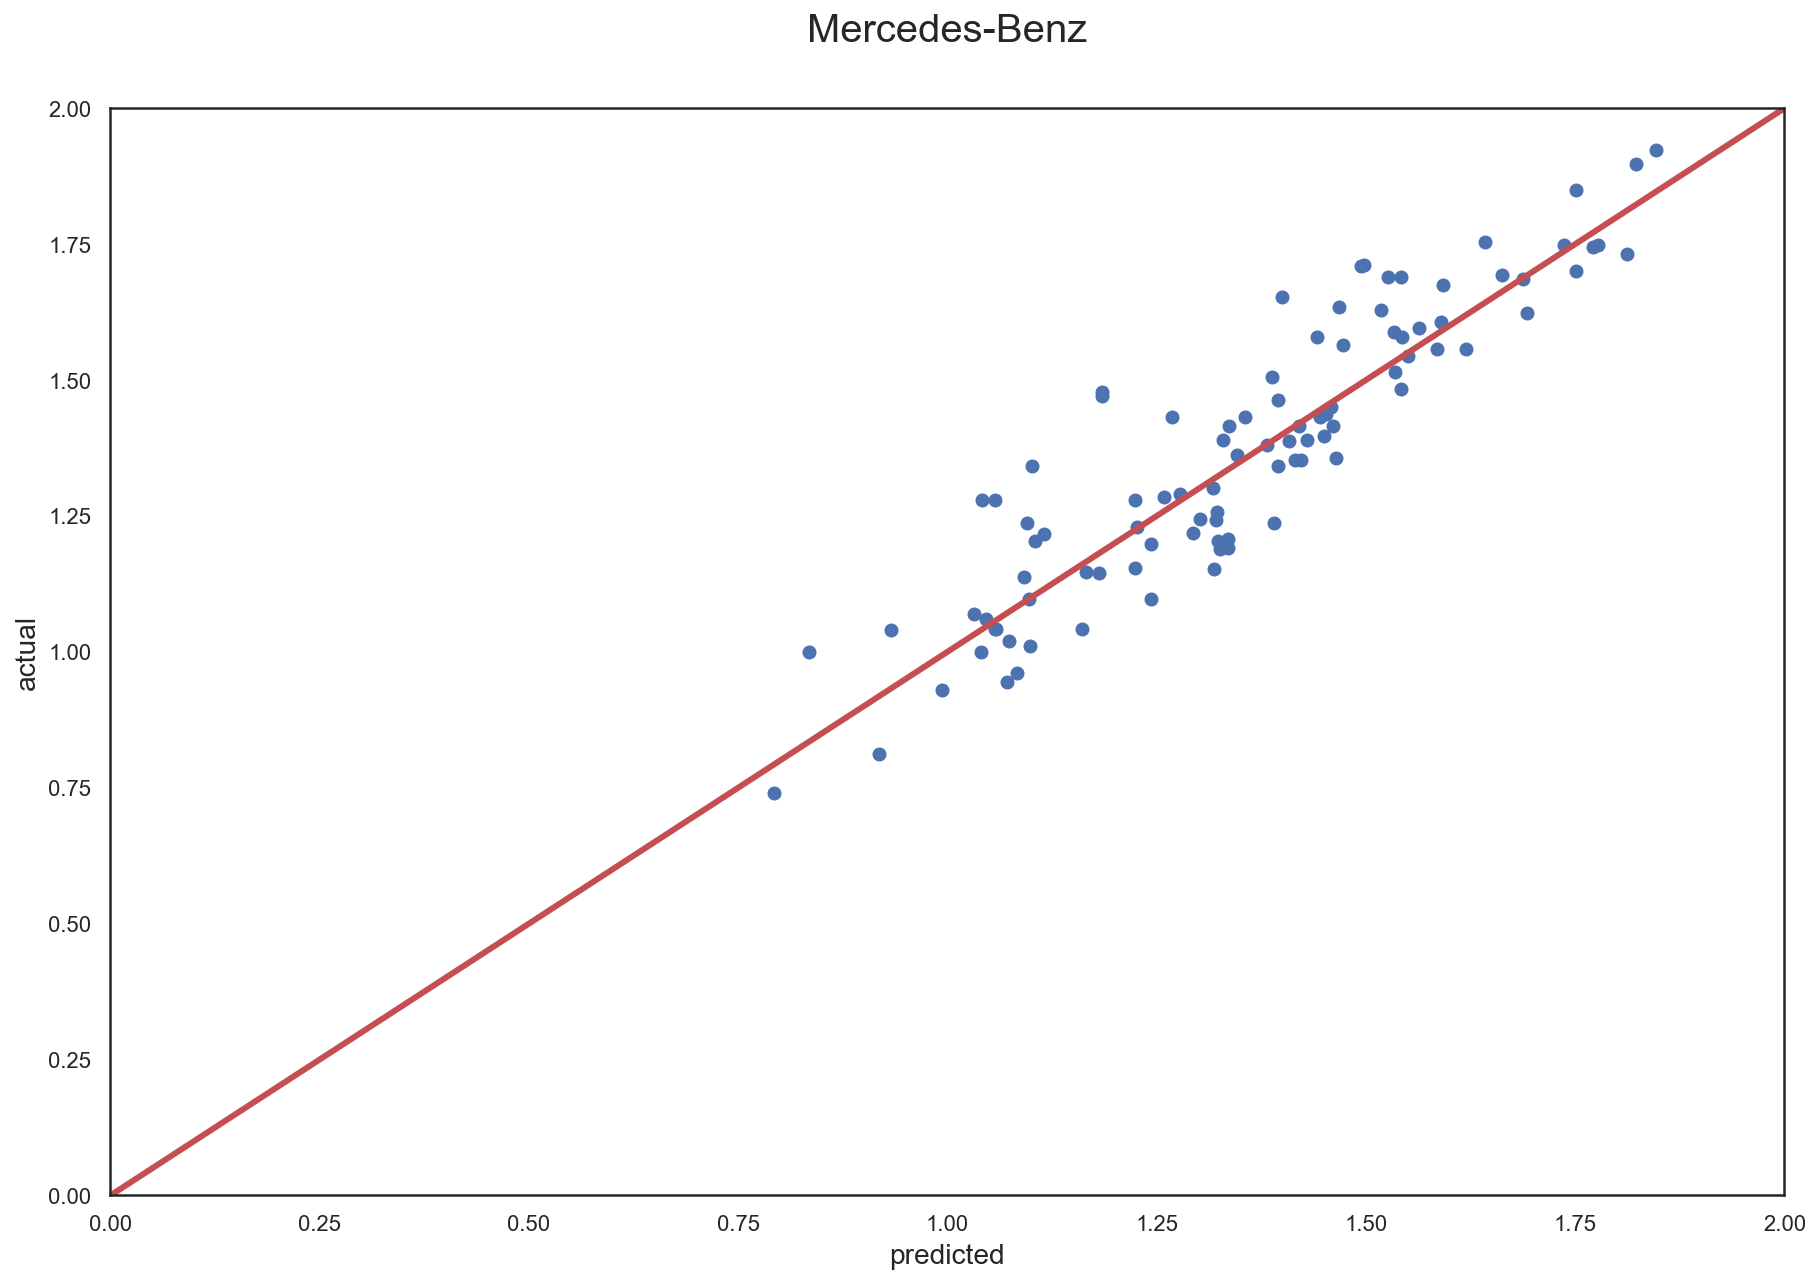

None
BMW
explained_variance_score: 0.761026823223561
mean_squared_errors: 0.01393447713253773
r2_score: 0.7602638538771349
None


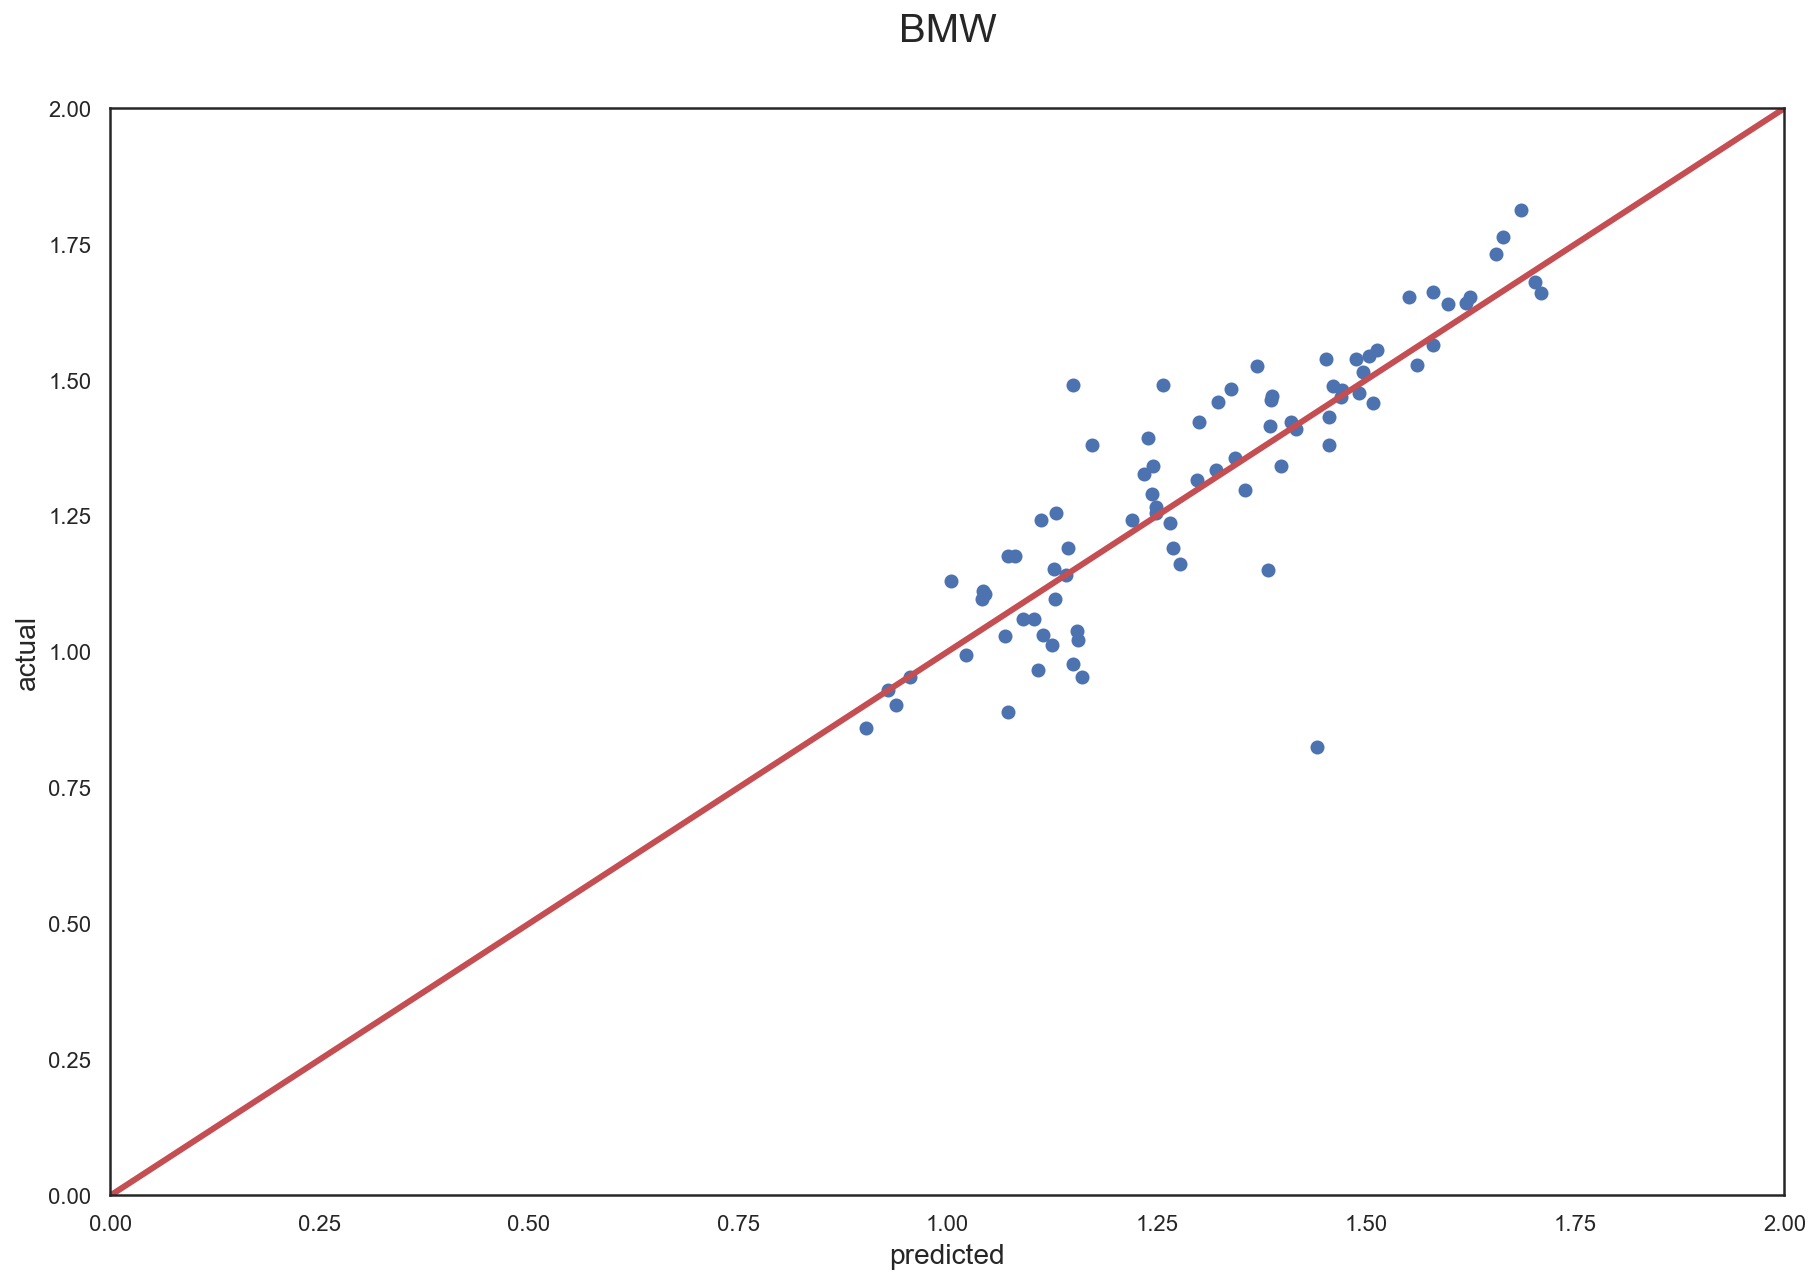

None
Mahindra
explained_variance_score: 0.8827922454327042
mean_squared_errors: 0.005140510955675681
r2_score: 0.8826589941749626
None


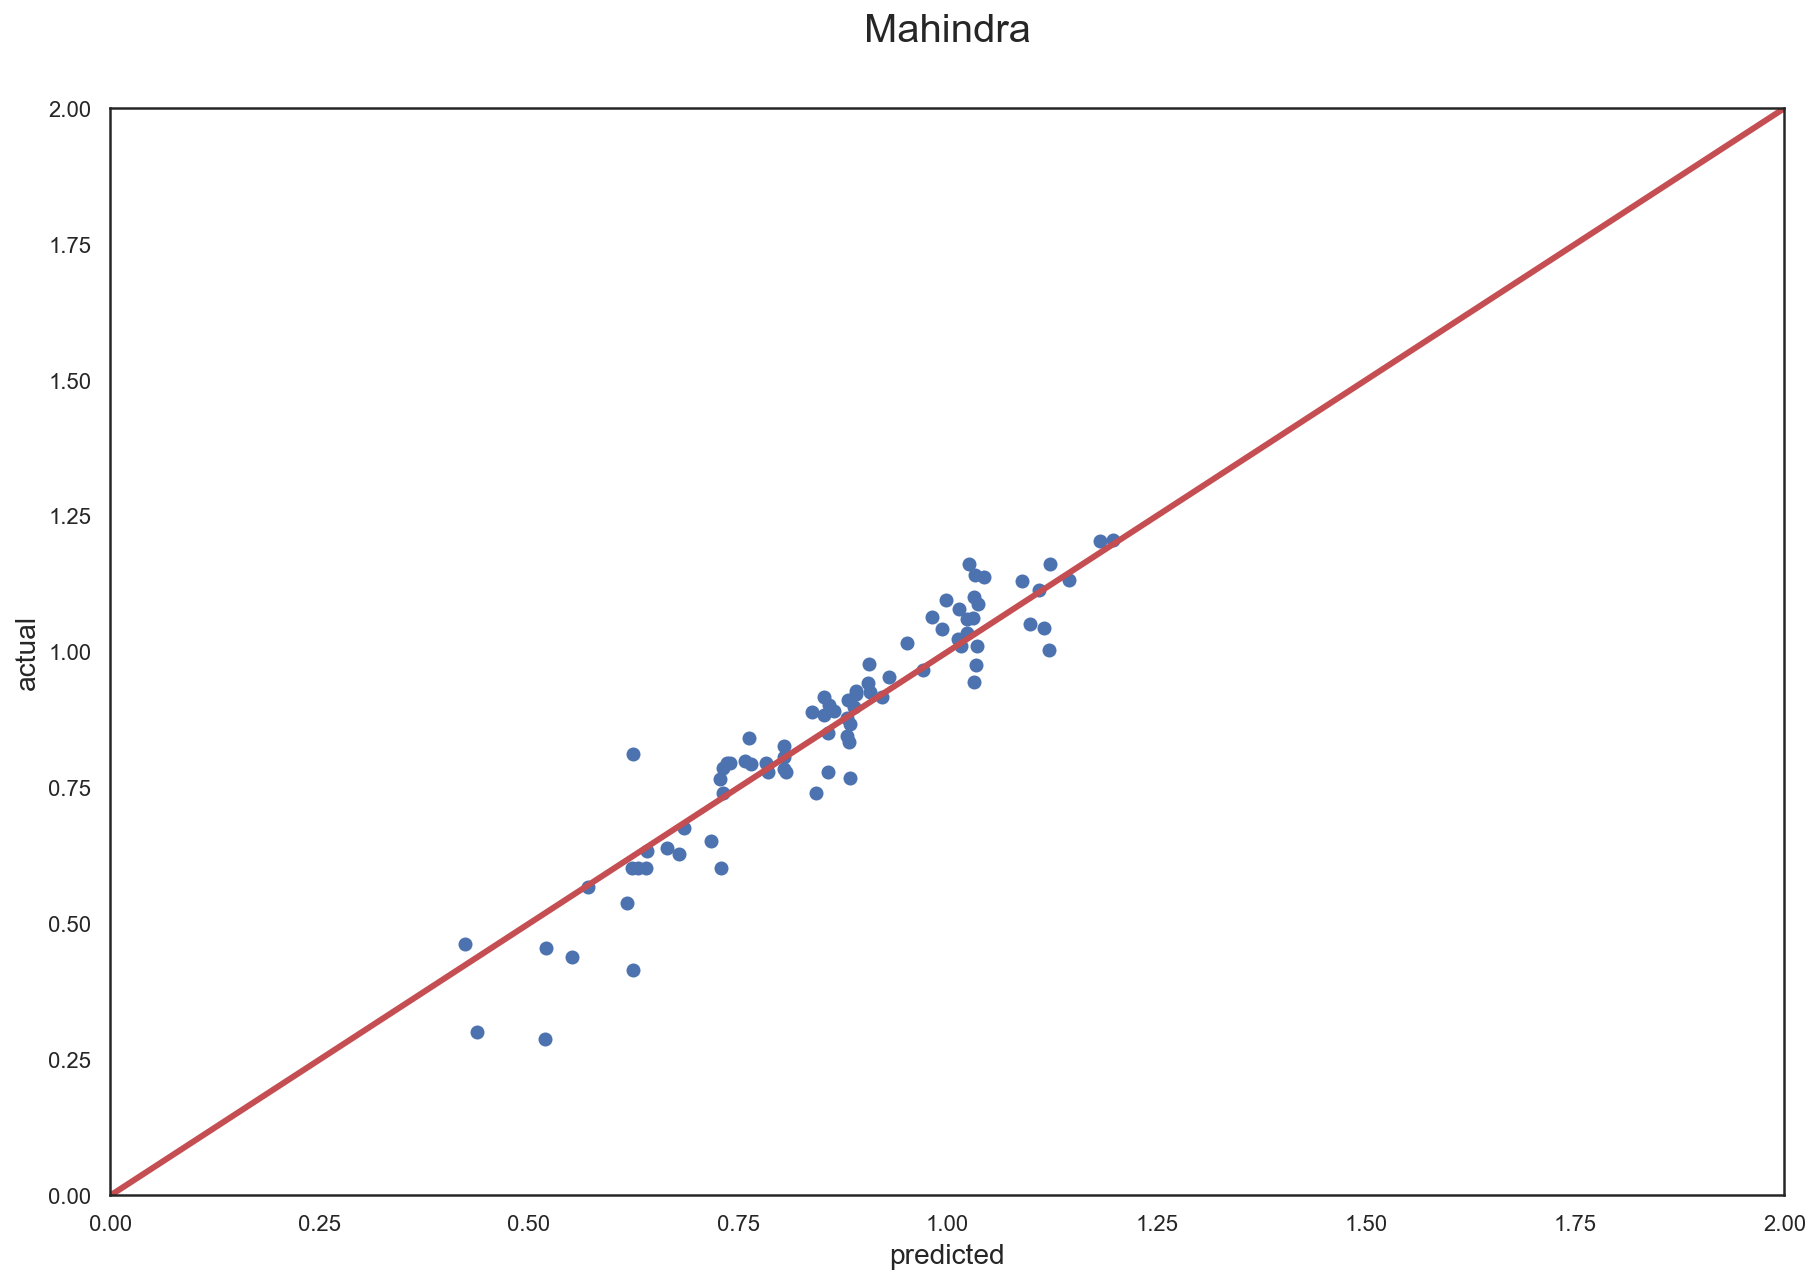

None
Ford
explained_variance_score: 0.9004944434397768
mean_squared_errors: 0.013953450188195287
r2_score: 0.9002953859543511
None


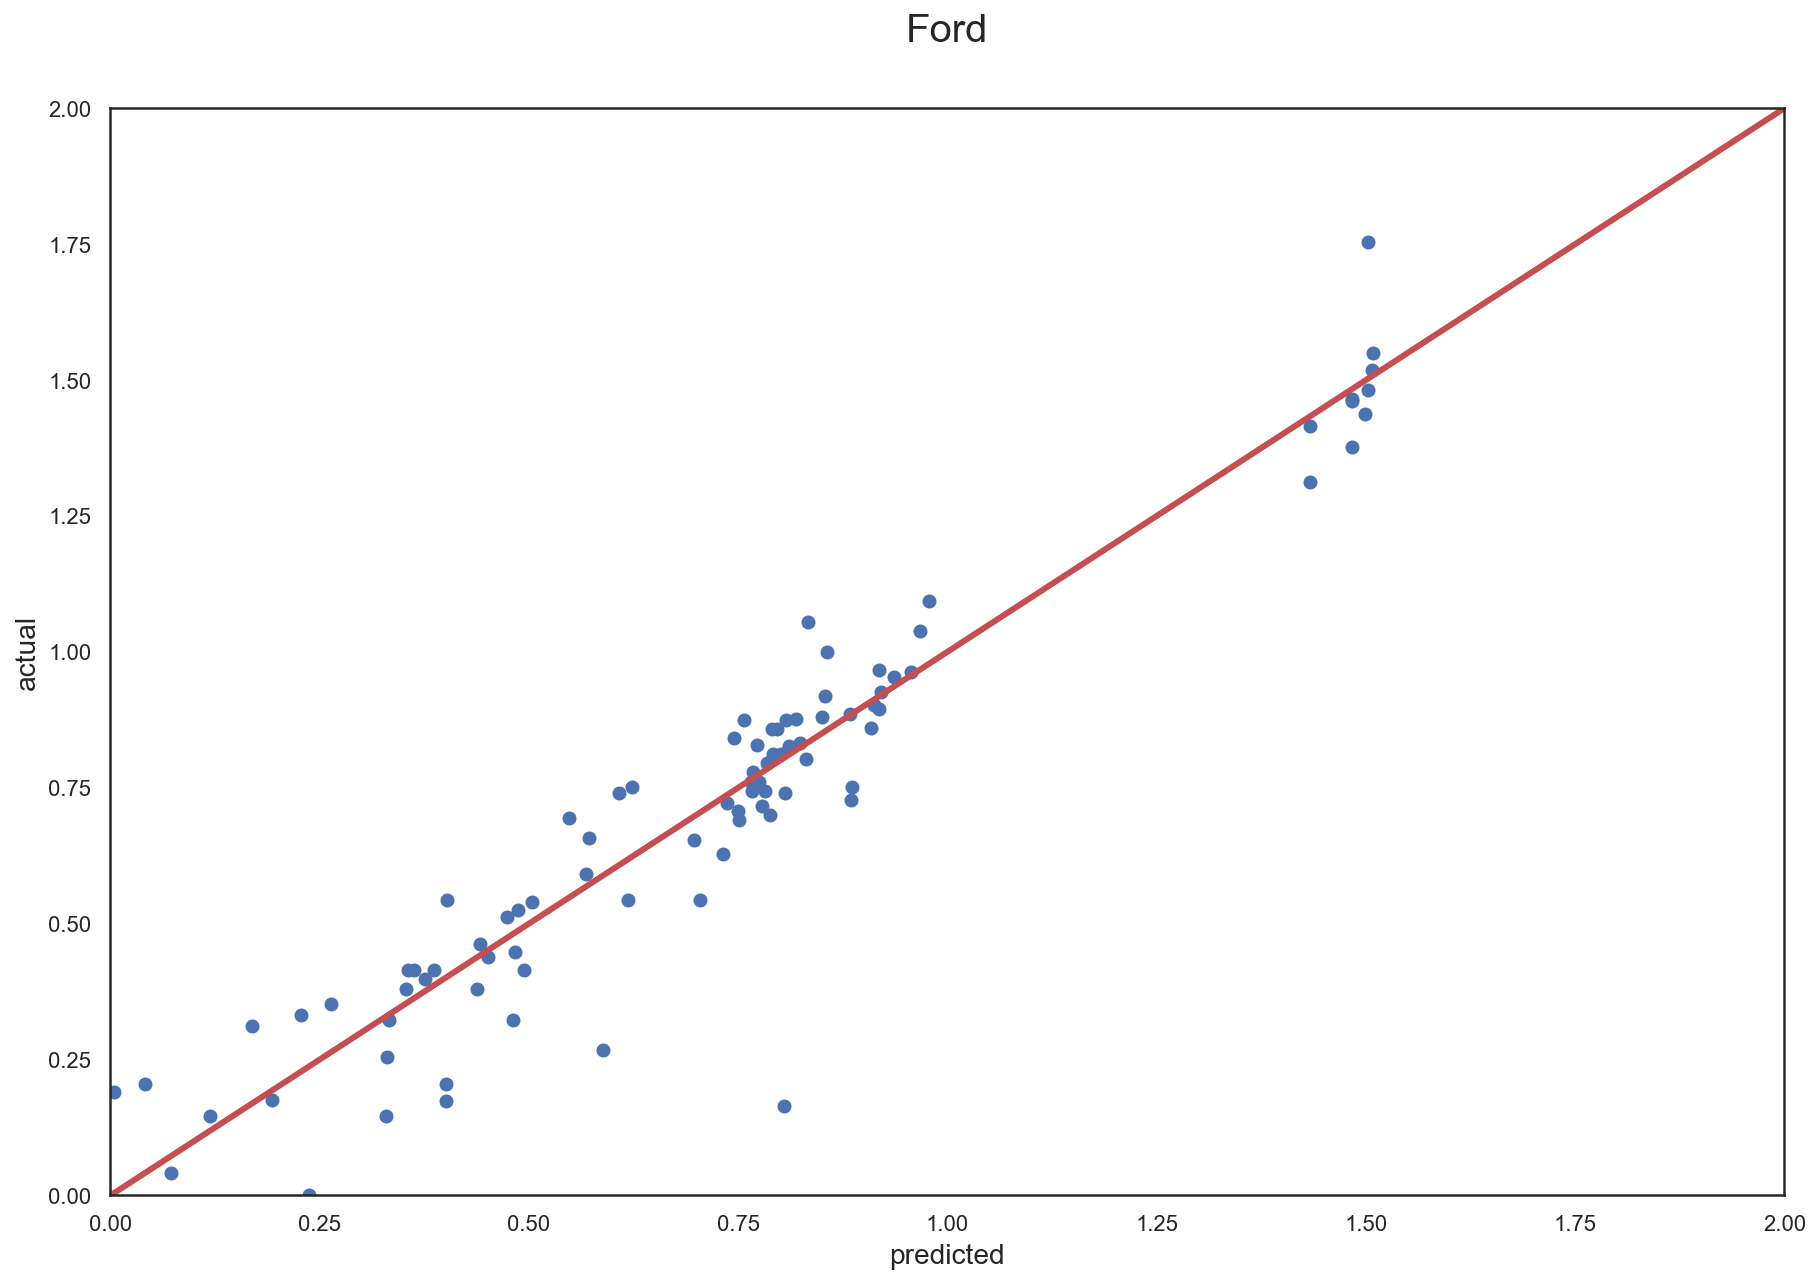

None
Porsche
explained_variance_score: 0.3123178026673453
mean_squared_errors: 0.022494148541409967
r2_score: -1.993434833727835
None


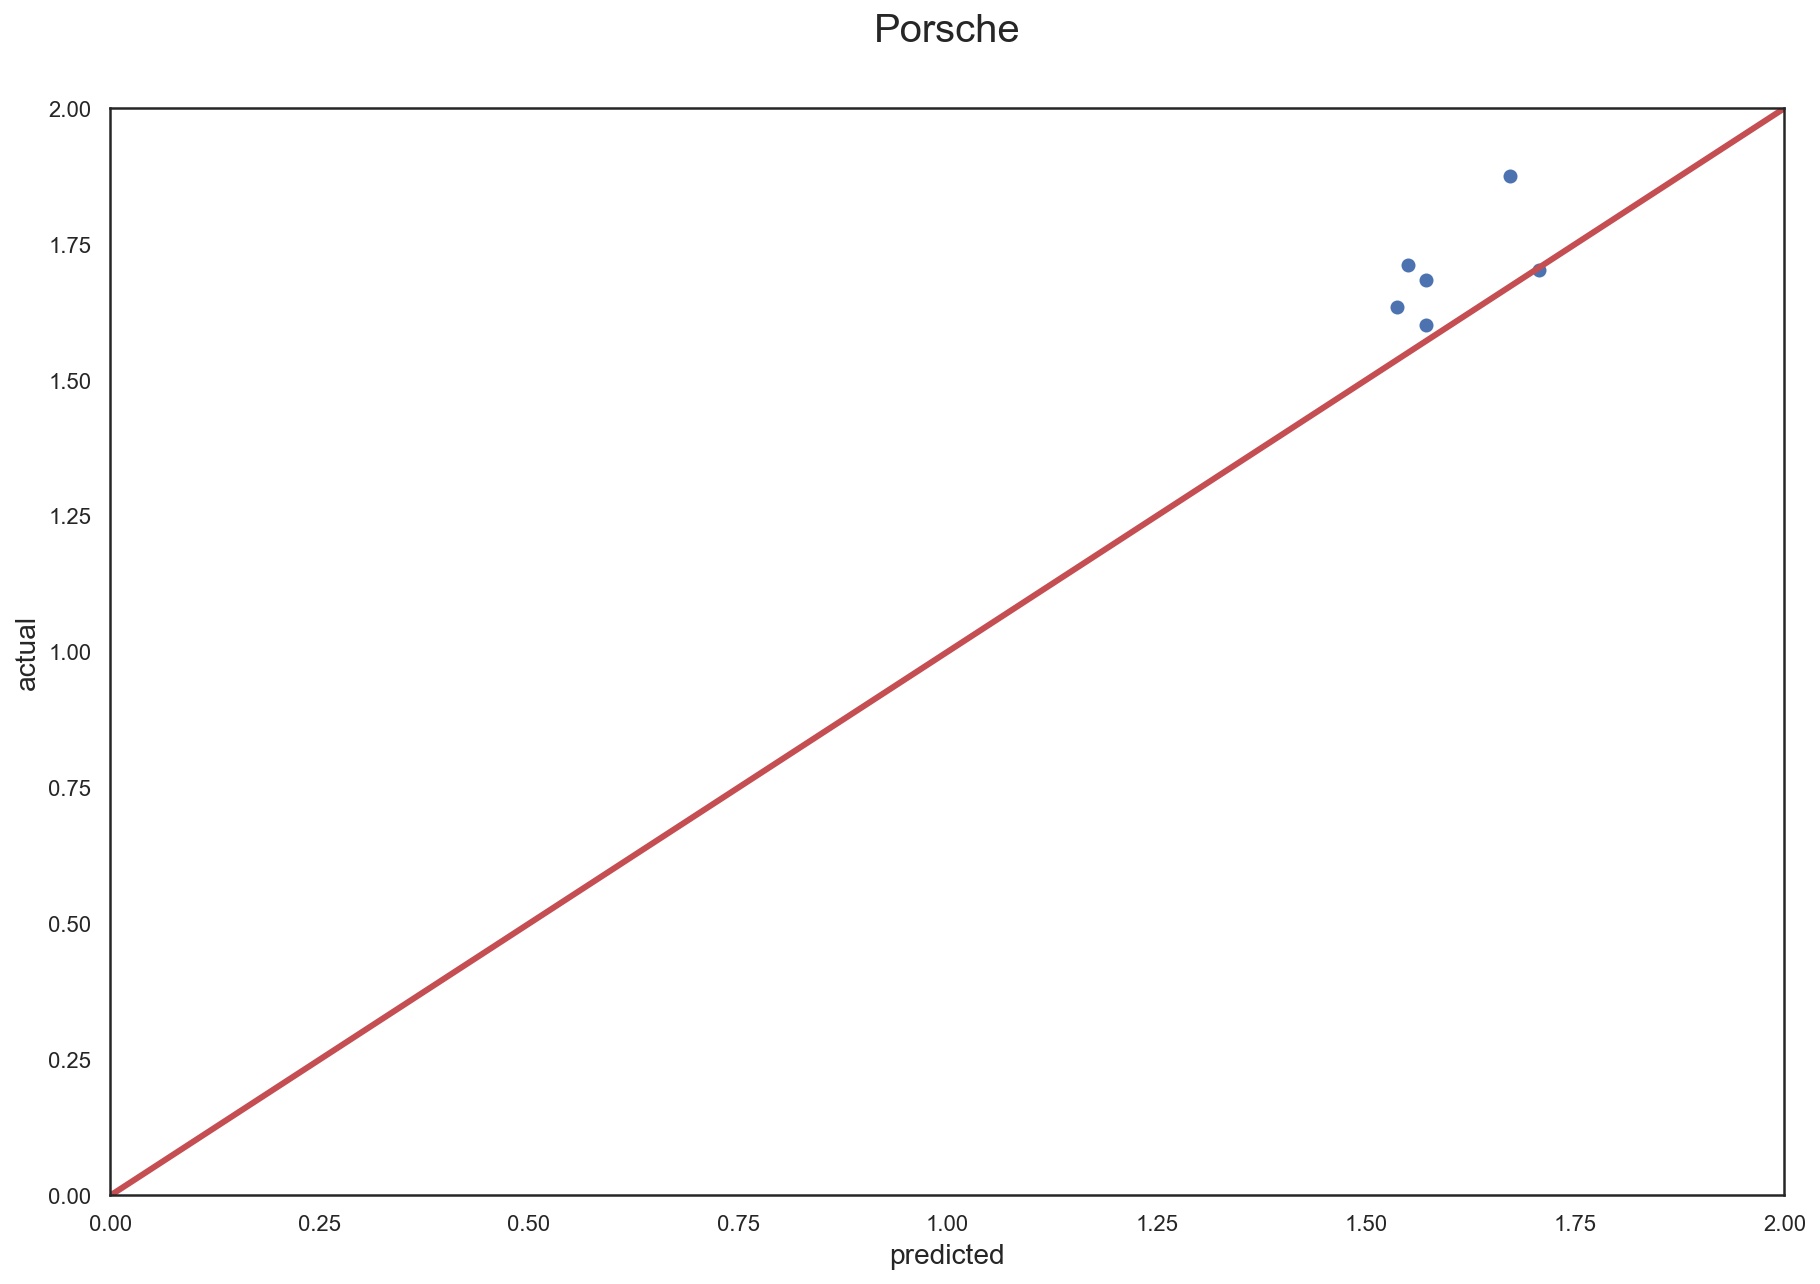

None
Datsun
explained_variance_score: 0.6859211198615736
mean_squared_errors: 0.004548876223941334
r2_score: -1.1506398117624665
None


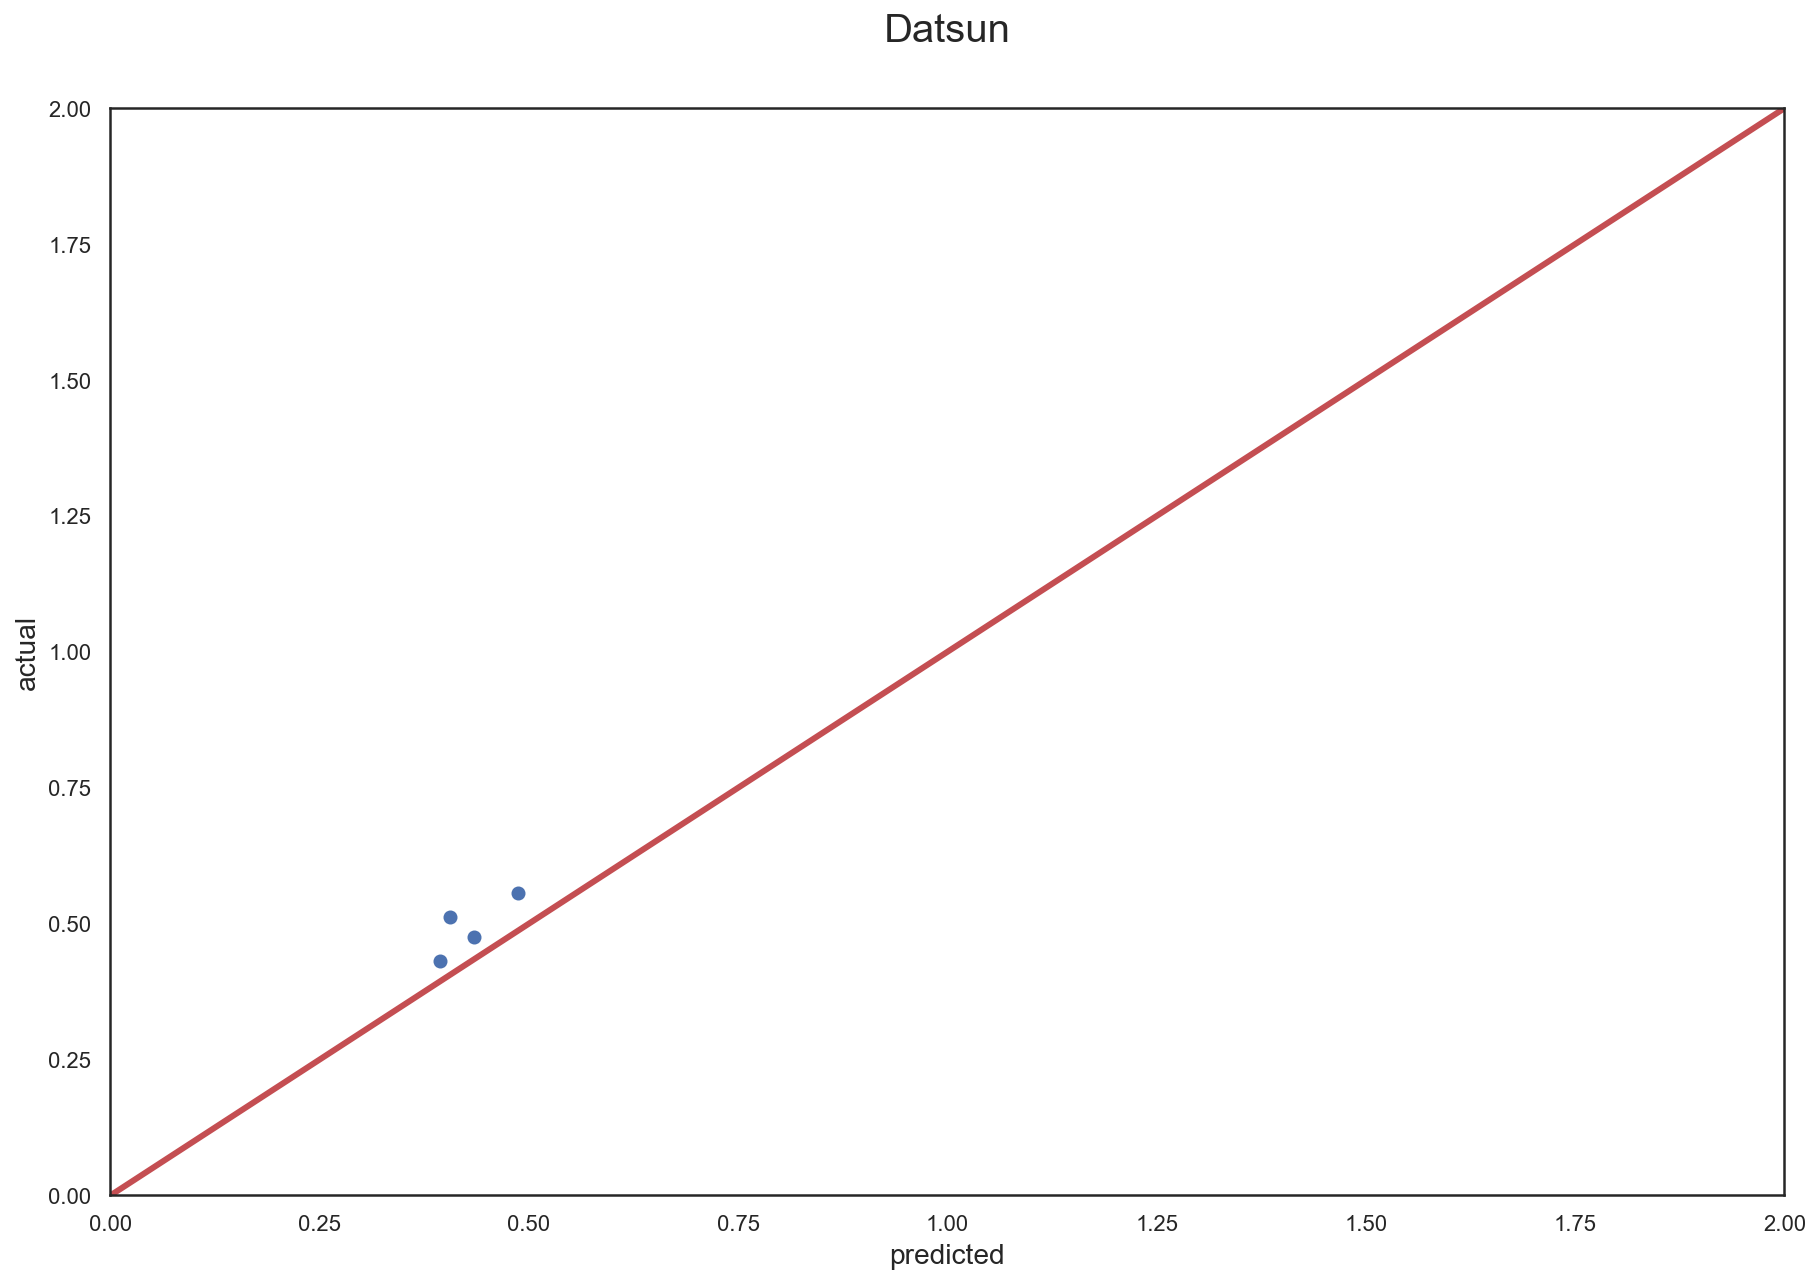

None
Jaguar
explained_variance_score: 0.7054308398783617
mean_squared_errors: 0.004774069726315858
r2_score: 0.5921662308308511
None


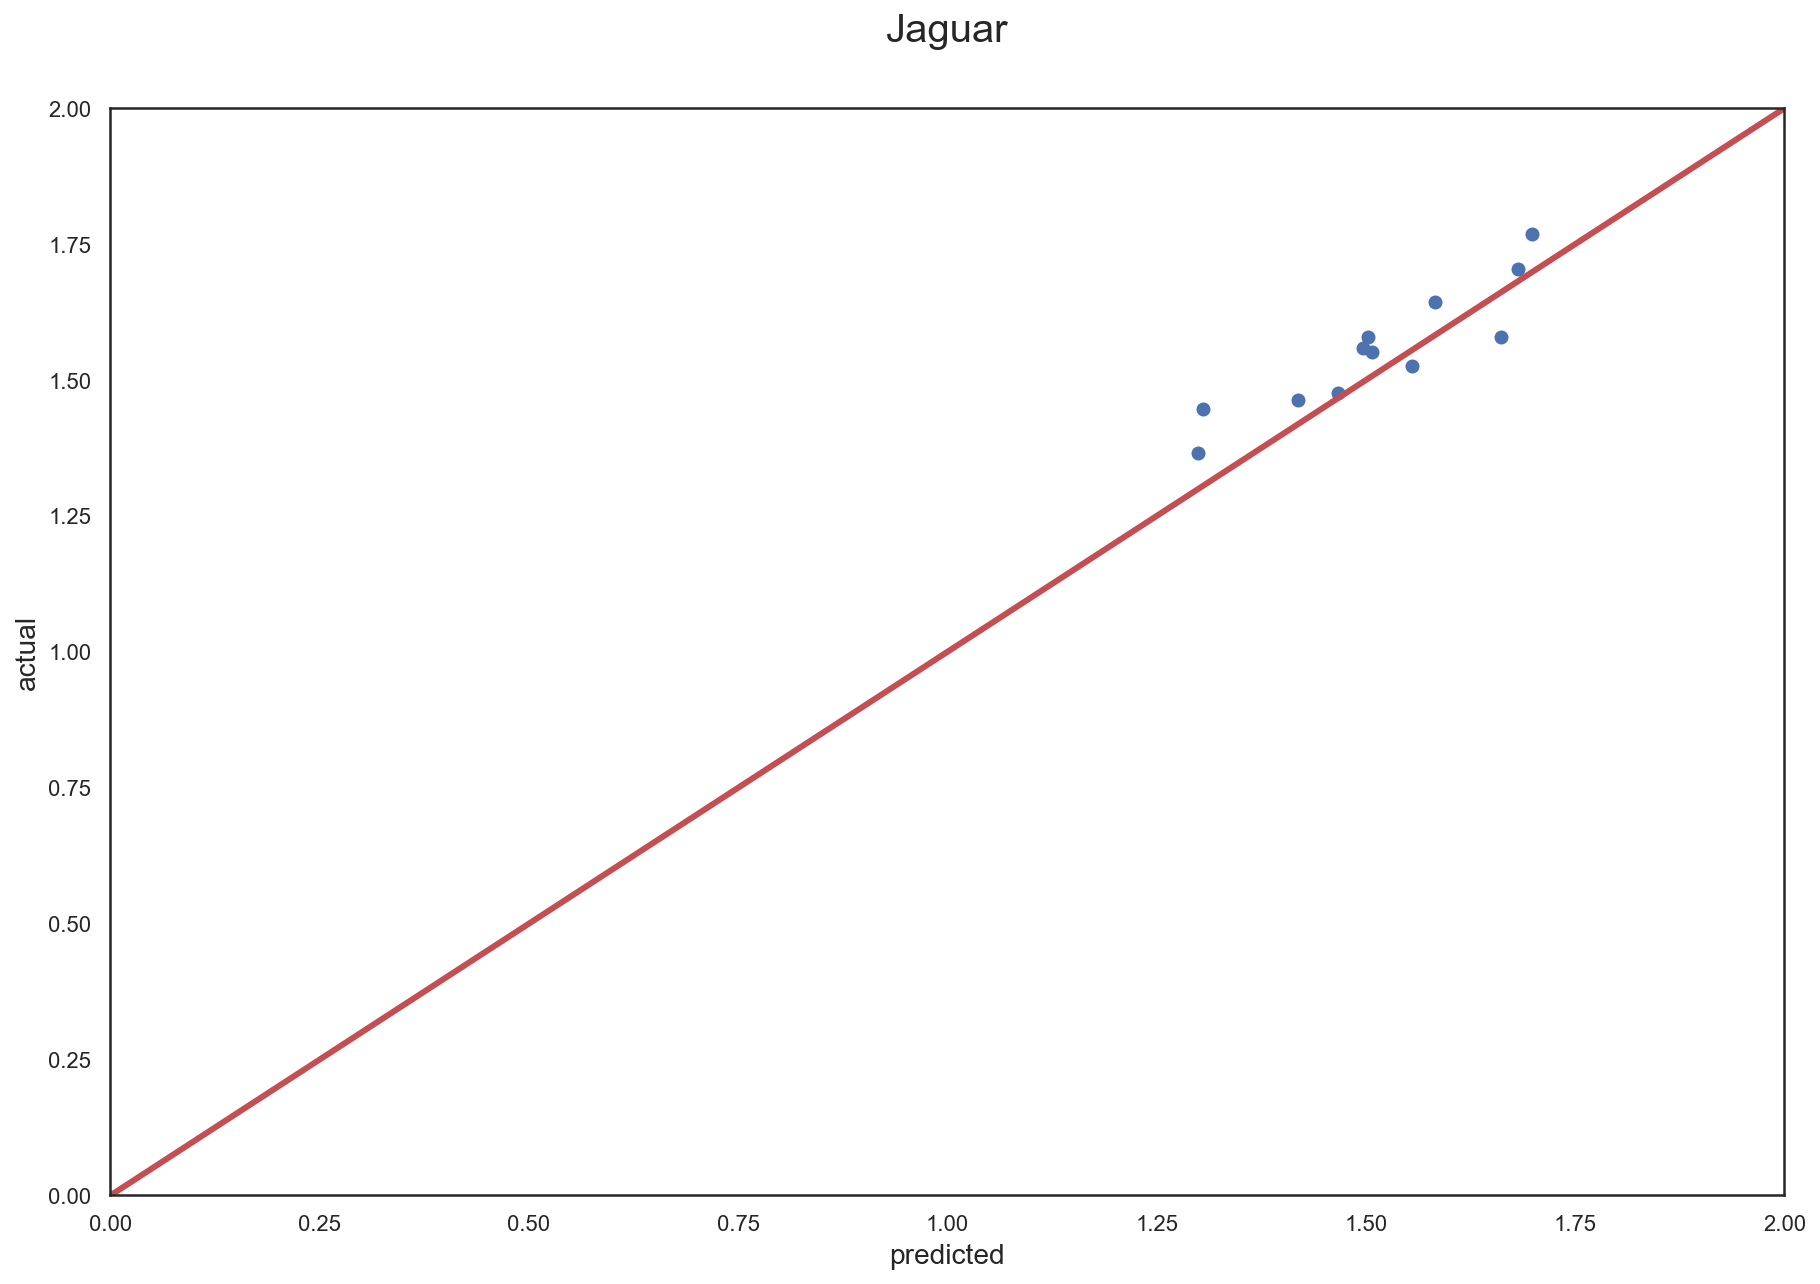

None
Volvo
explained_variance_score: 0.5008913698421522
mean_squared_errors: 0.015561691048044082
r2_score: 0.4871287763322305
None


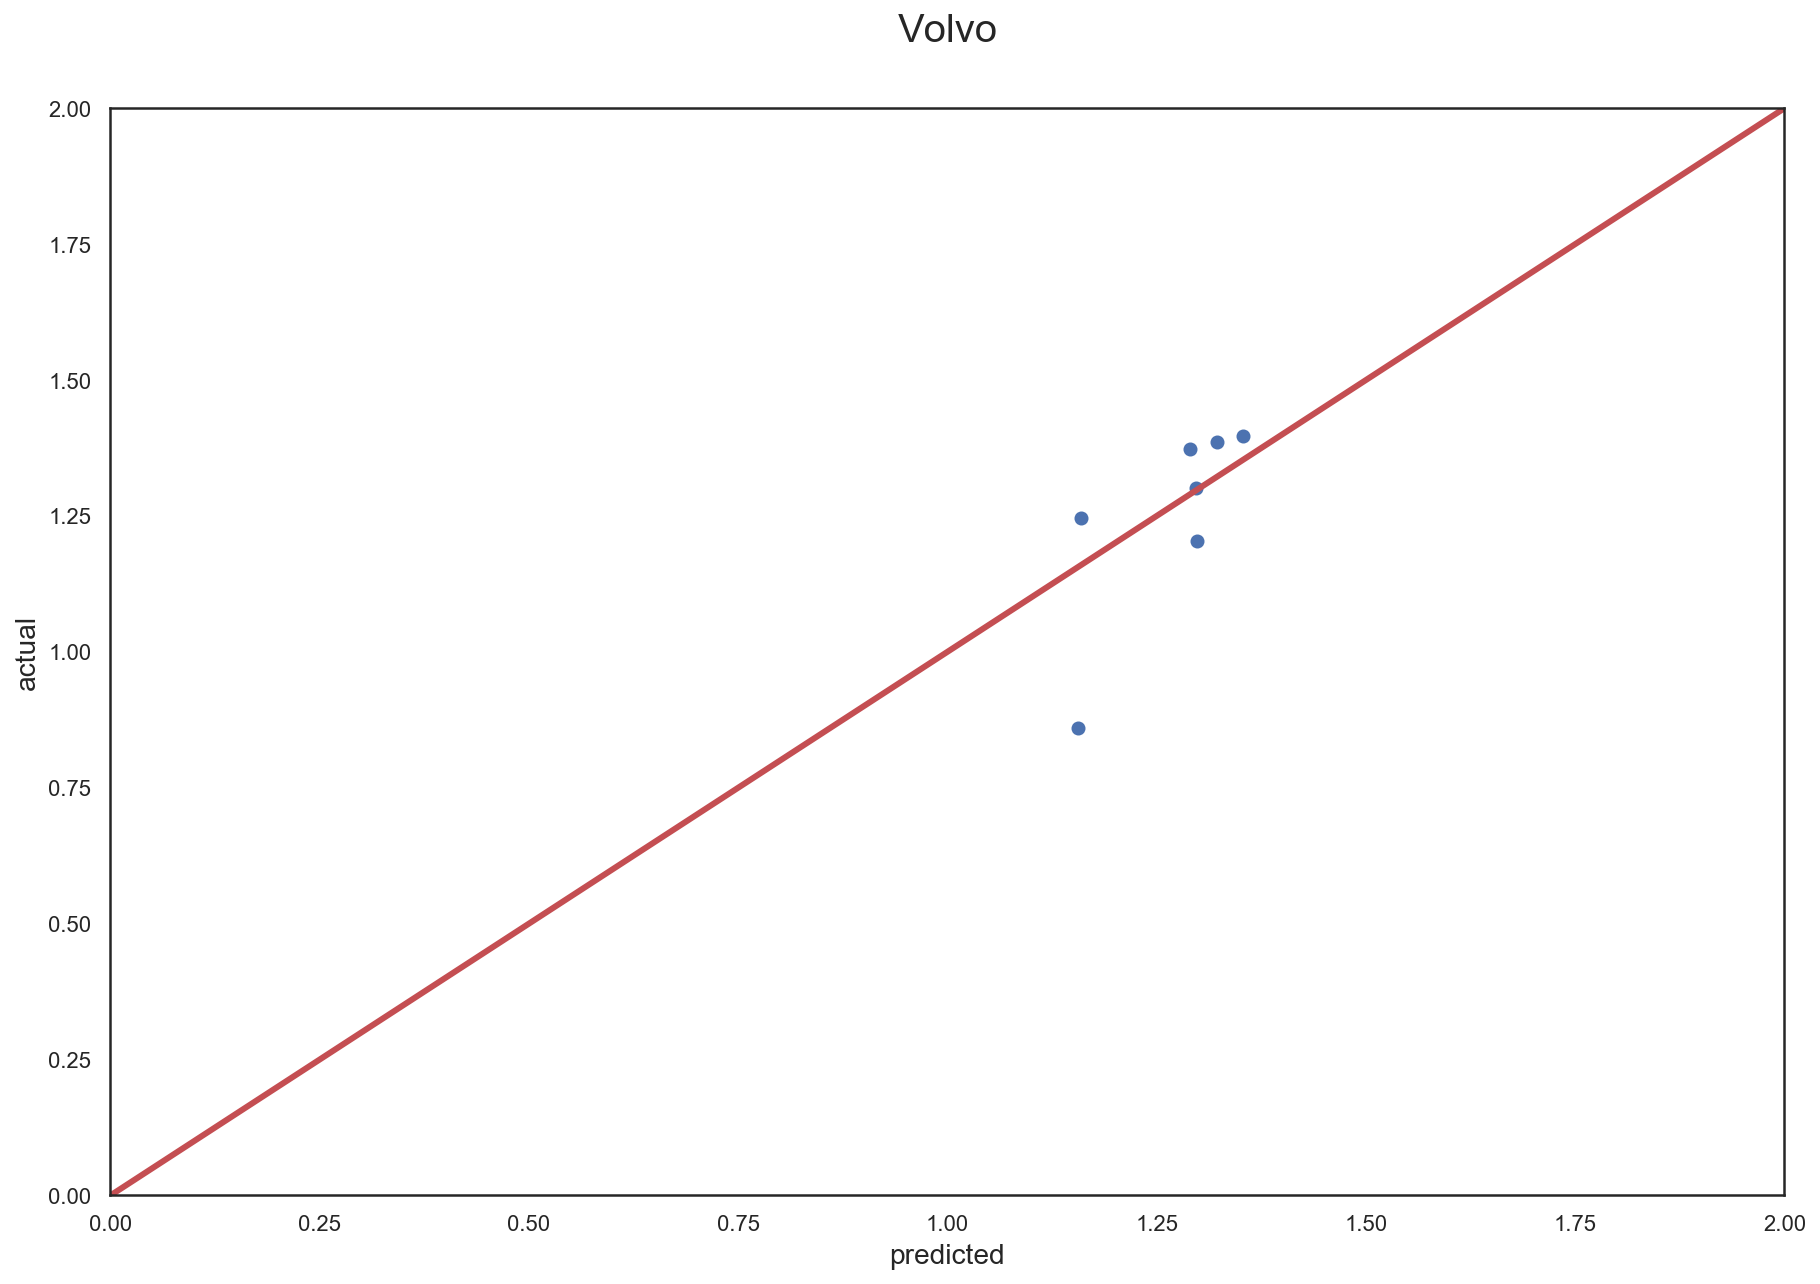

None
Chevrolet
explained_variance_score: 0.7594092875588729
mean_squared_errors: 0.011874994699738912
r2_score: 0.7592041526187173
None


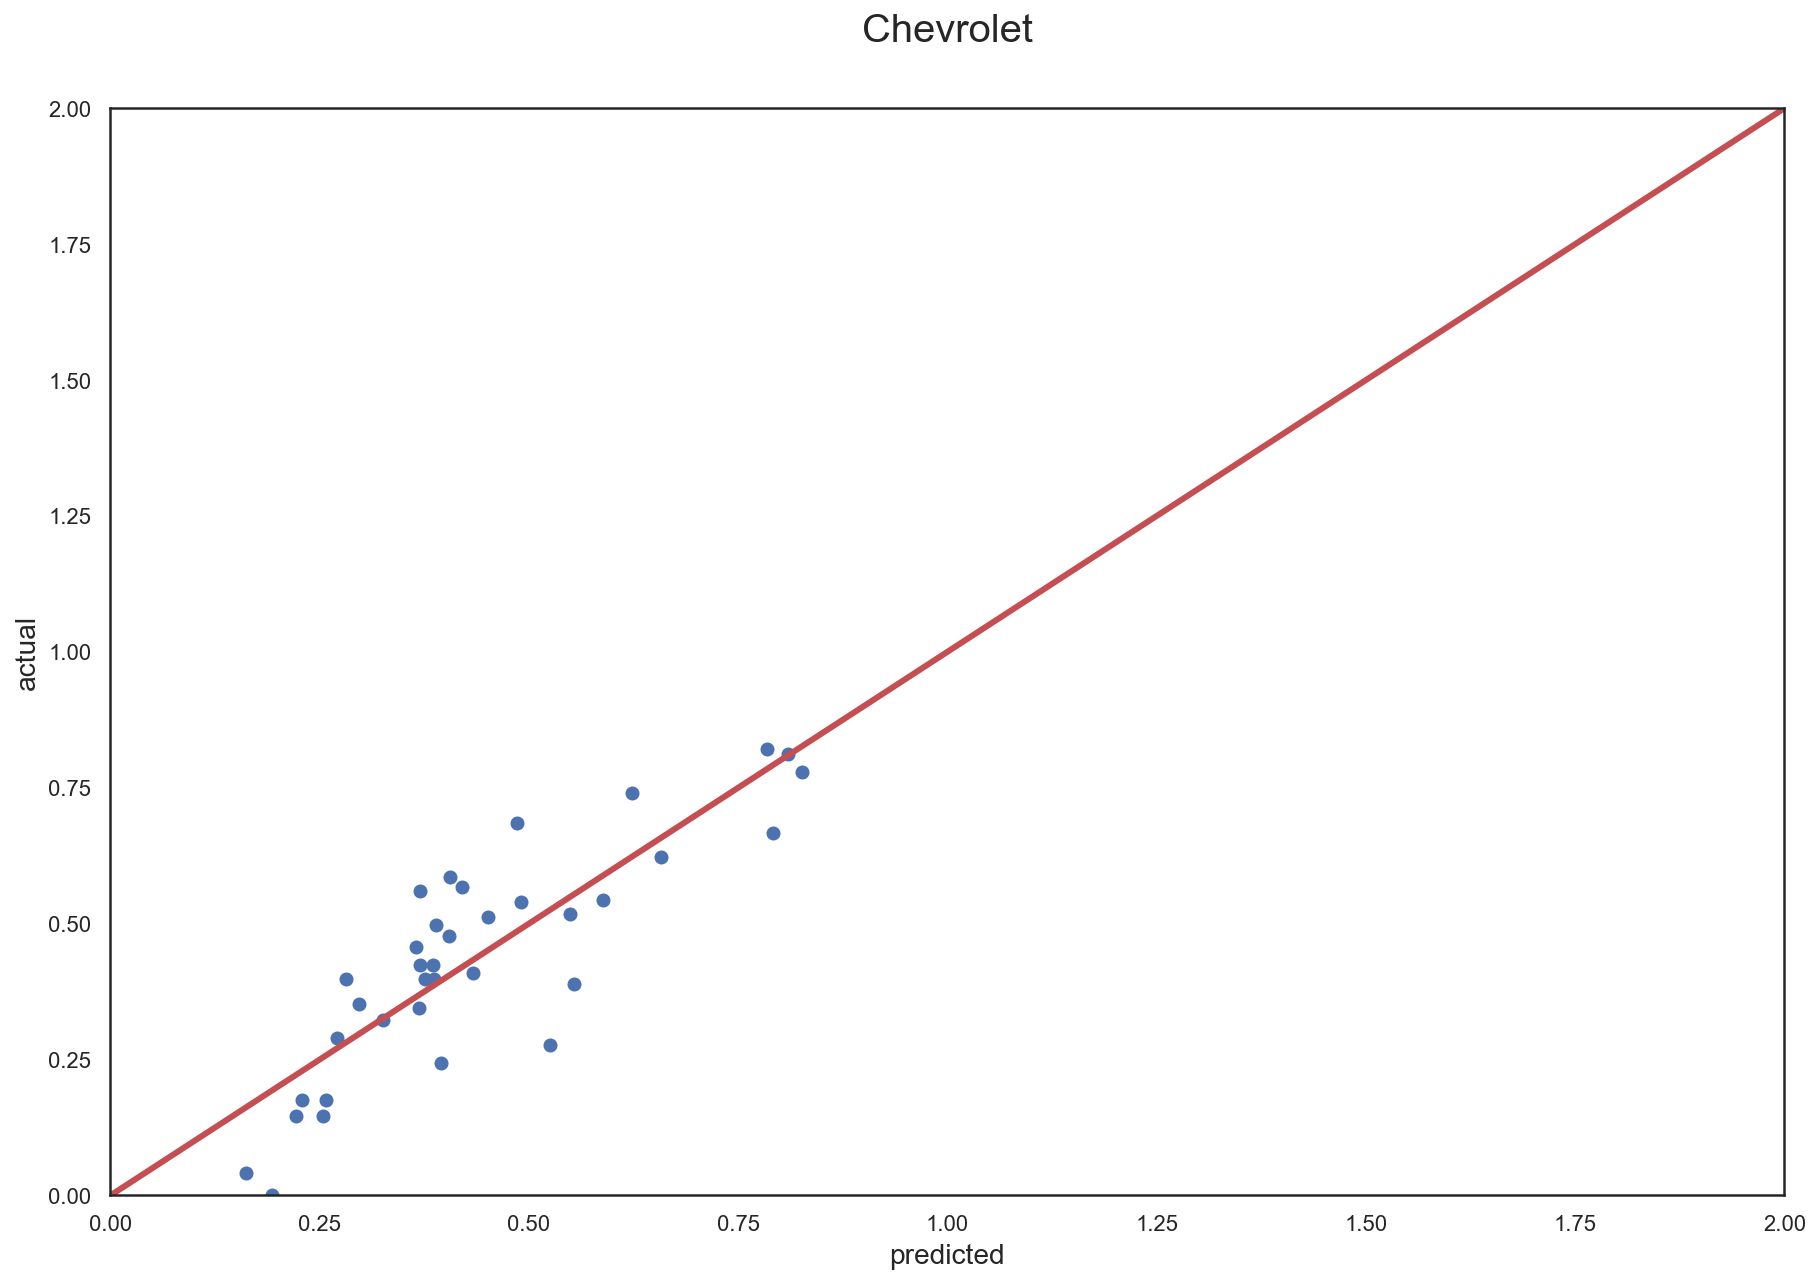

None
Skoda
explained_variance_score: 0.7136353820519243
mean_squared_errors: 0.023333724088931515
r2_score: 0.6874530898207247
None


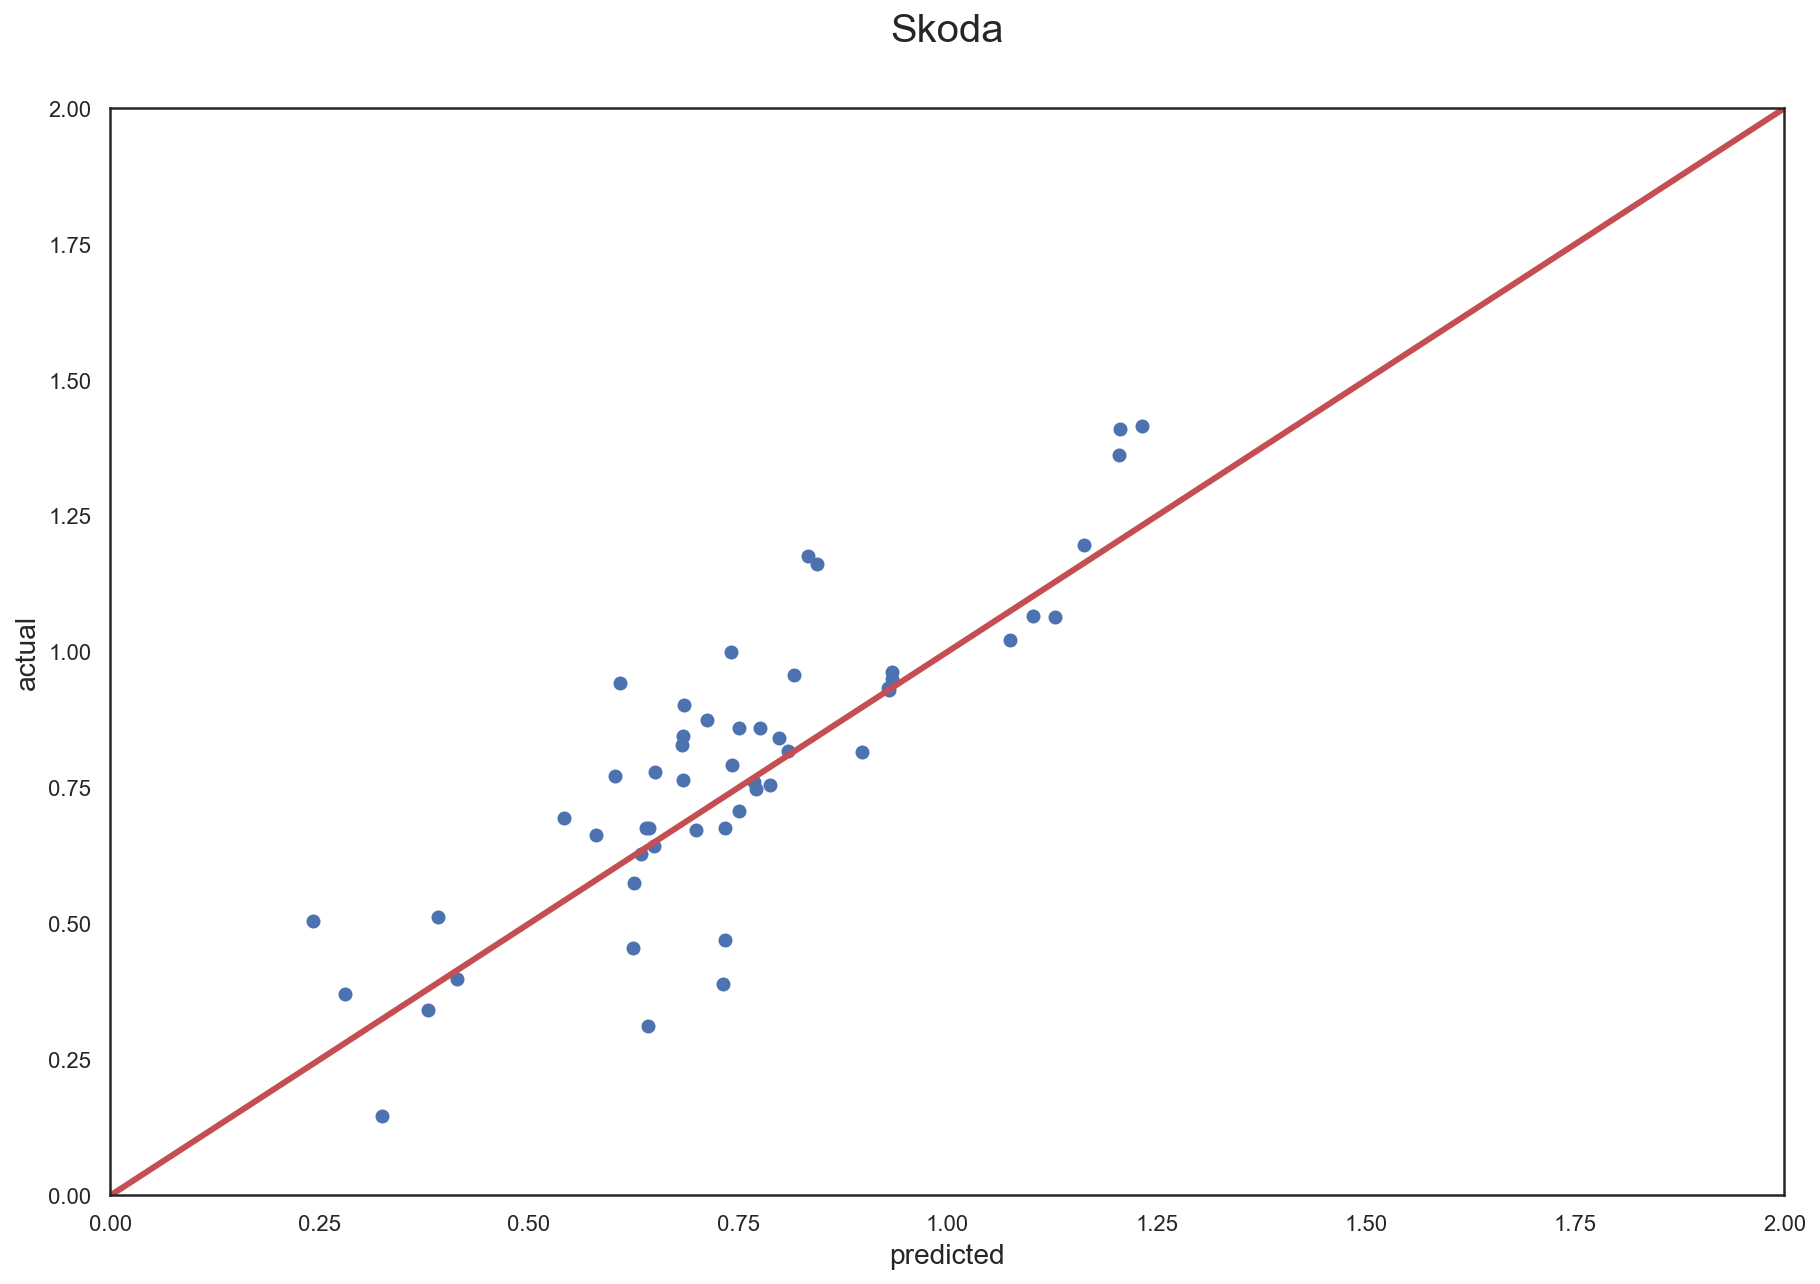

None
Mini
explained_variance_score: 0.7703060139876337
mean_squared_errors: 0.002121935475143578
r2_score: 0.7233173580197523
None


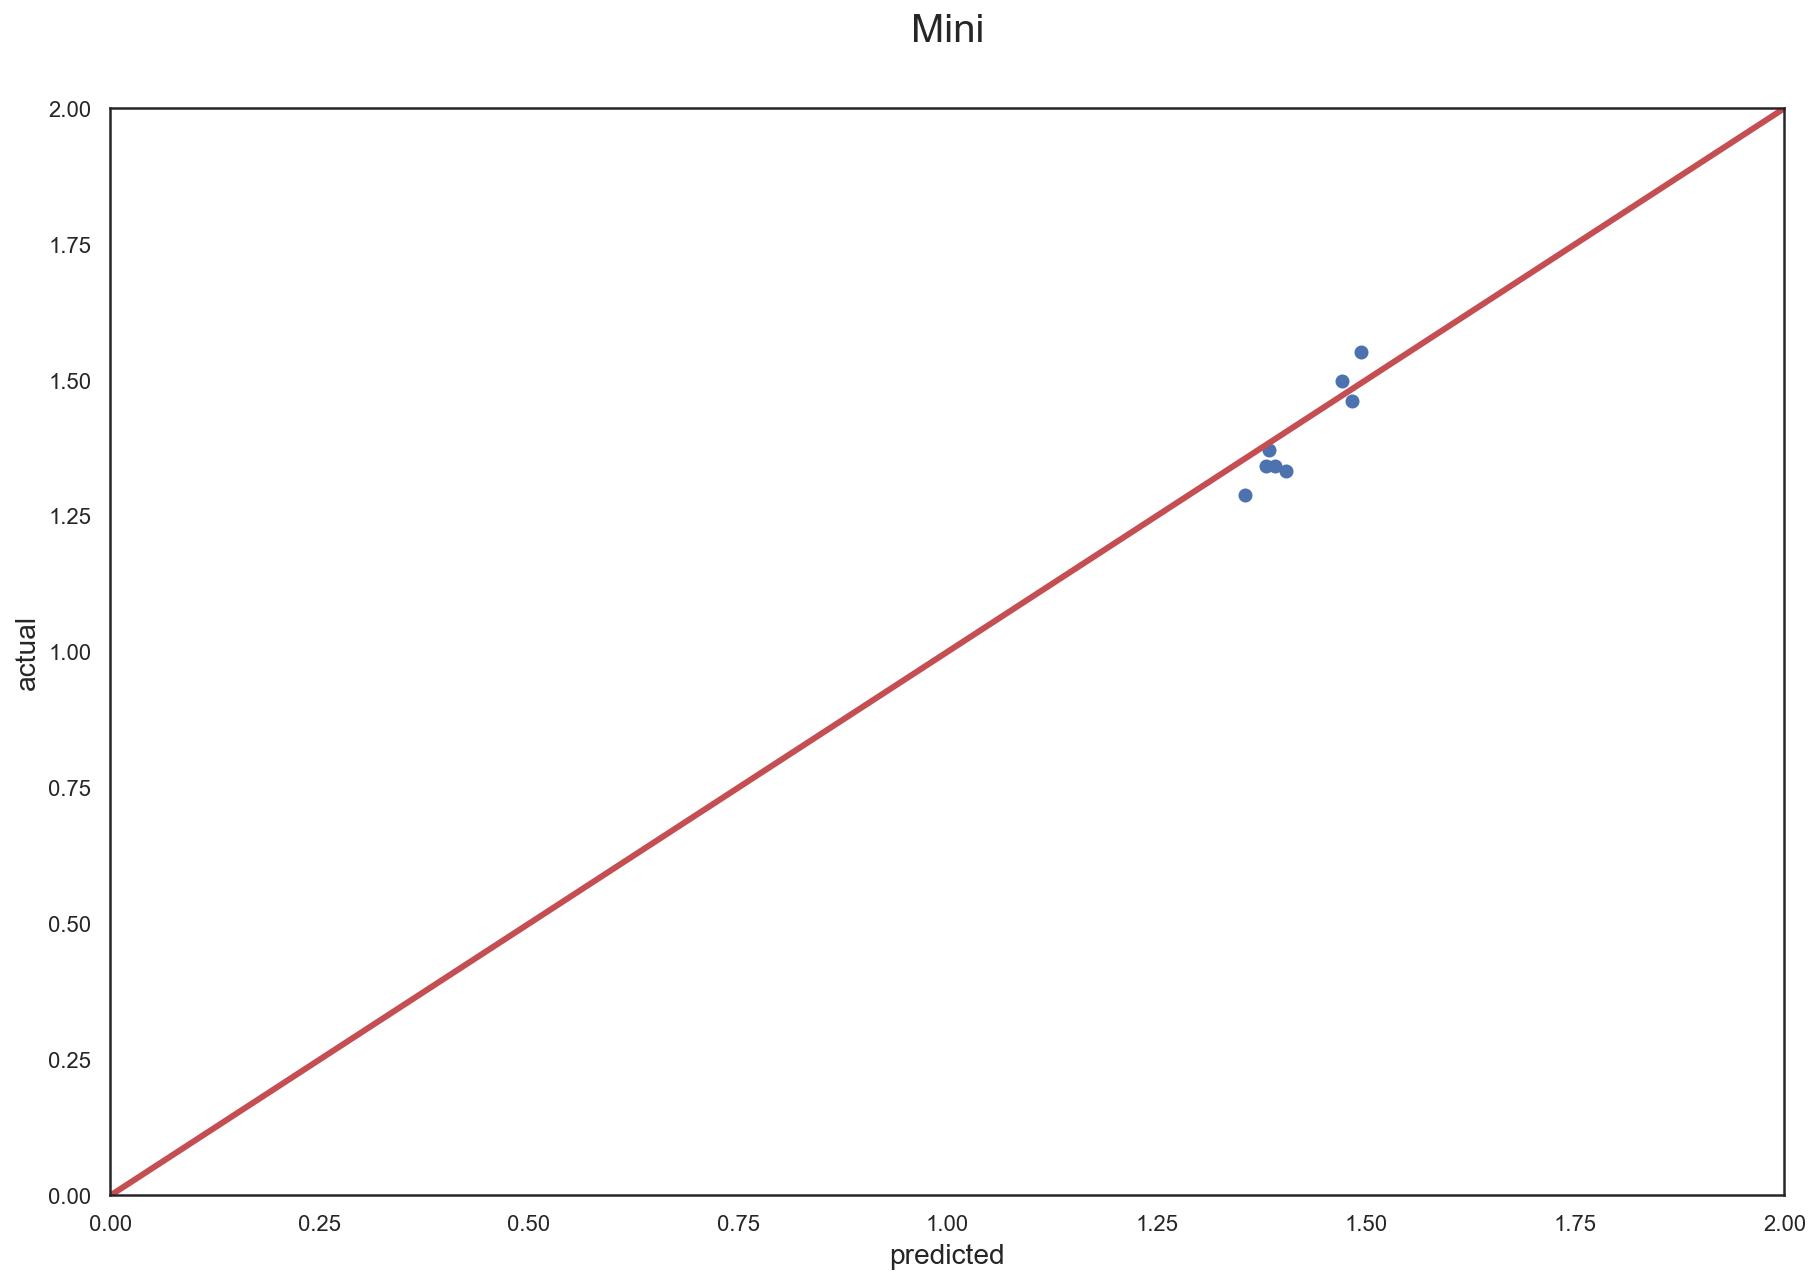

None
Fiat
explained_variance_score: 0.7076296883120843
mean_squared_errors: 0.06297362768630275
r2_score: 0.37518035103072966
None


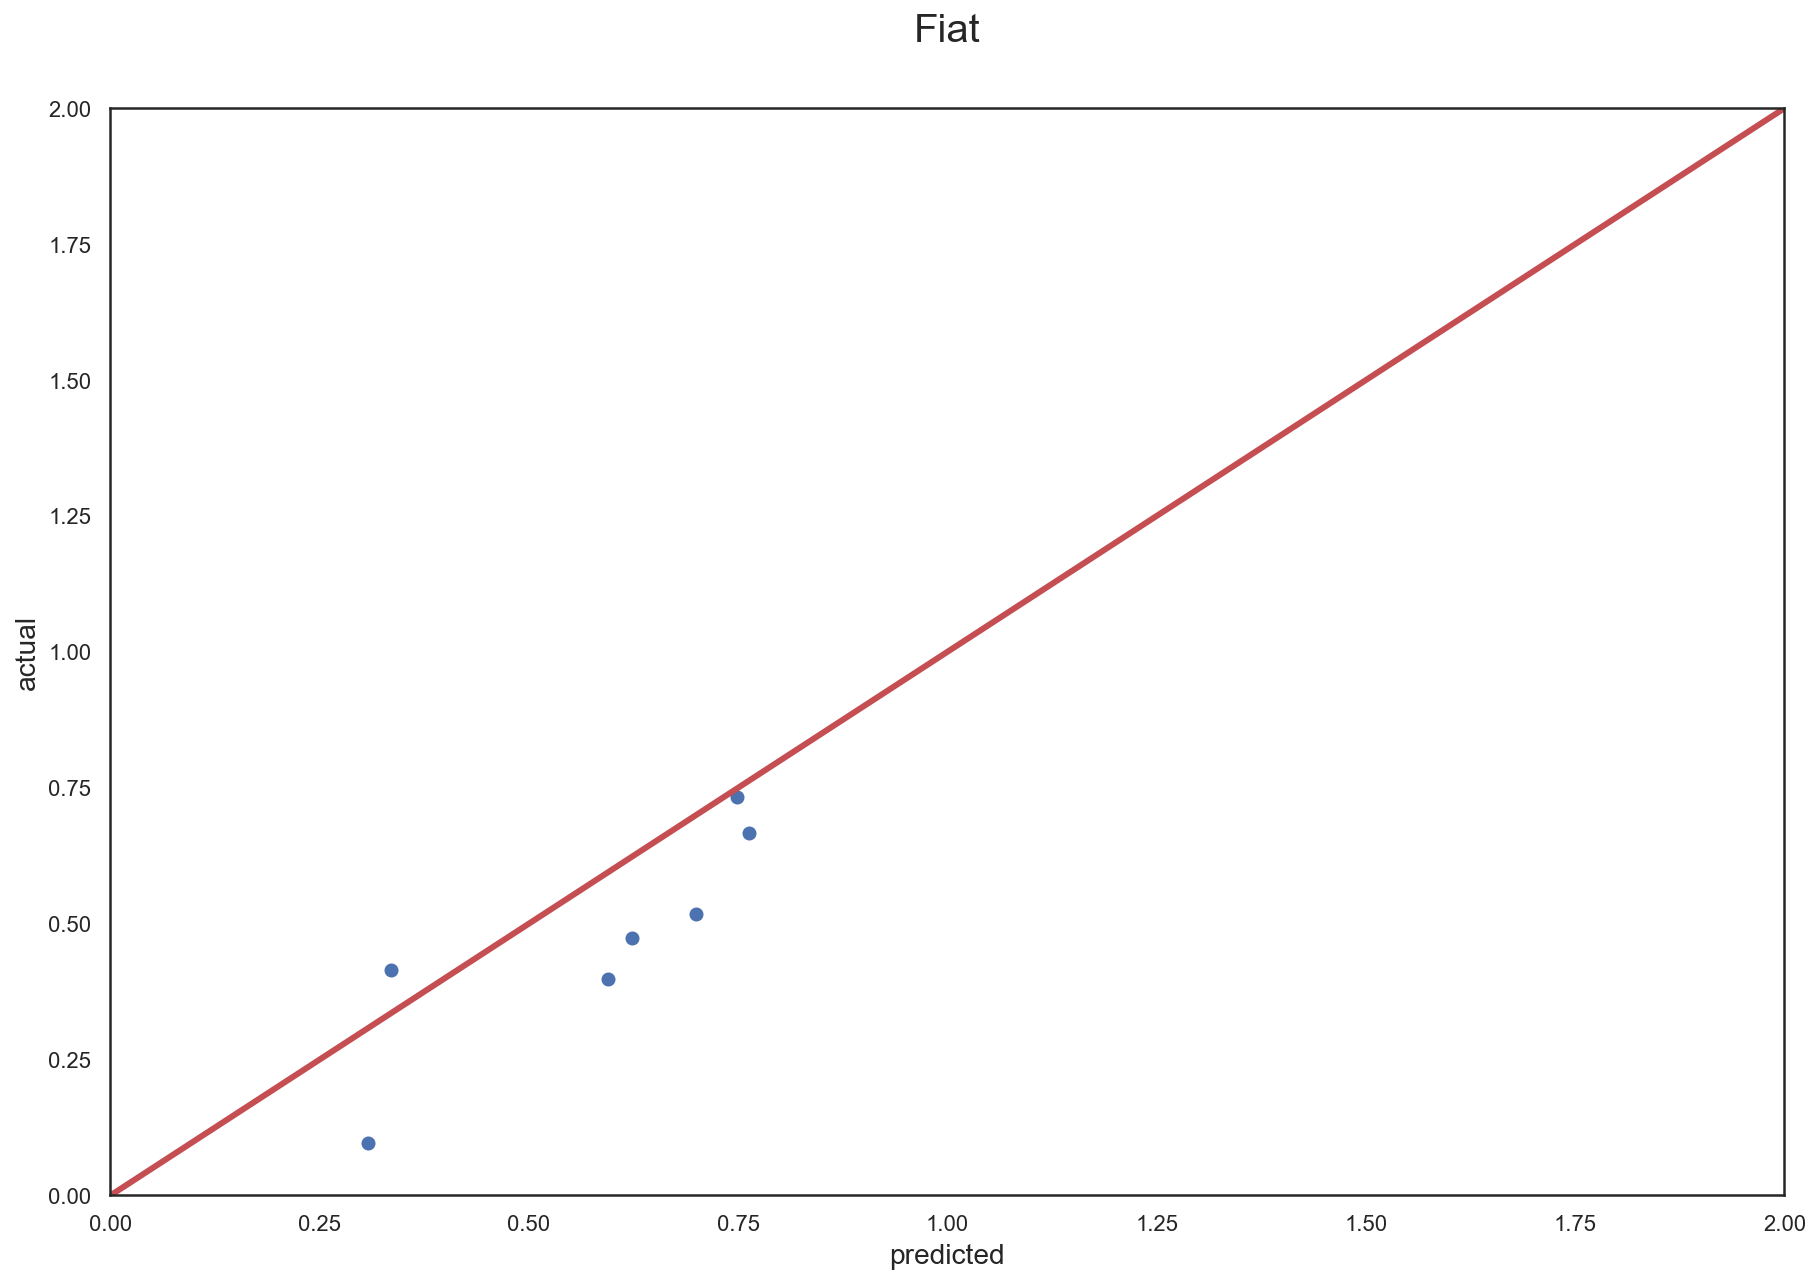

None
Jeep
explained_variance_score: 0.16225141237945262
mean_squared_errors: 0.0027816172132495783
r2_score: -0.38149671225487536
None


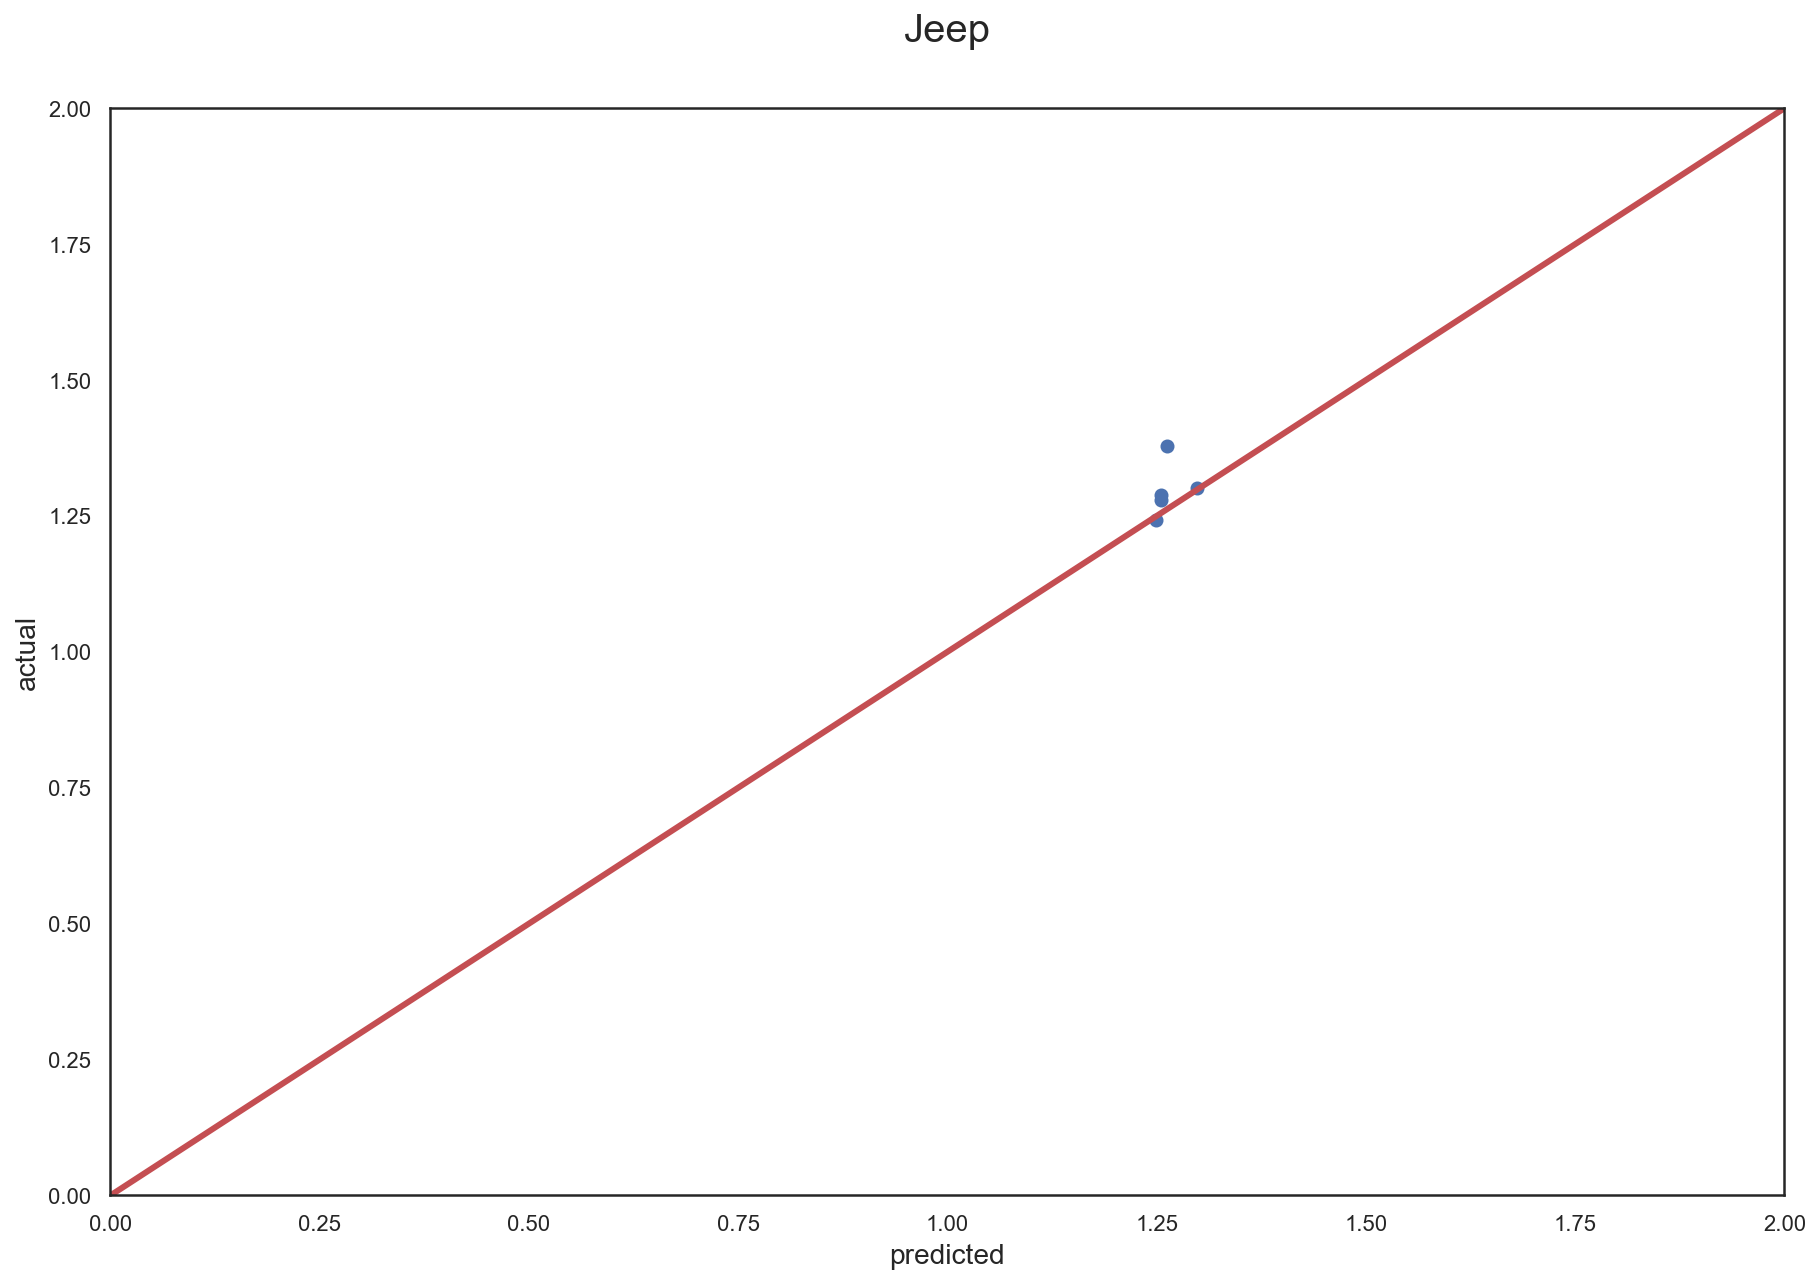

None
Smart
Ambassador
Isuzu
ISUZU
explained_variance_score: 1.0
mean_squared_errors: 0.09209164781612196
r2_score: nan
None


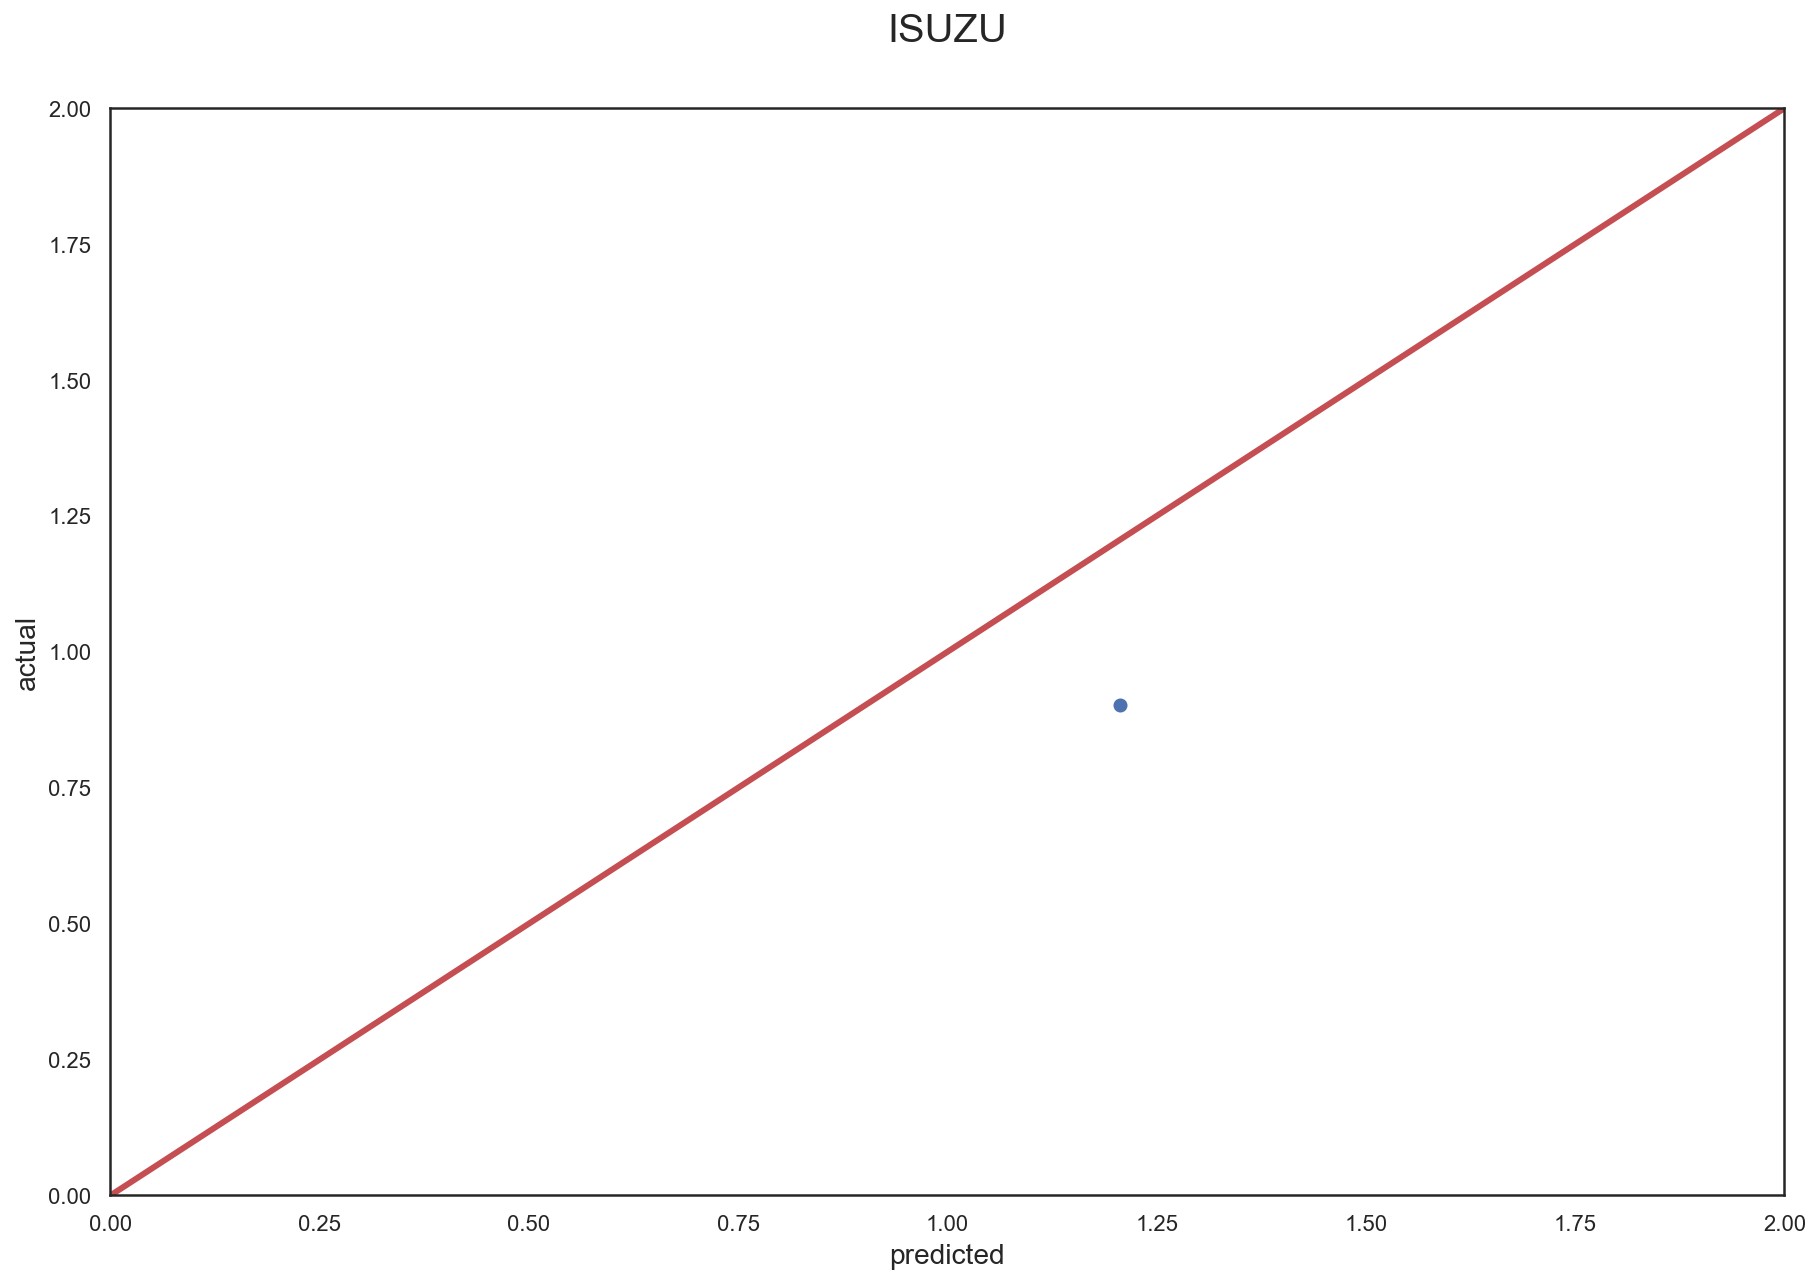

None
Force
explained_variance_score: 1.0
mean_squared_errors: 0.0016403301571866241
r2_score: nan
None


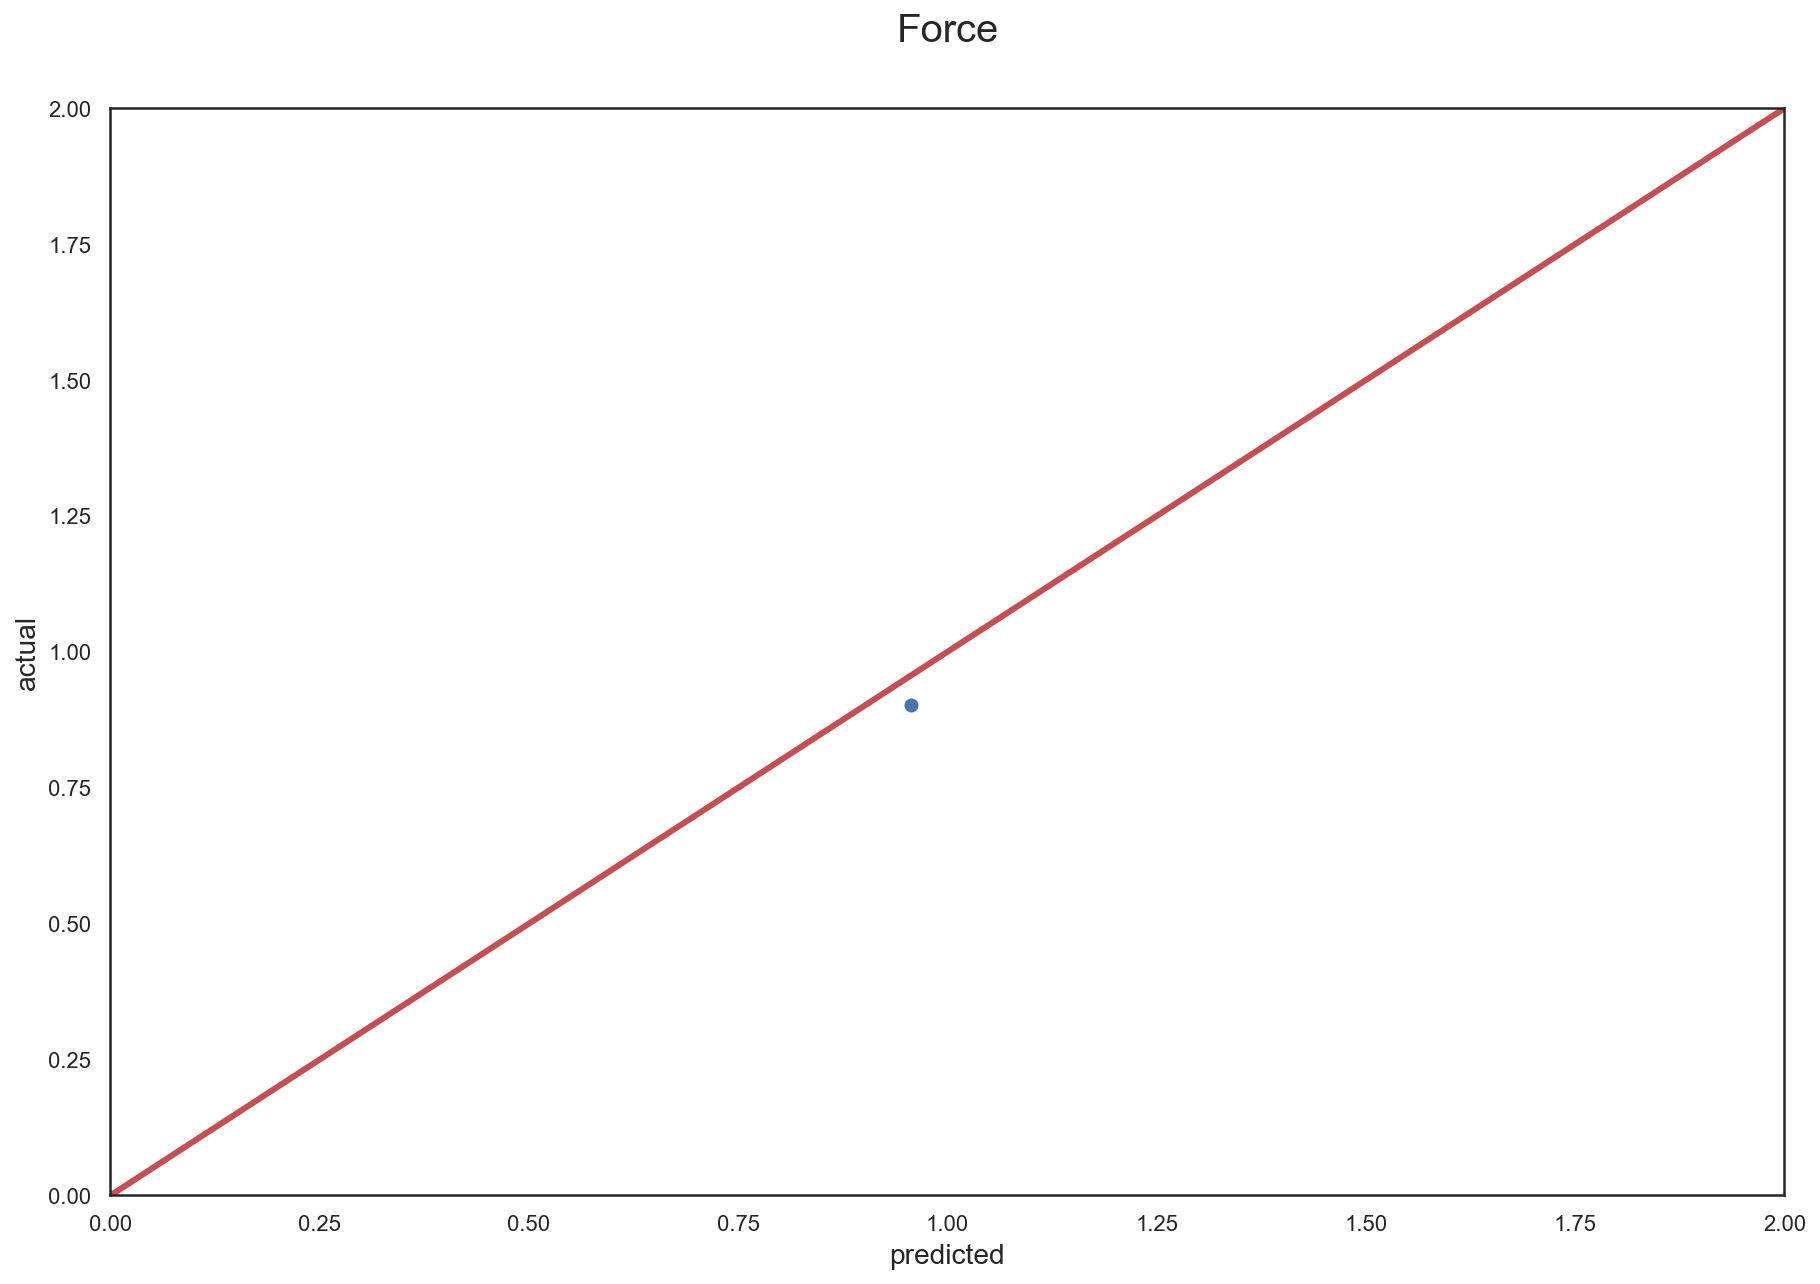

None
Bentley
Lamborghini


In [64]:
for i in car_t['Brand'].unique():
    X = get_Brand_df(i).drop(['Price', 'Brand'], axis=1)
    y = np.log10(get_Brand_df(i)['Price'])
    
    try:
        print('\033[91m' + '\033[1m' + i + '\033[0m')
        print(get_results_rf(X,y))
        print(get_graph_rf(X,y))
    except:
        pass


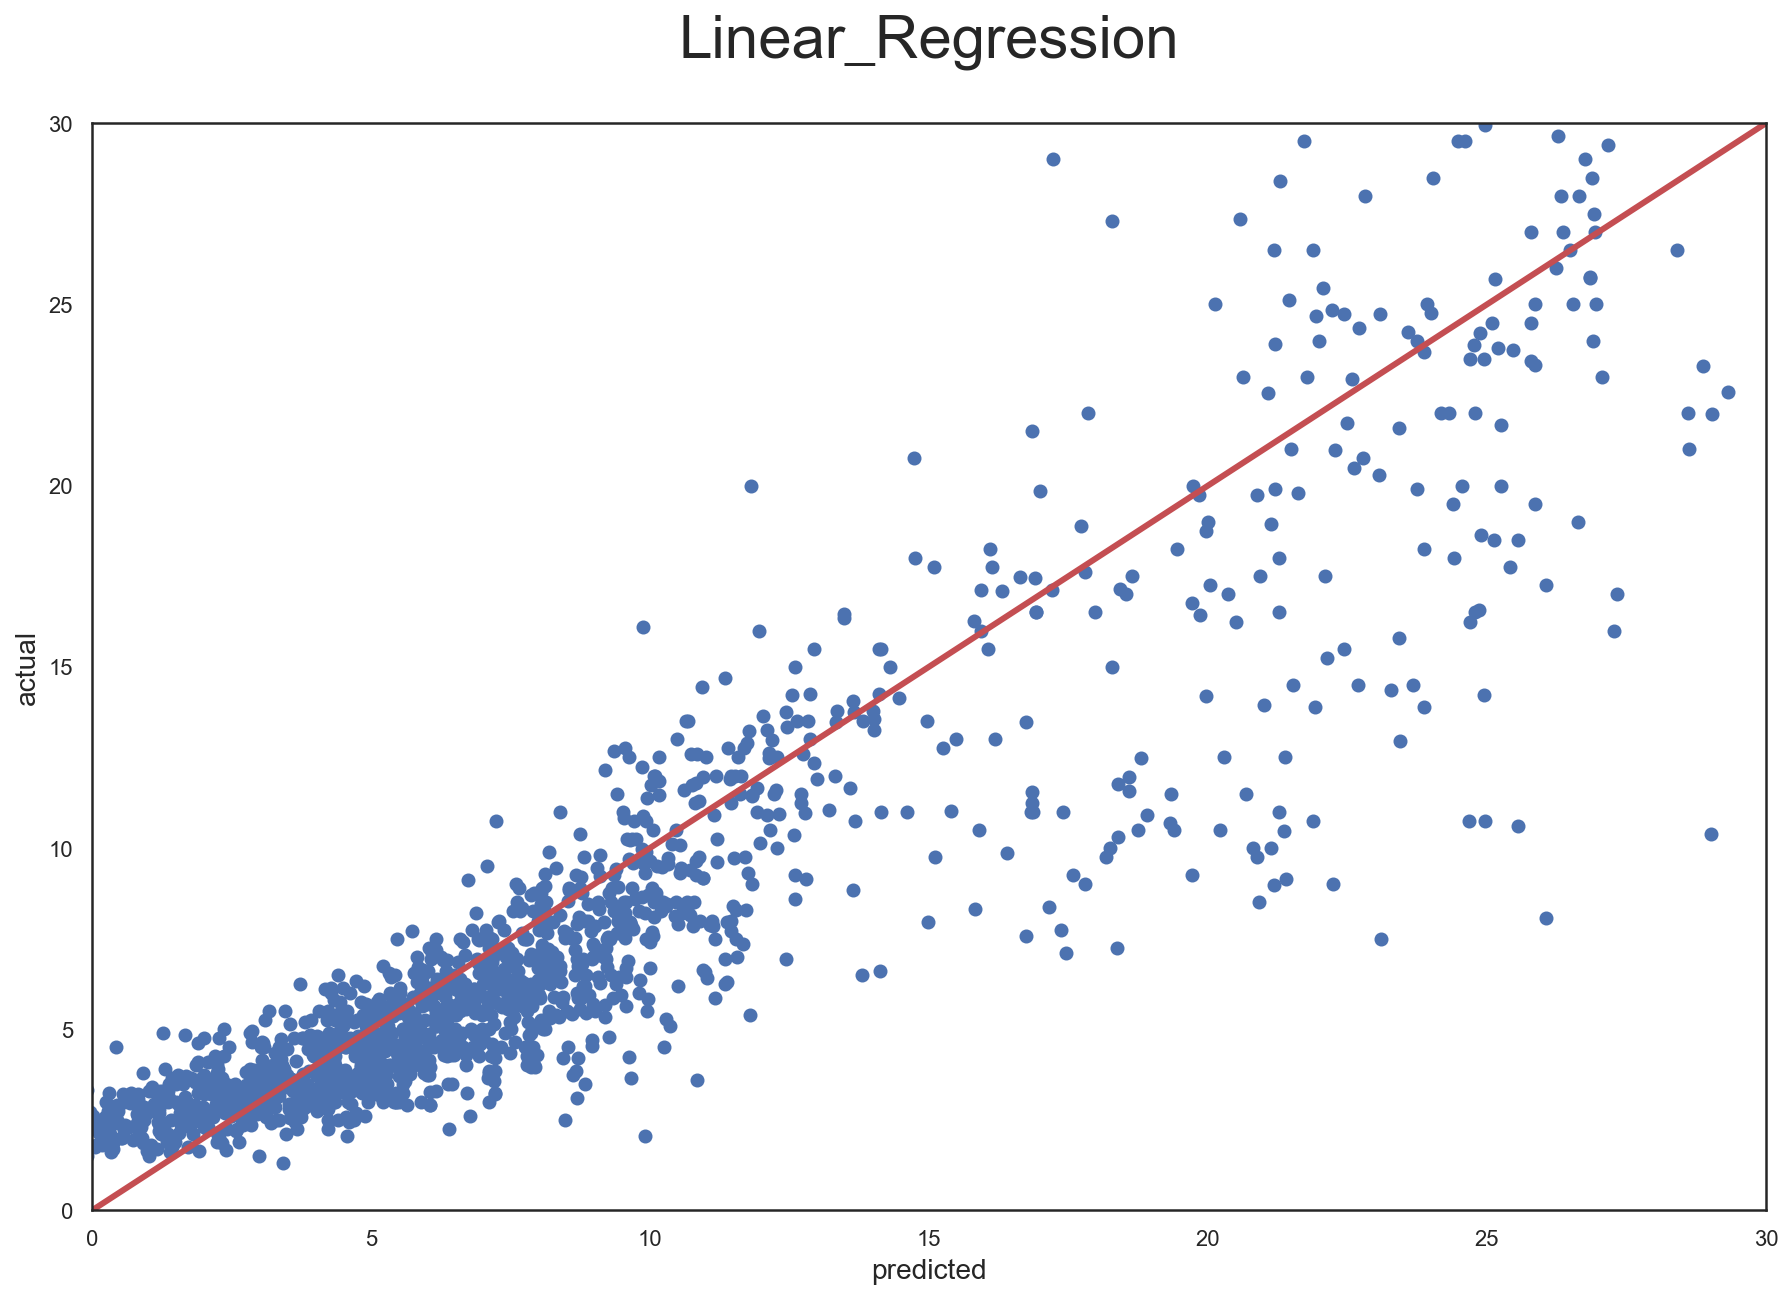

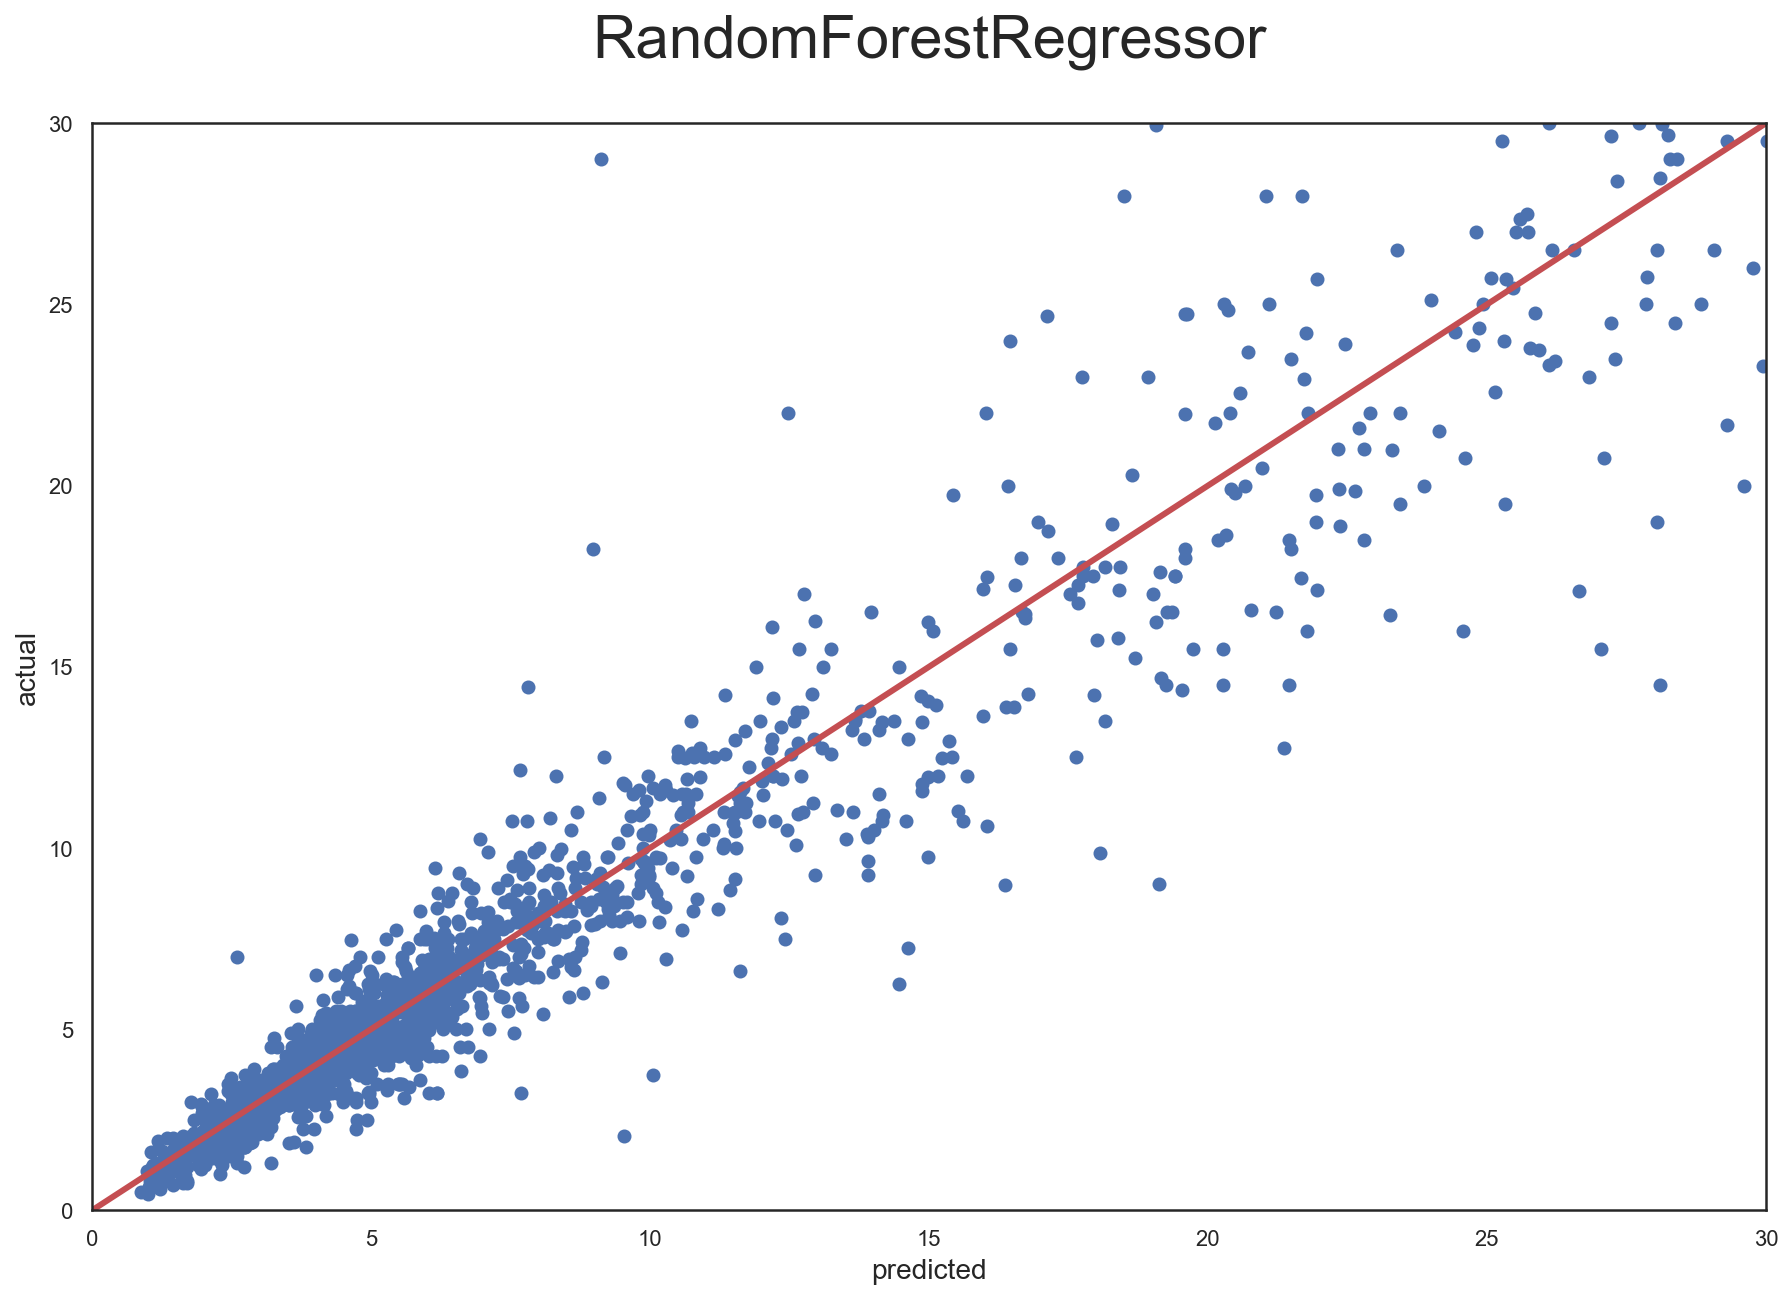

In [65]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('Linear_Regression', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

predicted = rf_reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('RandomForestRegressor', fontsize=30, y=1.05)

plt.show()

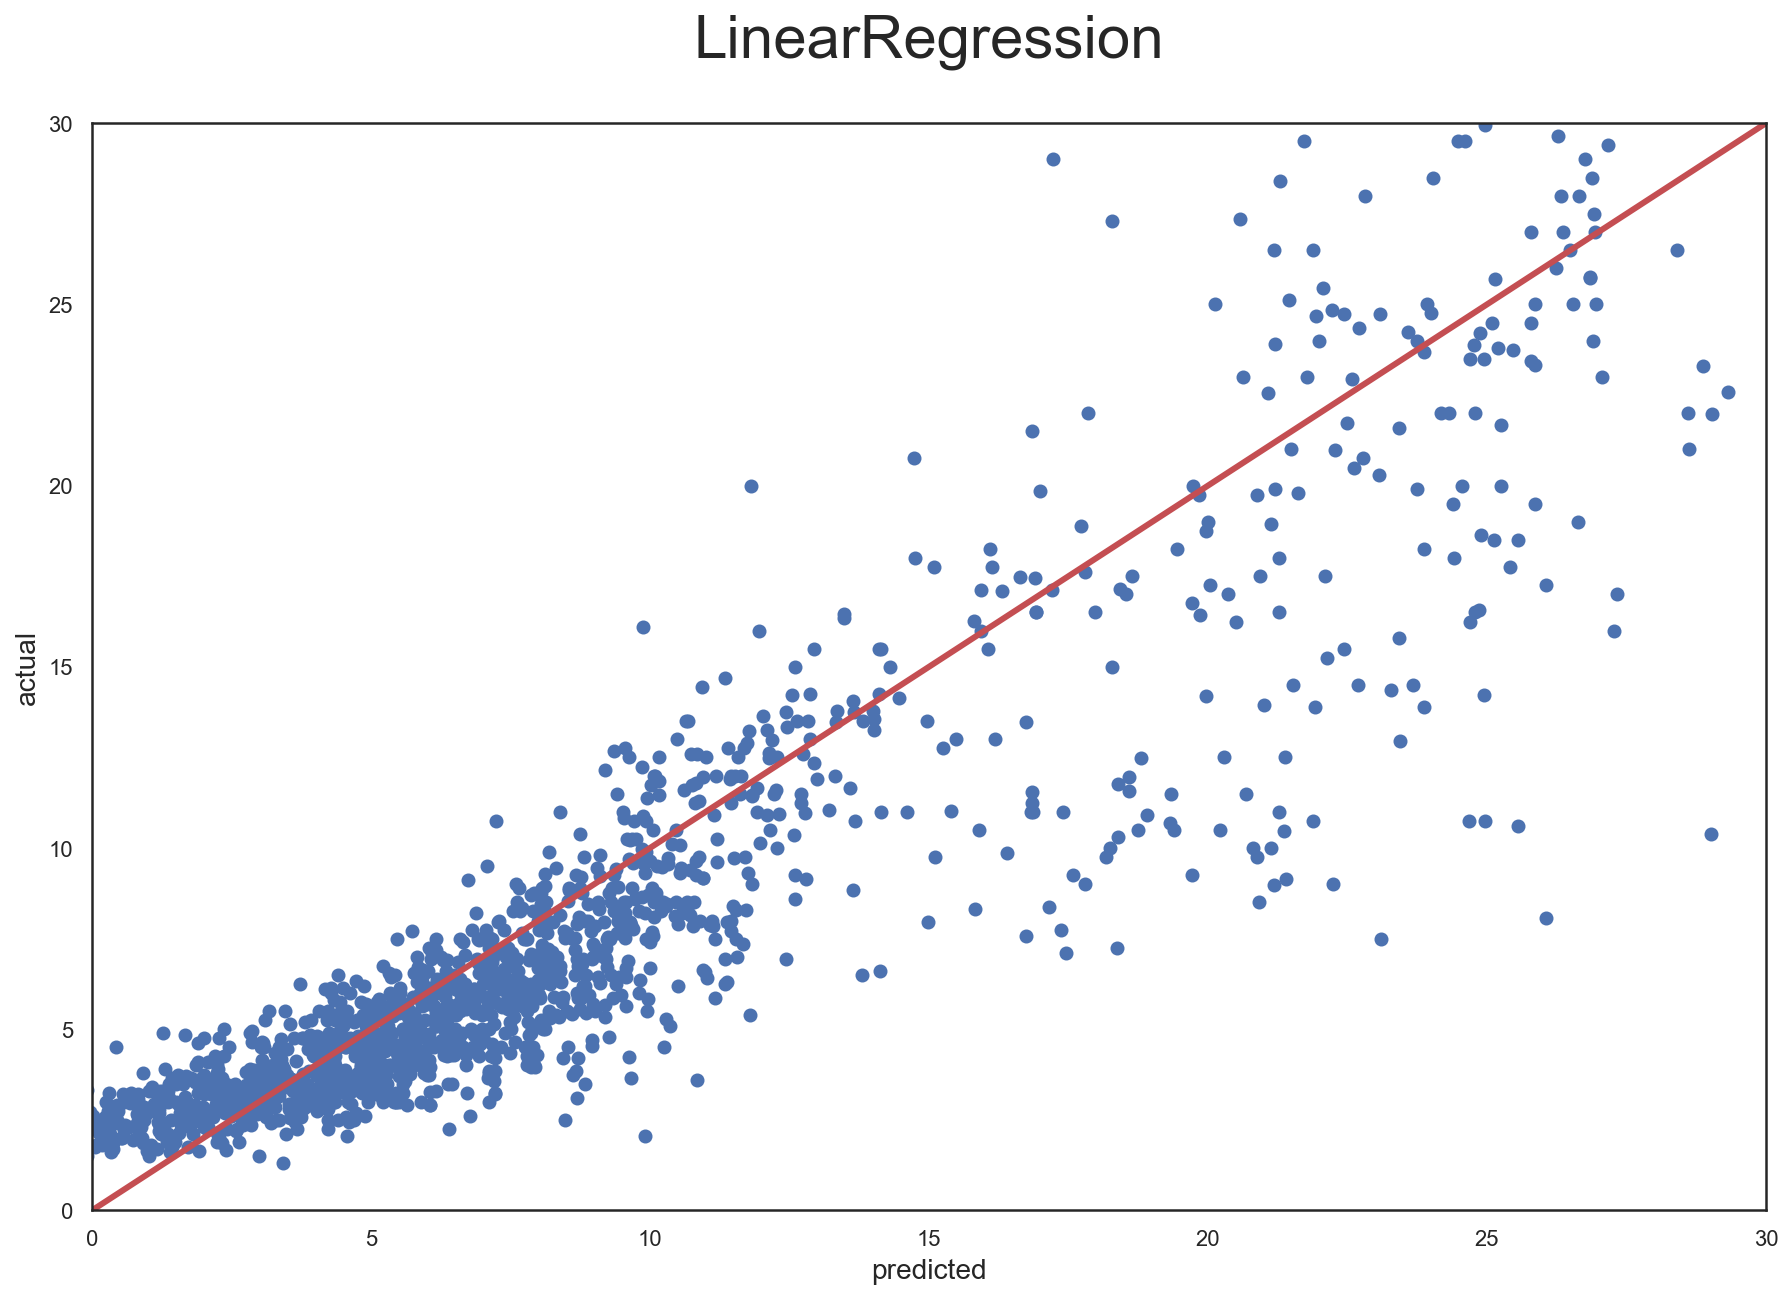

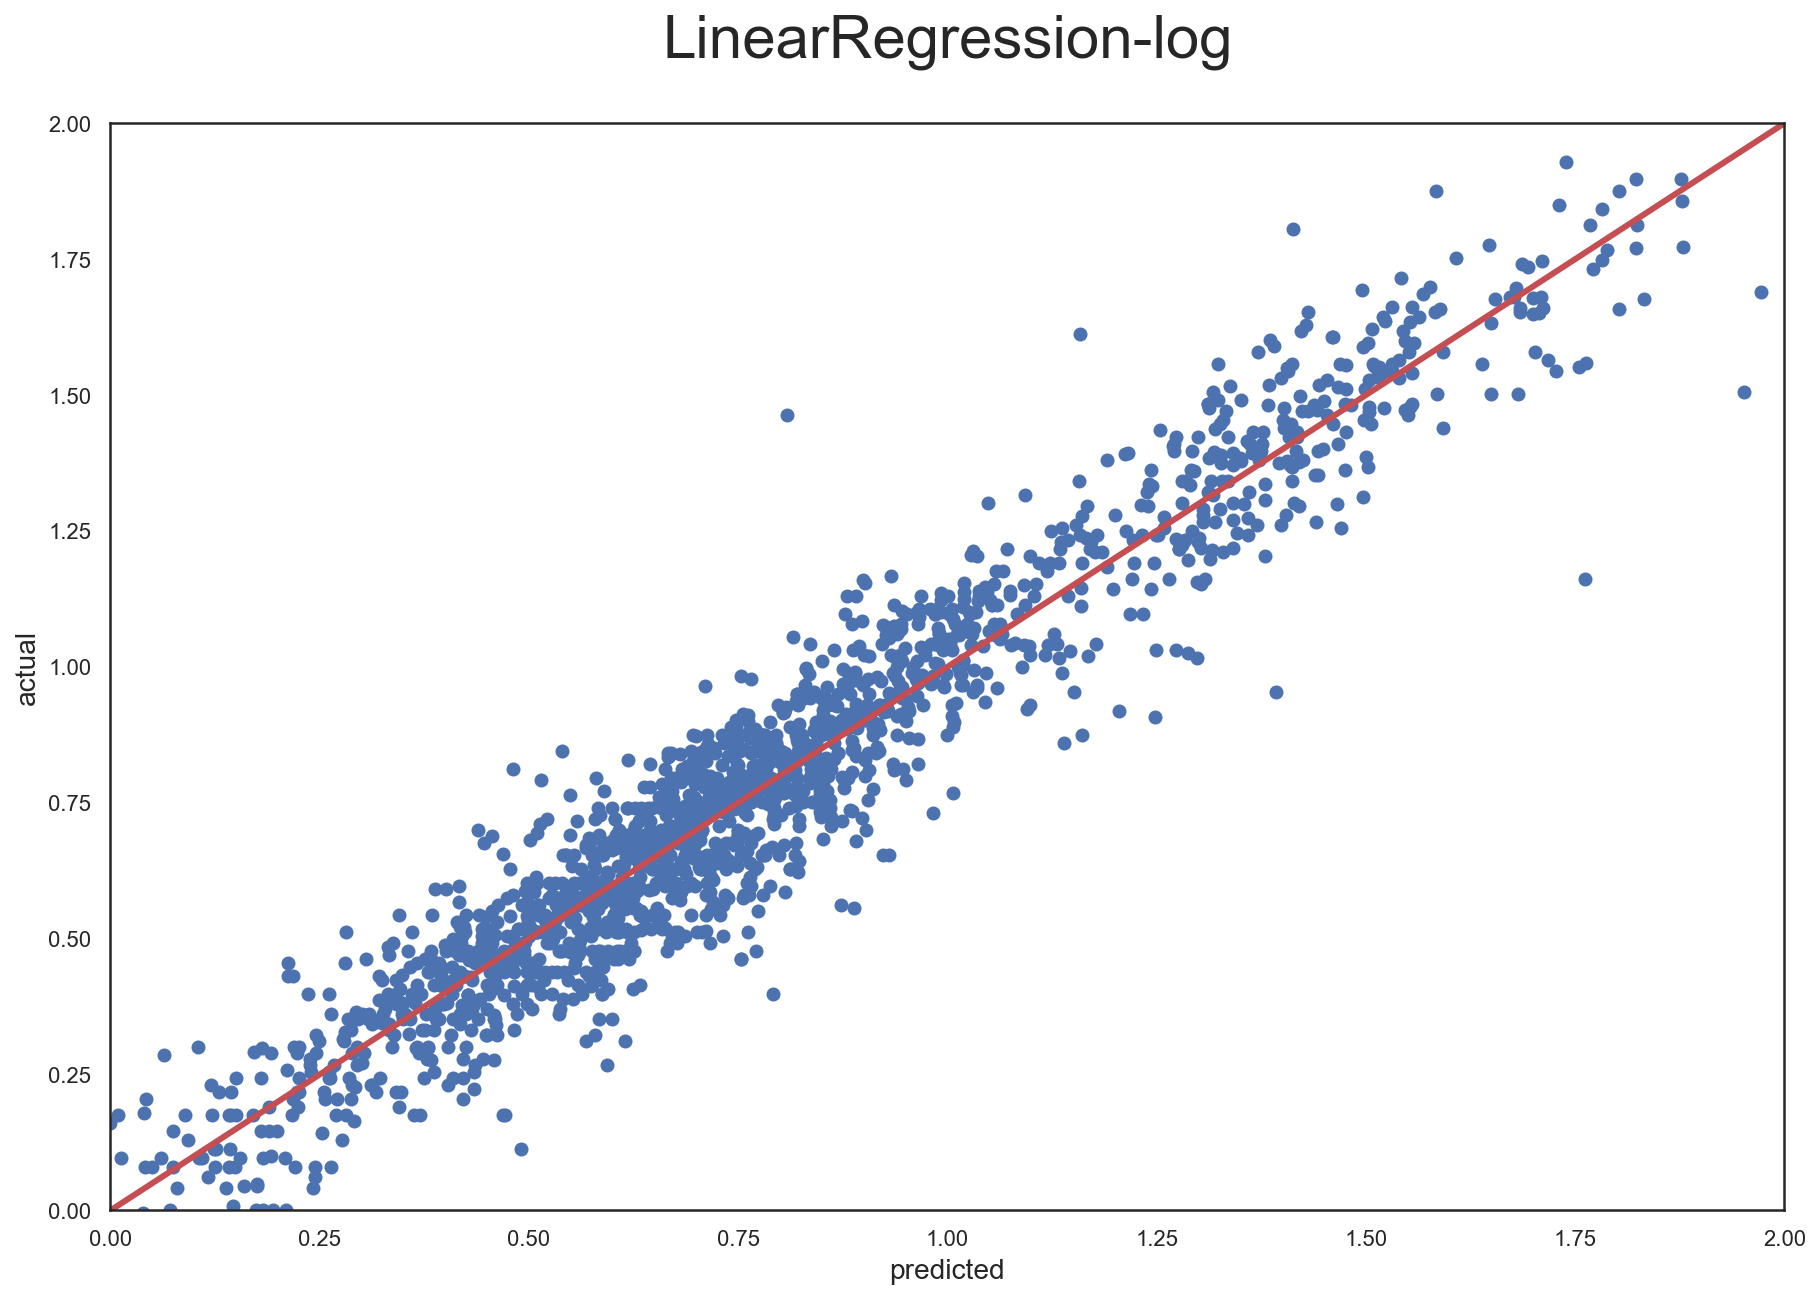

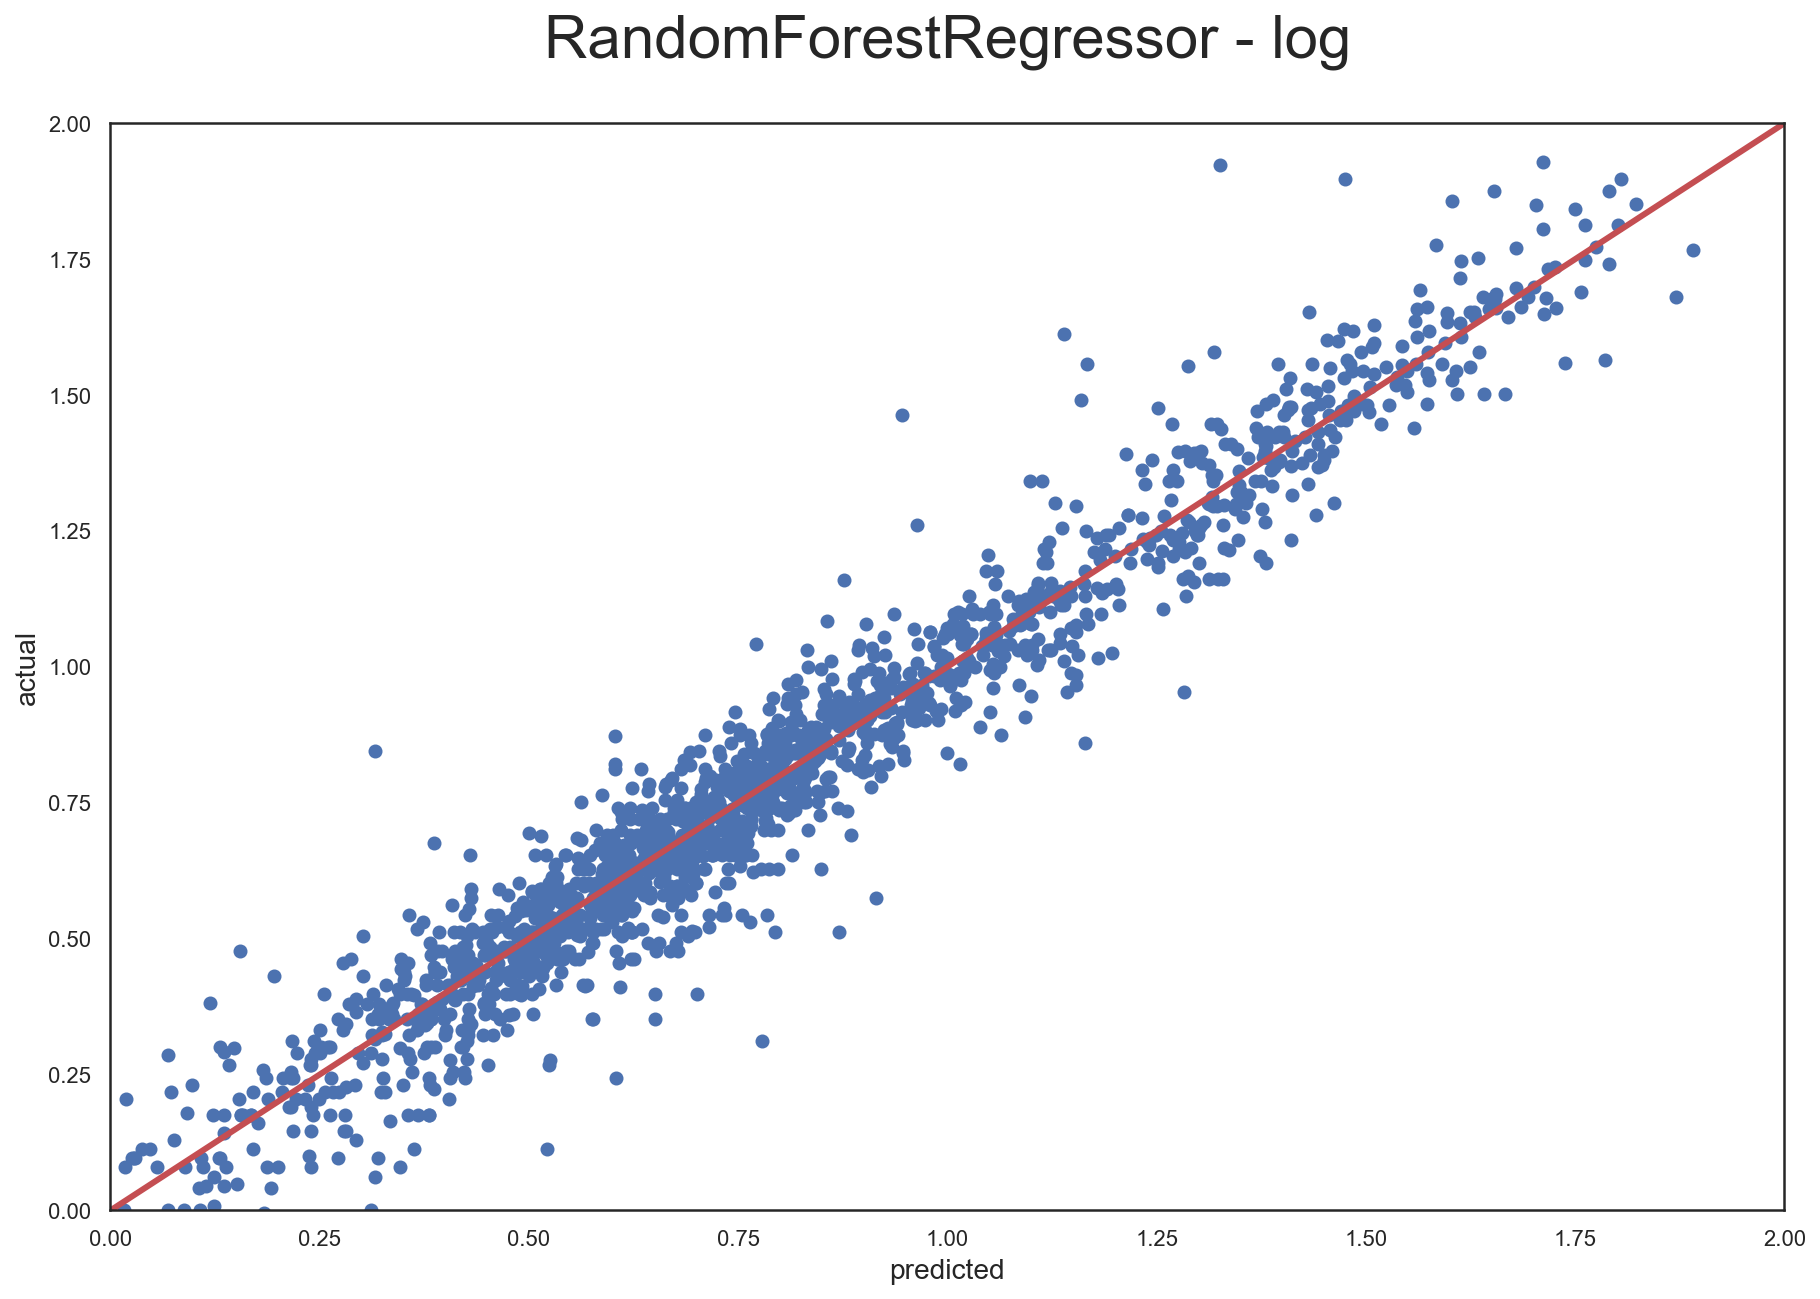

In [66]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('LinearRegression', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 2, 0, 2])  
line = plt.plot([0,2], [0,2])
plt.setp(line, color='r', linewidth=3.0)
plt.title('LinearRegression-log', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 2, 0, 2])  
line = plt.plot([0,2], [0,2])
plt.setp(line, color='r', linewidth=3.0)
plt.title('RandomForestRegressor - log', fontsize=30, y=1.05)

plt.show()

# 분석

In [67]:
# OLS
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     291.7
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        16:48:27   Log-Likelihood:                -13072.
No. Observations:                4211   AIC:                         2.624e+04
Df Residuals:                    4163   BIC:                         2.654e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       1.0069      0.033     30.227      0.000       0.942       1.072
Kilometers_Driven       2.623e-06   8.08e-07      3.247      0.001    1.04e-06    4.21e-06
Mile                      -0.1351      0.033     -4.113      0.000      -0.200      -0.071
Pow                        0.0951      0.003     30.230      0.000       0.089       0.101
Location_Ahmedabad      -210.5629      6.946    -30.315      0.000    -224.180    -196.945
Location_Bangalore      -207.8712      6.949    -29.912      0.000    -221.496    -194.246
Location_Chennai        -209.1358      6.914    -30.248      0.000    -222.691    -195.581
Location_Coimbatore     -208.6236      6.998    -29.811      0.000    -222.344    -194.903
Location_Delhi          -210.9542      6.940    -30.396      0.000    -224.561    -197.348
Location_Hyderabad      -208.6421      6.917    -30.164      0.000    -222.203    -195.081
Location_Jaipur         -209.5123      6.925    -30.257      0.000    -223.088    -195.937
Location_Kochi          -210.2597      7.001    -30.031      0.000    -223.986    -196.533
Location_Kolkata        -211.2035      6.928    -30.485      0.000    -224.786    -197.621
Location_Mumbai         -210.7962      6.946    -30.348      0.000    -224.414    -197.178
Location_Pune           -210.1267      6.934    -30.306      0.000    -223.720    -196.533
Fuel_Type_CNG           -575.5068     18.979    -30.323      0.000    -612.716    -538.297
Fuel_Type_Diesel        -577.5741     19.164    -30.138      0.000    -615.146    -540.002
Fuel_Type_LPG           -575.9150     19.131    -30.104      0.000    -613.422    -538.408
Fuel_Type_Petrol        -578.6924     19.167    -30.192      0.000    -616.270    -541.115
Transmission_Automatic -1153.7865     38.188    -30.213      0.000   -1228.656   -1078.917
Transmission_Manual    -1153.9018     38.146    -30.250      0.000   -1228.688   -1079.116
Brand_Ambassador         -76.2201      5.880    -12.962      0.000     -87.749     -64.692
Brand_Audi               -77.3474      2.674    -28.925      0.000     -82.590     -72.105
Brand_BMW                -79.0021      2.645    -29.873      0.000     -84.187     -73.817
Brand_Bentley            -71.0572      5.857    -12.132      0.000     -82.540     -59.574
Brand_Chevrolet          -86.8437      2.705    -32.103      0.000     -92.147     -81.540
Brand_Datsun             -87.8551      3.339    -26.311      0.000     -94.401     -81.309
Brand_Fiat               -86.2630      2.916    -29.583      0.000     -91.980     -80.546
Brand_Force              -88.1438      5.911    -14.912      0.000     -99.733     -76.555
Brand_Ford               -85.5061      2.720    -31.431      0.000     -90.840     -80.173
Brand_Honda              -86.9450      2.680    -32.444      0.000     -92.199  

In [68]:
# OLS - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1085.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        16:48:27   Log-Likelihood:                 3598.3
No. Observations:                4211   AIC:                            -7101.
Df Residuals:                    4163   BIC:                            -6796.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       0.0547      0.001     86.080      0.000       0.053       0.056
Kilometers_Driven      -1.622e-08   1.54e-08     -1.052      0.293   -4.64e-08     1.4e-08
Mile                      -0.0102      0.001    -16.260      0.000      -0.011      -0.009
Pow                        0.0028      6e-05     46.239      0.000       0.003       0.003
Location_Ahmedabad       -11.3540      0.133    -85.643      0.000     -11.614     -11.094
Location_Bangalore       -11.2944      0.133    -85.149      0.000     -11.554     -11.034
Location_Chennai         -11.3515      0.132    -86.019      0.000     -11.610     -11.093
Location_Coimbatore      -11.3221      0.134    -84.762      0.000     -11.584     -11.060
Location_Delhi           -11.3931      0.132    -86.008      0.000     -11.653     -11.133
Location_Hyderabad       -11.3165      0.132    -85.718      0.000     -11.575     -11.058
Location_Jaipur          -11.3925      0.132    -86.197      0.000     -11.652     -11.133
Location_Kochi           -11.3808      0.134    -85.164      0.000     -11.643     -11.119
Location_Kolkata         -11.4578      0.132    -86.648      0.000     -11.717     -11.199
Location_Mumbai          -11.3782      0.133    -85.824      0.000     -11.638     -11.118
Location_Pune            -11.3768      0.132    -85.968      0.000     -11.636     -11.117
Fuel_Type_CNG            -31.1585      0.362    -86.013      0.000     -31.869     -30.448
Fuel_Type_Diesel         -31.2074      0.366    -85.318      0.000     -31.925     -30.490
Fuel_Type_LPG            -31.3051      0.365    -85.733      0.000     -32.021     -30.589
Fuel_Type_Petrol         -31.3466      0.366    -85.685      0.000     -32.064     -30.629
Transmission_Automatic   -62.4849      0.729    -85.726      0.000     -63.914     -61.056
Transmission_Manual      -62.5327      0.728    -85.887      0.000     -63.960     -61.105
Brand_Ambassador          -4.2974      0.112    -38.289      0.000      -4.517      -4.077
Brand_Audi                -4.1418      0.051    -81.149      0.000      -4.242      -4.042
Brand_BMW                 -4.1660      0.050    -82.533      0.000      -4.265      -4.067
Brand_Bentley             -4.2914      0.112    -38.387      0.000      -4.511      -4.072
Brand_Chevrolet           -4.5277      0.052    -87.690      0.000      -4.629      -4.426
Brand_Datsun              -4.5443      0.064    -71.304      0.000      -4.669      -4.419
Brand_Fiat                -4.4955      0.056    -80.773      0.000      -4.605      -4.386
Brand_Force               -4.3155      0.113    -38.250      0.000      -4.537      -4.094
Brand_Ford                -4.4064      0.052    -84.861      0.000      -4.508      -4.305
Brand_Honda               -4.3552      0.051    -85.147      0.000      -4.456  

In [69]:
# OLS - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()
pred_test = ols_reg.predict(X_test)

print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
print('r2_score: {}'.format(r2_score(y_test, pred_test)))

explained_variance_score: 0.8550889513968113
mean_squared_errors: 0.02203476478585003
r2_score: 0.8550224706924636


In [70]:
# LinearRegression - log
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_test = reg.predict(X_test)

print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
print('r2_score: {}'.format(r2_score(y_test, pred_test)))

explained_variance_score: 0.9253579008375127
mean_squared_errors: 0.011345288997120903
r2_score: 0.9253537769035407


# 가격 예측

In [71]:
def get_car_price(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred = reg.predict(car)
    return(pred)

In [72]:
def get_car_price_rf(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    pred = rf_reg.predict(car)
    return(pred)

## 1. 마루티

In [73]:
get_Brand_df('Maruti').drop(['Price', 'Brand'], axis=1).columns

Index(['Year', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Owner',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [74]:
# 4.85
Mcar = np.array([[2017, 28344, 22, 1197, 81.8, 1,
                 0,0,0,
                 0,1,0,
                 0,0,0,
                 0,0,0,
                 1,0,1]])

In [75]:
# Linear_Regression
X = get_Brand_df('Maruti').drop(['Price', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price(Mcar)

array([5.1829899])

In [76]:
# RandomForest_Regressor
X = get_Brand_df('Maruti').drop(['Price', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price_rf(Mcar)

array([6.3507])

In [77]:
# LinearRegression - log
X = get_Brand_df('Maruti').drop(['Price', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

inverse_log(get_car_price(Mcar))

5.087567340177431

In [78]:
# RandomForestRegressor - log
X = get_Brand_df('Maruti').drop(['Price', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

inverse_log(get_car_price_rf(Mcar))

6.298912047629293

## 2. 현대

In [79]:
# 5.55
Hcar = np.array([[2017, 36643, 24, 1186, 73.97, 1,
                 0,0,0,
                 0,0,0,
                 0,0,0,
                 1,0,1,
                 0,0,1]])

In [80]:
# LinearRegression - log
X = get_Brand_df('Hyundai').drop(['Price', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

inverse_log(get_car_price(Hcar))

6.0163774263473915

In [81]:
# RandomForestRegressor - log
X = get_Brand_df('Hyundai').drop(['Price', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

inverse_log(get_car_price_rf(Hcar))

4.539367778913099

In [82]:
# log모델
X = get_Brand_df('Hyundai').drop(['Price', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

inverse_log(get_car_price(Hcar))

6.0163774263473915

# 어느지역에서 팔아야 가격을 잘받을까

In [83]:
def where_we_should_sell_rf(brand):

    X = get_Brand_df(brand).drop(['Price', 'Brand', 'Eng'], axis=1)
    y = np.log10(get_Brand_df(brand)['Price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    value = rf.feature_importances_
    value_s = pd.Series(value, index=X_train.columns)

    print('\033[91m' + '\033[1m' + brand  + '\033[0m' + '  you should sell your car at :' , value_s[6:15].sort_values(ascending=False).index[0])

In [84]:
X = get_Brand_df('Maruti').drop(['Price', 'Brand', 'Eng'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

value = rf.feature_importances_
value_s = pd.Series(value, index=X_train.columns)
value_s

Year                      0.659494
Kilometers_Driven         0.032061
Mile                      0.017898
Pow                       0.235688
Owner                     0.003924
Location_Ahmedabad        0.000660
Location_Bangalore        0.002395
Location_Chennai          0.001444
Location_Coimbatore       0.007099
Location_Delhi            0.002870
Location_Hyderabad        0.007397
Location_Jaipur           0.003707
Location_Kochi            0.001732
Location_Kolkata          0.007797
Location_Mumbai           0.003029
Location_Pune             0.002087
Fuel_Type_Diesel          0.001295
Fuel_Type_Petrol          0.001843
Transmission_Automatic    0.002982
Transmission_Manual       0.004599
dtype: float64

In [85]:
for i in car_t['Brand'].value_counts().index[:10]:
    where_we_should_sell_rf(i)

Maruti  you should sell your car at : Location_Kolkata
Hyundai  you should sell your car at : Location_Kolkata
Honda  you should sell your car at : Location_Kolkata
Toyota  you should sell your car at : Location_Mumbai
Mercedes-Benz  you should sell your car at : Location_Mumbai
Volkswagen  you should sell your car at : Location_Kolkata
Ford  you should sell your car at : Location_Kolkata
Mahindra  you should sell your car at : Location_Hyderabad
BMW  you should sell your car at : Location_Kolkata
Audi  you should sell your car at : Location_Hyderabad
